# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import shap
import time

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb

from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.inspection import permutation_importance

from sklearn.model_selection import KFold
    
from tqdm import tqdm
    


c:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_4\environnement_virtuel_projet_4\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CREATION FONCTIONS

## FONCTION SCORE

### FONCTION SCORE

In [2]:
def score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred):
    

    train_score = f'{r2_score( y_train,y_pred_train):.2f}'
    train_mae = f'{mean_absolute_error( y_train,y_pred_train):.2e}'
    train_mse = f'{mean_squared_error( y_train,y_pred_train):.2e}'
    train_mape = f'{mean_absolute_percentage_error( y_train,y_pred_train)*100:.2f}'

    test_score = f'{r2_score(y_test, y_pred_test):.2f}'
    test_mae = f'{mean_absolute_error(y_test, y_pred_test):.2e}'
    test_mse = f'{mean_squared_error(y_test, y_pred_test):.2e}'
    test_mape = f'{mean_absolute_percentage_error(y_test, y_pred_test)*100:.2f}'

    general_score = f'{r2_score(y, y_pred):.2f}'
    general_mae = f'{mean_absolute_error(y, y_pred):.2e}'
    general_mse = f'{mean_squared_error(y, y_pred):.2e}'
    general_mape = f'{mean_absolute_percentage_error(y, y_pred)*100:.2f}'

    return train_score,train_mae,train_mse,train_mape,\
    test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape


### FONCTION TABLEAU RECAP

In [3]:
def recap(Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,Tableau_score_feature,
          Tableau_score_temps):
    for DF,nom in [(Tableau_score_mae,'Tableau_score_mae'),(Tableau_score_mape,'Tableau_score_mape'),\
            (Tableau_score_mse,'Tableau_score_mse')]:
        
        DF['test']=pd.to_numeric(DF['test'])

        plt.rcParams['figure.max_open_warning'] = False
        plt.rcParams['agg.path.chunksize'] = 1000

        # Sélection des 3 plus petites valeurs
        bottom3_series = DF['test'].nsmallest(3)[::-1]
        bottom3_indices = bottom3_series.index
        bottom3_values = bottom3_series.values

        # Définition des couleurs
        colors = {
            2: 'gold',    # Or
            1: 'green',    # Argent
            0: 'black'     # Bronze
        }

        # Création de la figure avec taille contrôlée
        fig, ax = plt.subplots(figsize=(6, 4))  # Taille réduite et contrôlée

        # Création du graphique horizontal
        barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

        # Personnalisation du graphique
        ax.set_title(f'3 plus petites valeurs sur la métrique {nom.split('_')[-1]}')
        ax.set_xlabel('Valeur')
        ax.set_ylabel('Rang')

        # Personnalisation des labels de l'axe y
        ax.set_yticks(range(3))
        ax.set_yticklabels([f"#{3-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

        # Retirer le cadre
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        # Ajout des valeurs sur les barres
        for i, value in enumerate(bottom3_values):
            if nom in ['Tableau_score_mae','Tableau_score_mse']:
                ax.text(value, i, f' {value:.2e}', va='center')
            else:
                ax.text(value, i, f' {value:.2f} %', va='center')

        # Ajuster les marges
        plt.tight_layout()

        plt.show()

        # Affichage des valeurs dans le terminal
        print("\nBottom 3 des valeurs:")
        for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
            if nom in ['Tableau_score_mae','Tableau_score_mse']:
                print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2e}")
            else:
                print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2f} %")




    # Méthode inverse pour le r2 (on cherche les meilleurs résultats)

    Tableau_score_r2['test']=pd.to_numeric(Tableau_score_r2['test'])

    plt.rcParams['figure.max_open_warning'] = False
    plt.rcParams['agg.path.chunksize'] = 1000

    # Sélection des 3 plus grandes valeurs
    bottom3_series = Tableau_score_r2['test'].nlargest(3)[::-1]
    bottom3_indices = bottom3_series.index
    bottom3_values = bottom3_series.values

    # Définition des couleurs
    colors = {
        2: 'gold',    # Or
        1: 'green',    # Argent
        0: 'black'     # Bronze
    }

    # Création de la figure avec taille contrôlée
    fig, ax = plt.subplots(figsize=(8, 2))  # Taille réduite et contrôlée

    # Création du graphique horizontal
    barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

    # Personnalisation du graphique
    ax.set_title('3 plus grandes valeurs sur la métrique R2')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Rang')

    # Personnalisation des labels de l'axe y
    ax.set_yticks(range(3))
    ax.set_yticklabels([f"#{3-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

    # Retirer le cadre
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ajout des valeurs sur les barres
    for i, value in enumerate(bottom3_values):
        ax.text(value, i, f' {value:.2f}', va='center')

    # Ajuster les marges
    plt.tight_layout()

    plt.show()

    # Affichage des valeurs dans le terminal
    print("\nTop 3 des valeurs:")
    for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
        print(f"#{4-i}: Index {idx}, Valeur: {val:.2f}")





# Affichage des temps de calcul

    Tableau_score_temps["Temps d'exécution"]=pd.to_numeric(Tableau_score_temps["Temps d'exécution"])

    plt.rcParams['figure.max_open_warning'] = False
    plt.rcParams['agg.path.chunksize'] = 1000
    # Sélection des 3 plus petites valeurs
    bottom3_series = Tableau_score_temps["Temps d'exécution"].nsmallest(3)[::-1]
    bottom3_indices = bottom3_series.index
    bottom3_values = bottom3_series.values

    # Définition des couleurs
    colors = {
        2: 'gold',    # Or
        1: 'green',    # Argent
        0: 'black'     # Bronze
    }

    # Création de la figure avec taille contrôlée
    fig, ax = plt.subplots(figsize=(6, 4))  # Taille réduite et contrôlée

    # Création du graphique horizontal
    barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

    # Personnalisation du graphique
    ax.set_title(f"3 plus petites valeurs de temps d'exécution ")
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Rang')

    # Personnalisation des labels de l'axe y
    ax.set_yticks(range(3))
    ax.set_yticklabels([f"#{3-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

    # Retirer le cadre
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ajout des valeurs sur les barres
    for i, value in enumerate(bottom3_values):
        ax.text(value, i, f' {value:.2f} ', va='center')

    # Ajuster les marges
    plt.tight_layout()

    plt.show()

    # Affichage des valeurs dans le terminal
    print("\nBottom 3 des valeurs:")
    for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
        print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2f} ")













    # Affichage du nombre de feature pour chaque modéle

    Tableau_score_feature['Nbre Feature Pertinentes']=\
        pd.to_numeric(Tableau_score_feature['Nbre Feature Pertinentes'])

    plt.rcParams['figure.max_open_warning'] = False
    plt.rcParams['agg.path.chunksize'] = 1000

    
    bottom3_series = Tableau_score_feature['Nbre Feature Pertinentes']\
        .nsmallest(len(Tableau_score_feature['Nbre Feature Pertinentes']))[::-1]
    bottom3_indices = bottom3_series.index
    bottom3_values = bottom3_series.values

    # Définition des couleurs
    colors = {
        
        6:'blue',
        5:'blue',
        4:'blue',
        3:'blue',
        2: 'blue',
        1: 'blue', 
        0: 'blue'   
    }

    # Création de la figure avec taille contrôlée
    fig, ax = plt.subplots(figsize=(8, 4))  # Taille réduite et contrôlée

    # Création du graphique horizontal
    barh = ax.barh(range(6), bottom3_values, color=[colors[i] for i in range(6)])

    # Personnalisation du graphique
    ax.set_title(f'3 plus grandes valeurs sur la métrique {nom.split('_')[-1]}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Rang')

    # Personnalisation des labels de l'axe y
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"#{6-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

    # Retirer le cadre
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ajout des valeurs sur les barres
    for i, value in enumerate(bottom3_values):
        ax.text(value, i, f' {value}', va='center')
        
    # Ajuster les marges
    plt.tight_layout()

    plt.show()


        



### TABLEAU DES SCORES


In [4]:
Tableau_score_r2=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mae=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mape=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mse=pd.DataFrame(columns=['train','test','general'])
Tableau_score_feature=pd.DataFrame(columns=['Nbre Feature Pertinentes'])
Tableau_score_temps = pd.DataFrame(columns=["Temps d'exécution"])

## FONCTION POUR LES REPRESENTATIONS GRAPHIQUES

###  FONCTION DE REPRESENTATION DES PREDICTIONS

In [5]:
def representation_predictions(y_test,y_pred,y_pred_linear):

    ### REPRESENTATION MODELE VS DUMMY
    print('Représentation des prédictions linéaires et des prédictions dummy')
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
    plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
    plt.legend()
    plt.show()

    

## FONCTION POUR LES MODELES

### FONCTION POUR LA REG LIN

In [6]:
def reg_lin(DF,col_num,target,type,col_a_log):

    

    X=DF[col_num]
    y_original=DF[target]
    if type=='RAS':
        y=y_original
    elif type=='log_target':
        y=np.log(y_original)
    elif type=='log_target_feature':
        y=np.log(y_original)
        X[col_a_log]=np.log(X[col_a_log])
    
    #Standardisation des features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



    # Créer et entraîner un modèle de régression linéaire
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Prédictions
    if type=='RAS':
        y_pred_linear = linear_reg.predict(X_test)
        y_pred_linear_train=linear_reg.predict(X_train)
        y_pred_linear_general=linear_reg.predict(X_scaled)
    else:
        y_pred_linear = np.exp(linear_reg.predict(X_test))
        y_pred_linear_train=np.exp(linear_reg.predict(X_train))
        y_pred_linear_general=np.exp(linear_reg.predict(X_scaled))
    
    # Évaluation
    if type!='RAS':
        y_test=np.exp(y_test)
        y_train=np.exp(y_train)
        
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    mae_linear= mean_absolute_error(y_test,y_pred_linear)
    mape_linear = mean_absolute_percentage_error(y_test,y_pred_linear)

    print(f" R² Score test: {r2_linear:.2f}")
    print(f" MSE test: {mse_linear:.2e}")
    print(f" MAE test: {mae_linear:.2e}")
    print(f" MAPE test: {mape_linear*100:.2f} %")

    mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
    r2_linear_train = r2_score(y_train, y_pred_linear_train)
    mae_linear_train= mean_absolute_error(y_train,y_pred_linear_train)
    mape_linear_train = mean_absolute_percentage_error(y_train,y_pred_linear_train)

    print(f" R² Score train: {r2_linear_train:.2f}")
    print(f" MSE train: {mse_linear_train:.2e}")
    print(f" MAE train: {mae_linear_train:.2e}")
    print(f" MAPE train: {mape_linear_train*100:.2f} %")
    

    mse_linear_general = mean_squared_error(y_original, y_pred_linear_general)
    r2_linear_general = r2_score(y_original, y_pred_linear_general)
    mae_linear_general= mean_absolute_error(y_original, y_pred_linear_general)
    mape_linear_general = mean_absolute_percentage_error(y_original, y_pred_linear_general)

    print(f"Linear Regression R² Score general: {r2_linear_general:.2f}")
    print(f"Linear Regression MSE general: {mse_linear_general:.2e}")
    print(f"Linear Regression MAE general: {mae_linear_general:.2e}")
    print(f"Linear Regression MAPE general: {mape_linear_general*100:.2f} %")
    

    ### CREATION DE SERIES POUR LES SCORES AFIN DE COMPARER A LA FIN DE L'ETUDE
    mse_scores = pd.Series({
        'test': f'{mse_linear:.2e}',
        'train': f'{mse_linear_train:.2e}',
        'general': f'{mse_linear_general:.2e}'
    })

    # Pour les R²
    r2_scores = pd.Series({
        'test': f'{r2_linear:.2f}',
        'train': f'{r2_linear_train:.2f}',
        'general': f'{r2_linear_general:.2f}'
    })

    # Pour les mae
    mae_scores = pd.Series({
        'test': f'{mae_linear:.2e}',
        'train': f'{mae_linear_train:.2e}',
        'general': f'{mae_linear_general:.2e}'
    })

    # Pour les mape
    mape_scores = pd.Series({
        'test': f'{mape_linear*100:.2f}',
        'train': f'{mape_linear_train*100:.2f}',
        'general': f'{mape_linear_general*100:.2f}'
    })


    return X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_scores,r2_scores,\
    mape_scores,mae_scores,linear_reg


#### FONCTION POUR L'ANALYSE DES HYPOTHESES DE LA REG LIN (PLOT DES RESIDUS/ DURBIN-WATSON/ BREUSCH-PAGAN/ QQ-PLOT/ DISTANCE DE COOK)

In [7]:
def suite_hypothéses(X_test,y_test,y_pred_linear):
    
    import statsmodels.api as sm


    # Plot des résidus vs valeurs prédites
    print('0) Plot des résidus vs valeurs prédites')
    residus = y_test - y_pred_linear
    plt.scatter(y_pred_linear, residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')
    plt.title('Résidus vs Valeurs prédites')
    plt.show()




    ### DURBIN-WATSON
    print()
    print ('1) Indépendance des résidus (Test de Durbin-Watson)')
    from statsmodels.stats.stattools import durbin_watson
    dw_test = durbin_watson(residus)
    print(f"Durbin-Watson test: {dw_test}")
    if dw_test<1 or dw_test>3:
        print('Probléme')
    else:
        print('Plutot bon')


    ### HOMOSCEDASTICITE
    from statsmodels.stats.diagnostic import het_breuschpagan
    print()
    print("2) Etude de l'homoscedasticité")
    # Ajouter une constante à X
    X_avec_constante = sm.add_constant(X_test)

    # Calculer les résidus 
    residus = y_test - y_pred_linear

    # Effectuer le test de Breusch-Pagan
    test_stat, p_value, f_stat, fp_value = het_breuschpagan(residus, X_avec_constante)

    print('Statistiques du test de Breusch-Pagan:')
    print(f'p-value : {p_value:.4f}')
    print(f'statistique de test : {test_stat:.4f}')

    # Interprétation
    if p_value < 0.05:
        print("Il y a de l'hétéroscédasticité (rejet de H0)")
    else:
        print("Pas d'évidence d'hétéroscédasticité (non rejet de H0)")

    
    ### QQ-plot
    print()
    print("3) QQ-plot")
    plt.figure(figsize=(10,6))
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title("Q-Q plot des résidus")
    plt.show()

    # Test de Shapiro-Wilk
    _, p_value = stats.shapiro(residus)
    print(f"p-value du test Shapiro-Wilk : {p_value}")
    if p_value < 0.05 : 
        print('résidus non normaux')
    else:
        print('résidus normaux')

    
    ### VALEURS ABERRANTES (DISTANCE DE COOK)
    print()
    print("4) Etude des valeurs aberrantes (Distance de Cook)")
    from statsmodels.stats.outliers_influence import OLSInfluence
    

    # Ajuster le modèle avec statsmodels
    X_sm = sm.add_constant(X_test)
    model_sm = sm.OLS(y_test, X_sm).fit()

    # Calculer les distances de Cook
    influence = model_sm.get_influence()
    cook_distance = influence.cooks_distance[0]

    # Plot
    plt.stem(range(len(cook_distance)), cook_distance, markerfmt=',')
    plt.xlabel("Index d'observation")
    plt.ylabel("Distance de Cook")
    plt.show()
        


### FONCTION REGRESSION REGULARISEE (LASSO,RIDGE,ELASTICNET)

In [8]:
def reg_regul(DF,col_num,target,type,log_feature,alpha=1.0,l1_ratio=0.5):
    

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in log_feature:
                X[col]=np.log(X[col])



    # 1. Préparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

    # 2. Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # Pour l'évaluation générale

    # 3. Modèles avec régularisation
    # Ridge (L2)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # Lasso (L1)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    # ElasticNet (L1 + L2)
    elastic = ElasticNet(alpha=alpha,fit_intercept= True, l1_ratio=l1_ratio,max_iter=1000,random_state=36,
                         selection='cyclic',tol=0.01)
    elastic.fit(X_train_scaled, y_train)

    # 4. Prédictions
    # Train
    y_pred_train_ridge = ridge.predict(X_train_scaled)
    y_pred_train_lasso = lasso.predict(X_train_scaled)
    y_pred_train_elastic = elastic.predict(X_train_scaled)

    if type!='RAS':
        y_pred_train_ridge=np.exp(y_pred_train_ridge)
        y_pred_train_lasso=np.exp(y_pred_train_lasso)
        y_pred_train_elastic=np.exp(y_pred_train_elastic)
    
    # Test
    y_pred_test_ridge = ridge.predict(X_test_scaled)
    y_pred_test_lasso = lasso.predict(X_test_scaled)
    y_pred_test_elastic = elastic.predict(X_test_scaled)

    if type!='RAS':
        y_pred_test_ridge=np.exp(y_pred_test_ridge)
        y_pred_test_lasso=np.exp(y_pred_test_lasso)
        y_pred_test_elastic=np.exp(y_pred_test_elastic)

    # Général
    y_pred_general_ridge = ridge.predict(X_scaled)
    y_pred_general_lasso = lasso.predict(X_scaled)
    y_pred_general_elastic = elastic.predict(X_scaled)

    if type!='RAS':
        y_pred_general_ridge=np.exp(y_pred_general_ridge)
        y_pred_general_lasso=np.exp(y_pred_general_lasso)
        y_pred_general_elastic=np.exp(y_pred_general_elastic)

    # 5. Fonction d'évaluation améliorée
    def evaluate_model(model_name, y_true_train, y_pred_train, 
                    y_true_test, y_pred_test, y_true_general, y_pred_general,type):
        # Suffix pour les noms selon le type de transformation
        suffix = "" if type == "RAS" else f"_{type}"
        
        # Création du dictionnaire des métriques
        metrics = {
            f'r2_{model_name}{suffix}': {
                'train': f'{r2_score(y_true_train, y_pred_train):.2f}',
                'test': f'{r2_score(y_true_test, y_pred_test):.2f}',
                'general': f'{r2_score(y_true_general, y_pred_general):.2f}'
            },
            f'mse_{model_name}{suffix}': {
                'train': f'{mean_squared_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_squared_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_squared_error(y_true_general, y_pred_general):.2e}'
            },
            f'mae_{model_name}{suffix}': {
                'train': f'{mean_absolute_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_absolute_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_absolute_error(y_true_general, y_pred_general):.2e}'
            },
            f'mape_{model_name}{suffix}': {
                'train': f'{mean_absolute_percentage_error(y_true_train, y_pred_train)*100:.2f}',
                'test': f'{mean_absolute_percentage_error(y_true_test, y_pred_test)*100:.2f}',
                'general': f'{mean_absolute_percentage_error(y_true_general, y_pred_general)*100:.2f}'
            }
        }
        
        return metrics
    
    if type!='RAS':
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y=np.exp(y)

    #Création du dictionnaire recueillant les metriques
    all_metrics = {}

    # Pour chaque modèle
    for model_name, predictions in [("Ridge", [y_pred_train_ridge, y_pred_test_ridge, y_pred_general_ridge]),
                                ("Lasso", [y_pred_train_lasso, y_pred_test_lasso, y_pred_general_lasso]),
                                ("ElasticNet", [y_pred_train_elastic, y_pred_test_elastic, y_pred_general_elastic])]:
        metrics = evaluate_model(model_name, 
                            y_train, predictions[0],
                            y_test, predictions[1],
                            y, predictions[2],
                            type)
        all_metrics.update(metrics)

    # Création du DataFrame 
    results_df = pd.DataFrame.from_dict(all_metrics, orient='index',\
                                         columns=['train', 'test', 'general']).sort_index()

    return ridge, lasso, elastic, results_df,y_test,y_pred_test_elastic,scaler,X_test

### FONCTION DECISION TREE

In [9]:
def decision_tree_regressor(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    
    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)

    # Création du modèle
    dt_reg = DecisionTreeRegressor(
        max_depth=5,                # Limite la profondeur de l'arbre
        min_samples_split=10,        # Minimum d'échantillons pour diviser un nœud
        min_samples_leaf=6,         # Minimum d'échantillons dans une feuille
        random_state=36
    )

    # Entraînement
    dt_reg.fit(X_train, y_train)

    # Prédictions
    y_pred_test = dt_reg.predict(X_test)
    y_pred_train=dt_reg.predict(X_train)
    y_pred=dt_reg.predict(X)
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_pred_train=np.exp(y_pred_train)
        y_test=np.exp(y_test)
        y=np.exp(y)
        y_pred=np.exp(y_pred)


    # Score

    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    


    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    R2=pd.concat([R2,nouvelle_ligne])


    # Visualisation de l'arbre
    plt.figure(figsize=(40,20))  
    plot_tree(dt_reg, 
            feature_names=X_train.columns, 
            filled=True,
            fontsize=12,         # Taille de la police
            max_depth=5,         # Limite la visualisation aux 5 premiers niveaux
            precision=2)         # Nombre de décimales affichées
    plt.show()

    return dt_reg,MAE,MAPE,MSE,R2

### FONCTION RANDOM FOREST

In [10]:
def random_forest(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True,params=\
                  {'n_estimators':75,'max_depth':10,'min_samples_split':8,'min_samples_leaf':5,
                   'random_state':36}):
    
    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)


    # Création du modèle
    rf_reg = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],           
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=params['random_state']
    )

    # Entraînement
    rf_reg.fit(X_train, y_train)

    y_pred_test =rf_reg.predict(X_test)
    y_pred_train=rf_reg.predict(X_train)
    y_pred=rf_reg.predict(X)
    
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_train=np.exp(y_pred_train)
        y=np.exp(y)
        y_pred=np.exp(y_pred)
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    R2=pd.concat([R2,nouvelle_ligne])


    return rf_reg,MAE,MAPE,MSE,R2

### FONCTION GRADIENT BOOSTING

In [11]:
def gradient_boosting(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True,params=
                      {'n_estimators': 100,'max_depth': 3,'learning_rate': 0.05,'subsample': 0.7,
                       'min_samples_split': 12,'min_samples_leaf': 8}):
    
    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)


    # Création du modèle
    gb_reg = GradientBoostingRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],     # ltaux d'apprentissage
        min_samples_split=params['min_samples_split'],   # Minimum d'échantillons pour diviser un nœud
        min_samples_leaf=params['min_samples_leaf'],     # Minimum d'échantillons dans une feuille
        subsample=params['subsample'],         # Taille du sous échantillon utilisé
        random_state=36
    )

    # Entraînement avec données log
    gb_reg.fit(X_train, y_train)

    y_pred_test=gb_reg.predict(X_test)
    y_pred_train=gb_reg.predict(X_train)
    y_pred=gb_reg.predict(X)
    
    if type!='RAS':
        y=np.exp(y)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)

    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    R2=pd.concat([R2,nouvelle_ligne])


    return gb_reg,MAE,MAPE,MSE,R2,y_test,y_pred_test,X_test

### FONCTION XGBOOST

In [12]:
def xgboost_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])
    
    

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)


    # Création du modèle
    xgb_reg = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,     # Taux d'apprentissage
        min_child_weight=6,     # Minimum d'échantillons dans une "feuille"
        subsample=0.7,          # Taille du sous échantillon utilisé
        colsample_bytree=0.8,   # échantillonnage des features
        reg_alpha=0.1,          # régularisation L1
        reg_lambda=1,           # régularisation L2
        random_state=36
    )

    # Entraînement avec données log
    xgb_reg.fit(X_train, y_train)

    y_pred_test=xgb_reg.predict(X_test)
    y_pred_train=xgb_reg.predict(X_train)
    y_pred=xgb_reg.predict(X)

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
    
    
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    R2=pd.concat([R2,nouvelle_ligne])


    return xgb_reg,MAE,MAPE,MSE,R2

### FONCTION SVR

In [13]:
def svr_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,param_grids=\
            {'kernel' : 'rbf','C' : 1.0,'epsilon' : 0.1, 'gamma' : 'scale'},verbose=True):
    

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled= scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    svr = SVR(
        kernel=param_grids['kernel'], # Fonction noyau opur la transformation des données
        C=param_grids['C'],  # Terme de régularisation
        epsilon=param_grids['epsilon'],  # Marge de tolérance
        gamma=param_grids['gamma'] # Paramétre pour le noyau 'rbf'
    )

    # Entraînement
    svr.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = svr.predict(X_train_scaled)
    y_test_pred_scaled = svr.predict(X_test_scaled)
    y_pred_scaled = svr.predict(X_scaled)

    # Retransformation pour calculer le R²
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred = np.exp(y_pred)

    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    R2=pd.concat([R2,nouvelle_ligne])

    return svr,MAE,MAPE,MSE,R2,scaler,scaler_y,y_test,y_pred_test,X_test

### FONCTION NEURAL NETWORK

In [14]:
def nn_reg_fonc(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,
                params={'hidden_layer_sizes': (64, 48, 32, 16),
                        'activation': 'relu','alpha': 0.01,'batch_size': 64,
                        'learning_rate_init': 0.003,'max_iter': 1500}):

    


    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    nn_reg = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],  # Architecture des couches de neurones
        activation=params['activation'],                  # Fonction d'activation des neurones
        solver='adam',                                    # Algorithme d'optimisation
        alpha=params['alpha'],                            # Terme de régulariqation L2
        batch_size=params['batch_size'],                  # Taille des mini batches
        learning_rate='adaptive',                           # Détermine comment le learning rate évolue
        learning_rate_init=params['learning_rate_init'],       # Taux d'apprentissage initial
        early_stopping=True,                      # Arréte l'entrainement si pas de changements aprés n-iter
        validation_fraction=0.1,              # Proportion de données d'entrainement utilisée pour validation
        n_iter_no_change=15,                 # Nombre d'époques à attendre sans amélioration avant d'arrêter
        max_iter=params['max_iter'],                      # Nombre maximum d'itérations
        random_state=36
    )

    # Entraînement
    nn_reg.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = nn_reg.predict(X_train_scaled)
    y_test_pred_scaled = nn_reg.predict(X_test_scaled)
    y_pred_scaled = nn_reg.predict(X_scaled)

    # Retransformation pour les scores
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred=np.exp(y_pred)



    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    R2=pd.concat([R2,nouvelle_ligne])

    return nn_reg,MAE,MAPE,MSE,R2,scaler,scaler_y




## FONCTION FEATURE IMPORTANCE

### FEATURE IMPORTANCE GLOBALE

In [15]:
def feature_importance_permutation(df, col_num, target, model, n_features=8, n_repeats=10, test_size=0.3,
                                    random_state=36,scalerX='None',scalerY='None',type='RAS'):
    """
   Calcule et visualise l'importance des features en utilisant la permutation importance
   
   Paramètres:
   -----------
   df : pandas DataFrame
       DataFrame d'entrée contenant les features et la variable cible
   col_num : list
       Liste des noms des colonnes numériques (features)
   target : str
       Nom de la variable cible
   model : estimateur sklearn
       Modèle entraîné (ex: RandomForestClassifier, DecisionTreeClassifier)
   n_features : int, défaut=6
       Nombre de features principales à sélectionner
   n_repeats : int, défaut=10
       Nombre de fois qu'une feature est permutée
   test_size : float, défaut=0.2
       Proportion du dataset à inclure dans le jeu de test
   random_state : int, défaut=36
       Graine aléatoire pour la reproductibilité
   """
    
    # Préparation des données
    X = df[col_num]
    y = df[target]
    if type!='RAS':
        X['PropertyGFATotal']=np.log(X['PropertyGFATotal'])
        y=np.log(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    if scalerX!='None':

        # Scaling de X

        X_train = scalerX.transform(X_train)
        X_test = scalerX.transform(X_test)

    if scalerY!='None':

        # Scaling de y aussi

        y_train = scalerY.transform(y_train.values.reshape(-1, 1)).ravel()
        y_test = scalerY.transform(y_test.values.reshape(-1, 1)).ravel()
    
    
    # Calcul des permutation importances
    result = permutation_importance(
        model,
        X_test,
        y_test,
        n_repeats=n_repeats,
        random_state=random_state
    )
    
    # Création du DataFrame des résultats
    importances_df = pd.DataFrame({
        'feature': X.columns,
        'importance': result.importances_mean,
        'std': result.importances_std
    }).sort_values('importance', ascending=True)
    
    # Sélection des top features
    top_features = importances_df.tail(n_features)
    
    # Configuration du style
    plt.style.use('default')
    
    # Création de la figure
    fig, ax = plt.subplots(figsize=(10, 6))

    
    
    # Couleurs personnalisées
    bar_color = 'blue'
    error_color = 'black'

    
    
    
    # Horizontal Bar Plot
    bars = ax.barh(top_features['feature'], 
                   top_features['importance'],
                   xerr=top_features['std'],
                   height=0.7,
                   color=bar_color,
                   edgecolor=error_color,
                   error_kw={'capsize': 5, 'capthick': 1.5, 'ecolor': error_color})
    
    # Calculer l'écart constant pour le texte
    max_width = max(bar.get_width() for bar in bars)
    constant_gap = max_width * 0.05
    
    ax.set_title('Feature Importance', pad=20, fontsize=12, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_xticks([])
    
    # Retirer la grille et l'axe des abscisses
    ax.grid(False)
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Ajuster les limites de l'axe pour accommoder le texte
    ax.set_xlim(0, max_width + constant_gap * 4)

    # Ajouter les valeurs en notation scientifique
    for idx,bar in enumerate(bars):
        width = bar.get_width()
        std = top_features.iloc[idx]['std']
        
        # Conversion en notation scientifique avec 2 chiffres significatifs
        value_text = f'{width:.1e}'
        ax.text(width + constant_gap + std,  # Position x
                bar.get_y() + bar.get_height()/2,  # Position y
                value_text,
                ha='left',
                va='center',
                fontsize=13,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    top_features = importances_df.tail(n_features).iloc[::-1]  # .iloc[::-1] inverse l'ordre pour avoir les plus importantes en premier

    # Affichage des résultats numériques
    print("\nRésultats numériques détaillés :\n")
    for idx, row in top_features.iterrows():
        print(f"{row['feature']}: {row['importance']:.4f} (±{row['std']:.4f})")
    
    return top_features['feature'].tolist()

### FEATURE IMPORTANCE LOCALE

In [16]:
def local_feature_importance(model, X, y_true, y_pred, n_cases=1):
    """
    Analyse des features importances locales pour SVR
    """
    # Conversion en arrays numpy si nécessaire
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
   
    # Calcul des erreurs absolues
    errors = np.abs(y_true - y_pred)
   
    # Indices des meilleurs et pires cas
    best_indices = np.argsort(errors)[:n_cases]
    worst_indices = np.argsort(errors)[-n_cases:]
   
    # Utiliser KernelExplainer pour SVR
    background = shap.sample(X, 100)  # échantillon de fond
    explainer = shap.KernelExplainer(model.predict, background)
    
    def plot_shap_values(idx, case_type="Best"):
        # Calculer les valeurs SHAP pour ce cas spécifique
        shap_values = explainer.shap_values(X.iloc[idx:idx+1])
        
        plt.figure(figsize=(12, 8))
        
        # Tri des features par importance absolue
        feature_importance = np.abs(shap_values[0])
        sorted_idx = np.argsort(feature_importance)
        sorted_features = X.columns[sorted_idx]
        sorted_shap = shap_values[0][sorted_idx]
        
        # Création du bar plot
        colors = ['red' if x < 0 else 'blue' for x in sorted_shap]
        y_pos = np.arange(len(sorted_features))
        
        plt.barh(y_pos, sorted_shap, color=colors)
        plt.yticks(y_pos, sorted_features)
        plt.xlabel('SHAP value (impact on prediction)')
        plt.title(f'{case_type} Prediction - Feature Importance')
        
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Affichage des détails
        print(f"\n{case_type} Prediction Case Details:")
        print(f"Actual value: {y_true[idx]:.2f}")
        print(f"Predicted value: {y_pred[idx]:.2f}")
        print(f"Absolute error: {errors[idx]:.2f}")
        print("\nFeature values for this case:")
        for col in X.columns:
            print(f"{col}: {X.iloc[idx][col]:.2f}")
        
        # Affichage des contributions SHAP
        print("\nFeature contributions (SHAP values):")
        for feat, shap_val in sorted(zip(X.columns, shap_values[0]),
                                   key=lambda x: abs(x[1]),
                                   reverse=True):
            print(f"{feat}: {shap_val:.4f}")
    
    # Analyse des meilleurs cas
    print("\n=== Analysis of Best Predictions ===")
    for idx in best_indices:
        plot_shap_values(idx, "Best")
    
    # Analyse des pires cas
    print("\n=== Analysis of Worst Predictions ===")
    for idx in worst_indices:
        plot_shap_values(idx, "Worst")

#### INTERPRETATION DU SHAP

In [17]:
def interpret_shap_local(model, X, y_true, y_pred, idx):
    """Interprétation détaillée d'un cas spécifique"""
    # Conversion en arrays numpy si nécessaire
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calcul des valeurs SHAP
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    base_value = float(explainer.expected_value)  # Conversion en float
    
    case_shap = shap_values[idx]
    
    print("=== Interprétation détaillée ===")
    print(f"\nValeur de base (moyenne des prédictions) : {base_value:.2f}")
    print(f"Valeur prédite : {float(y_pred[idx]):.2f}")
    print(f"Valeur réelle : {float(y_true[idx]):.2f}")
    
    # Tri des contributions par importance
    features = X.columns
    contributions = list(zip(features, case_shap))
    sorted_contributions = sorted(contributions, key=lambda x: abs(x[1]), reverse=True)
    
    print("\nContributions des features :")
    for feature, value in sorted_contributions:
        feature_value = float(X.iloc[idx][feature])  # Conversion en float
        value = float(value)  # Conversion en float
        print(f"\n{feature}:")
        print(f"- Valeur de la feature : {feature_value:.2f}")
        print(f"- Impact SHAP : {value:.2f}")
        if value > 0:
            print(f"→ Augmente la prédiction")
        else:
            print(f"→ Diminue la prédiction")

## FONCTION POUR LA GRID SEARCH

### FONCTION POUR CALCUL DU CV SCORE

In [18]:
def calculate_cv_scores(model, X, y, type_transform='log_target_feature', cv=5):
    """Calcul des scores avec validation croisée """
    kf = KFold(n_splits=cv, shuffle=True, random_state=36)
    
    r2_scores = []
    mape_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        
        
        
        # Retransformation pour le calcul du MAPE
        if type_transform == 'log_target_feature':
            y_test_original = np.exp(y_test)
            y_pred_original = np.exp(y_pred)
        else:
            y_test_original = y_test
            y_pred_original = y_pred
        
        r2_scores.append(r2_score(y_test_original, y_pred_original))

        # Calcul du MAPE sur les données originales
        mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
        mape_scores.append(mape)
    
    return np.mean(r2_scores), np.std(r2_scores), np.mean(mape_scores), np.std(mape_scores)

### FONCTION POUR LE SVR

In [19]:
def grid_search_svr_cv(DF, col_num, target, type, log_feature, MAE, MAPE, MSE, R2, cv=5, param_grids=dict()):
   """Grid search pour SVR avec validation croisée et vérifications"""
   
   # 1. Vérifications préliminaires des données
   X = DF[col_num]
   y = DF[target]
   
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

   print("\nVérifications préliminaires:")
   print(f"Valeurs infinies dans X: {np.isinf(X).sum().sum()}")
   print(f"NaN dans X: {np.isnan(X).sum().sum()}")
   print(f"Valeurs infinies dans y: {np.isinf(y).sum()}")
   print(f"NaN dans y: {np.isnan(y).sum()}")
   
   # Stats des données
   print("\nStatistiques des données:")
   print(f"X min/max: {X.min().min():.2e} / {X.max().max():.2e}")
   print(f"y min/max: {y.min():.2e} / {y.max():.2e}")
   
   results = []
   best_r2 = -np.inf
   best_mape = np.inf
   
   # Configuration de la validation croisée
   kfold = KFold(n_splits=cv, shuffle=True, random_state=36)
   
   total = len(param_grids['svr']['kernel']) * len(param_grids['svr']['C']) * \
           len(param_grids['svr']['epsilon']) * len(param_grids['svr']['gamma'])
           
   with tqdm(total=total, desc="SVR") as pbar:
       for kernel in param_grids['svr']['kernel']:
           for C in param_grids['svr']['C']:
               for epsilon in param_grids['svr']['epsilon']:
                   for gamma in param_grids['svr']['gamma']:
                       try:
                           r2_scores = []
                           mape_scores = []
                           
                           for train_idx, val_idx in kfold.split(X_train):
                               params = {'kernel': kernel, 'C': C, 'epsilon': epsilon, 'gamma': gamma}
                               
                               # Découpage des données pour ce fold
                               X_train_fold = X_train.iloc[train_idx]
                               X_val_fold = X_train.iloc[val_idx]
                               y_train_fold = y_train.iloc[train_idx]
                               y_val_fold = y_train.iloc[val_idx]
                               
                               # Création d'un DataFrame temporaire pour ce fold
                               df_fold = pd.concat([
                                   pd.concat([X_train_fold, y_train_fold], axis=1),
                                   pd.concat([X_val_fold, y_val_fold], axis=1)
                               ])
                               
                               sv,MAE_fold, MAPE_fold, MSE_fold, R2_fold, _, _ ,_,_,_= svr_reg(
                                   DF=df_fold,
                                   col_num=col_num,
                                   target=target,
                                   type=type,
                                   col_a_log=log_feature,
                                   MAE=MAE.copy(),
                                   MAPE=MAPE.copy(),
                                   MSE=MSE.copy(),
                                   R2=R2.copy(),
                                   param_grids=params,
                                   verbose=False
                               )
                               
                               r2_value = float(R2_fold.loc['SVR', 'test'])
                               mape_value = float(MAPE_fold.loc['SVR', 'test'])
                               
                               if np.isfinite(r2_value) and np.isfinite(mape_value):
                                   r2_scores.append(r2_value)
                                   mape_scores.append(mape_value)
                           
                           if len(r2_scores) == cv:  # Vérifier que tous les folds ont réussi
                               r2_mean = np.mean(r2_scores)
                               r2_std = np.std(r2_scores)
                               mape_mean = np.mean(mape_scores)
                               mape_std = np.std(mape_scores)
                               
                               if r2_mean > best_r2:
                                   best_r2 = r2_mean
                                   print(f"\nSVR - Nouveau meilleur R² : {r2_mean:.4f} (±{r2_std:.4f}) avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                               
                               if mape_mean < best_mape:
                                   best_mape = mape_mean
                                   print(f"\nSVR - Nouveau meilleur MAPE : {mape_mean:.4f} (±{mape_std:.4f}) avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                               
                               results.append({
                                   'kernel': kernel,
                                   'C': C,
                                   'epsilon': epsilon,
                                   'gamma': gamma,
                                   'r2_mean': r2_mean,
                                   'r2_std': r2_std,
                                   'mape_mean': mape_mean,
                                   'mape_std': mape_std
                               })
                           
                       except Exception as e:
                           print(f"\nErreur avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}: {str(e)}")
                           continue
                           
                       pbar.update(1)
   
   if not results:
       raise ValueError("Aucune combinaison de paramètres n'a donné de résultats valides")
   
   return pd.DataFrame(results)

### FONCTION POUR LE NEURAL NETWORK

In [20]:
def grid_search_nn_cv(DF, col_num, target, type, log_feature, cv=5, param_grids=dict()):
    

    results = []
    
    # Préparation des données
    X = DF[col_num]
    y = DF[target]

    

    if type != 'RAS':
        y = np.log(y)
        if type == 'log_target_feature':
            for col in log_feature:
                X[col] = np.log(X[col])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
    

    # Scaling des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Scaling de y
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    
    kfold = KFold(n_splits=cv, shuffle=True, random_state=36)
    
    total = (len(param_grids['nn']['hidden_layer_sizes']) * len(param_grids['nn']['activation']) *
             len(param_grids['nn']['alpha']) * len(param_grids['nn']['batch_size']) * 
             len(param_grids['nn']['learning_rate']) *
             len(param_grids['nn']['learning_rate_init']) * len(param_grids['nn']['max_iter']))
    
    with tqdm(total=total, desc="Neural Network CV") as pbar:
        for hidden_layer_sizes in param_grids['nn']['hidden_layer_sizes']:
            for activation in param_grids['nn']['activation']:
                for alpha in param_grids['nn']['alpha']:
                    for batch_size in param_grids['nn']['batch_size']:
                        for learning_rate in param_grids['nn']['learning_rate']:
                            for learning_rate_init in param_grids['nn']['learning_rate_init']:
                                for max_iter in param_grids['nn']['max_iter']:
                                    
                                    r2_scores = []
                                    mape_scores = []
                                    converged = True
                                    
                                    try:
                                        for train_idx, val_idx in kfold.split(X_train_scaled):
                                            nn_reg = MLPRegressor(
                                                hidden_layer_sizes=hidden_layer_sizes,
                                                activation=activation,
                                                solver='adam',
                                                alpha=alpha,
                                                batch_size=batch_size,
                                                learning_rate=learning_rate,
                                                learning_rate_init=learning_rate_init,
                                                early_stopping=False,
                                                validation_fraction=0.0,
                                                n_iter_no_change=15,
                                                max_iter=max_iter,
                                                random_state=36
                                            )
                                            
                                            X_train_fold = X_train_scaled[train_idx]
                                            X_val_fold = X_train_scaled[val_idx]
                                            y_train_fold = y_train_scaled[train_idx]
                                            y_val_fold = y_train_scaled[val_idx]
                                            
                                            
                                            # Entraînement sur données transformées
                                            nn_reg.fit(X_train_fold, y_train_fold)
                                            y_pred_fold_scaled = nn_reg.predict(X_val_fold)
                                            
                                            # Retransformation complète
                                            y_pred_unscaled = scaler_y.inverse_transform(y_pred_fold_scaled.reshape(-1, 1)).ravel()
                                            y_val_unscaled = scaler_y.inverse_transform(y_val_fold.reshape(-1, 1)).ravel()
                                            
                                            if type != 'RAS':
                                                y_pred_original = np.exp(y_pred_unscaled)
                                                y_val_original=np.exp(y_val_unscaled)
                                            else:
                                                y_pred_original = y_pred_unscaled
                                                y_val_original=y_val_unscaled
                                            
                                            # Calcul des métriques 
                                            r2 = r2_score(y_val_original, y_pred_original)
                                            mape = np.mean(np.abs((y_val_original - y_pred_original) / y_val_original)) * 100
                                            
                                            r2_scores.append(r2)
                                            mape_scores.append(mape)
                                        
                                    except Exception as e:
                                        converged = False
                                        continue
                                    
                                    if converged:
                                        results.append({
                                            'hidden_layer_sizes': hidden_layer_sizes,
                                            'activation': activation,
                                            'alpha': alpha,
                                            'batch_size': batch_size,
                                            'learning_rate' : learning_rate,
                                            'learning_rate_init': learning_rate_init,
                                            'max_iter': max_iter,
                                            'converged': converged,
                                            'r2_mean': np.mean(r2_scores),
                                            'r2_std': np.std(r2_scores),
                                            'mape_mean': np.mean(mape_scores),
                                            'mape_std': np.std(mape_scores)
                                        })
                                    pbar.update(1)
    
    return pd.DataFrame(results)

## FONCTIONS AUTRES

### FONCTION VERIFICATION DES CORRELATIONS DES FEATURES 

In [21]:
def check_correlations(data, threshold=0.90):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs


## FONCTION ETUDE DE L'ERREUR

### HISTOGRAMME DES PIRES PREDICTIONS

In [22]:
def worst_cases_plot(y_true, y_pred, X, n_worst=10):
    
    """Plot des pires prédictions avec les features associées"""

    # Conversion en arrays numpy
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calcul des erreurs absolues
    errors = np.abs(y_true - y_pred)
    
    # Récupération des indices des pires erreurs
    worst_indices = np.argsort(errors)[-n_worst:]
    
    # Création de la figure
    plt.figure(figsize=(12, 6))
    x = range(n_worst)
    plt.bar(x, y_true[worst_indices], alpha=0.9, label='Actual', width=0.4,color='blue')
    plt.bar([i+0.4 for i in x], y_pred[worst_indices], alpha=0.9, label='Predicted', width=0.4,color='red')
    plt.title('Top 10 Worst Predictions', fontsize=14)
    plt.legend(fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xlabel('Cases', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Affichage des features pour ces cas
    print("\nFeatures for worst predictions:")
    worst_features = X.iloc[worst_indices]
    print("\nFeature values for worst cases:")
    pd.set_option('display.max_columns', None)
    display(worst_features)
    
    # Affichage des erreurs associées
    print("\nErrors for worst cases:")
    for i, idx in enumerate(worst_indices):
        print(f"Case {i+1}:")
        print(f"Actual: {y_true[idx]:.2f}")
        print(f"Predicted: {y_pred[idx]:.2f}")
        print(f"Error: {errors[idx]:.2f}")
        print("-" * 30)


### BOX PLOT DES ERREURS

In [23]:

def error_boxplot(errors):

    """Box plot des erreurs """

    errors = np.array(errors)
    
    # Solution 1: Ajustement des limites
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=errors)
    plt.title('Distribution of Prediction Errors', fontsize=14)
    plt.ylabel('Error', fontsize=12)
    
    # Calculer les quantiles pour ajuster l'échelle
    q1, q3 = np.percentile(errors, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Ajuster les limites de l'axe y
    plt.ylim(lower_bound, upper_bound)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Solution 2: Deux graphiques côte à côte
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boxplot normal
    sns.boxplot(y=errors, ax=ax1)
    ax1.set_title('Distribution', fontsize=14)
    ax1.set_ylabel('Erreur', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Boxplot avec zoom sur la zone interquartile
    sns.boxplot(y=errors, ax=ax2)
    ax2.set_title('Distribution sans les outliers extremes', fontsize=14)
    ax2.set_ylabel('Erreur', fontsize=12)
    ax2.set_ylim(lower_bound, upper_bound)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques des outliers
    outliers = errors[(errors < lower_bound) | (errors > upper_bound)]
    print("\nOutlier Statistics:")
    print(f"Nombre d'outliers: {len(outliers)}")
    print(f"Pourcentage d'outliers: {(len(outliers)/len(errors))*100:.2f}%")
    print(f"Min outlier: {outliers.min():.2f}")
    print(f"Max outlier: {outliers.max():.2f}")


### HISTOGRAMME DES ERREURS

In [24]:

def error_histogram(errors):

    """Histogramme des erreurs"""

    errors = np.array(errors)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=errors, bins=50, kde=True)
    plt.title('Histogramme des erreurs de prediction', fontsize=14)
    plt.xlabel('Erreur', fontsize=12)
    plt.ylabel('Effectif', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### NUAGE DE POINTS DES PREDICTIONS

In [25]:

def predicted_vs_actual_plot(y_true, y_pred):

    """Scatter plot Predicted vs Actual"""

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    max_val = max(np.max(y_true), np.max(y_pred))
    min_val = min(np.min(y_true), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prédiction parfaite')
    
    plt.title('Prediction vs Valeurs réelles', fontsize=14)
    plt.xlabel('Valeurs réelles', fontsize=12)
    plt.ylabel('Valeurs Prédites', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### NUAGE DE POINTS DES PREDICTIONS COLORE

In [26]:

def predicted_vs_actual_colored(y_true, y_pred, errors):

    """Scatter plot Predicted vs Actual coloré par erreur"""

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    errors = np.array(errors)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(y_true, y_pred, c=errors, cmap='coolwarm', alpha=0.6)
    plt.colorbar(scatter, label='Erreur')
    
    max_val = max(np.max(y_true), np.max(y_pred))
    min_val = min(np.min(y_true), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prediction parfaite')
    
    plt.title('Prediction vs Valeur réelles (Colorées par erreur)', fontsize=14)
    plt.xlabel('Valeurs réelles', fontsize=12)
    plt.ylabel('Valeurs prédites', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### NUAGE DE POINT COLORE + ZOOM

In [27]:

def predicted_vs_actual_colored_zoom(y_true, y_pred, errors):

    """Scatter plot Predicted vs Actual coloré par erreur"""

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    errors = np.array(errors)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(y_true, y_pred, c=errors, cmap='coolwarm', alpha=0.9)
    plt.colorbar(scatter, label='Erreur')
    
    max_val = max(2500, 2500)
    min_val = min(np.min(y_true), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prediction parfaite')
    
    plt.title('Prediction vs Valeur réelles (Colorées par erreur)', fontsize=14)
    plt.xlabel('Valeurs réelles', fontsize=12)
    plt.ylabel('Valeurs prédites', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### DISTRIBUTION DU POURCENTAGE D'ERREUR

In [28]:

def percent_error_distribution(percent_errors):

    """Distribution du pourcentage d'erreur"""

    percent_errors = np.array(percent_errors)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=percent_errors, bins=50, kde=True)
    plt.title('Distribution des erreurs en pourcentage', fontsize=14)
    plt.xlabel("Pourcentage d'erreur (%)", fontsize=12)
    plt.ylabel('Effectifs', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### CORRELATION ENTRE FEATURES ET ERREUR ABSOLUE

In [29]:

def feature_error_correlation(X, abs_errors):

    """Corrélations entre features et erreur absolue"""

    # S'assurer que X est un DataFrame
    X = pd.DataFrame(X)
    abs_errors = np.array(abs_errors)
    
    plt.figure(figsize=(12, 6))
    error_features_df = pd.concat([X, pd.Series(abs_errors, name='Abs_Error')], axis=1)
    correlations = error_features_df.corr()['Abs_Error'].sort_values(ascending=False)
    top_correlations = correlations.drop('Abs_Error')
    
    plt.barh(range(len(top_correlations)), top_correlations.values)
    plt.yticks(range(len(top_correlations)), top_correlations.index)
    plt.title('Corrélation entre erreur absolue et feature', fontsize=14)
    plt.xlabel('Coefficient de corrélation', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


### HEATMAP DES CORRELATIONS ENTRE FEATURE

In [30]:

def feature_correlation_heatmap(X):

    """Heatmap des corrélations entre features"""

    # S'assurer que X est un DataFrame
    X = pd.DataFrame(X)
    
    plt.figure(figsize=(12, 8))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f',
                square=True, cbar_kws={'shrink': .5})
    plt.title('Heatmap des corrélations', fontsize=14)
    plt.tight_layout()
    plt.show()


### STATISTIQUES DES ERREURS

In [31]:

def print_error_statistics(y_true, y_pred):

    """Affiche les statistiques détaillées des erreurs"""

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    errors = y_true - y_pred
    abs_errors = np.abs(errors)
    percent_errors = (errors / y_true) * 100
    
    print("\nError Statistics:")
    print("-" * 50)
    print(f"Mean Absolute Error: {np.mean(abs_errors):.2f}")
    print(f"Median Absolute Error: {np.median(abs_errors):.2f}")
    print(f"Standard Deviation of Error: {np.std(errors):.2f}")
    print(f"Mean Percentage Error: {np.mean(percent_errors):.2f}%")
    print(f"Median Percentage Error: {np.median(percent_errors):.2f}%")
    print("\nPercentiles of Absolute Error:")
    percentiles = [5, 10, 15, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        print(f"{p}éme percentile: {np.percentile(abs_errors, p):.2f}")

### HEATMAP DES CORRELATIONS ENTRE ERREUR ET FEATURE

In [32]:
def error_feature_heatmap(X, errors, y_true):
    """Heatmap des corrélations entre les erreurs et les features"""
    # Création d'un DataFrame avec les erreurs et les features
    X = pd.DataFrame(X)
    error_types = pd.DataFrame({
        'Error': errors,
        'Abs_Error': np.abs(errors),
        'Squared_Error': errors**2,
        'Percent_Error': (errors/y_true)*100
    })
    
    # Calcul des corrélations
    correlation_df = pd.concat([X, error_types], axis=1)
    correlation_matrix = correlation_df.corr()
    
    # Sélection uniquement des corrélations avec les erreurs
    error_correlations = correlation_matrix.loc[:, ['Error', 'Abs_Error', 'Squared_Error', 'Percent_Error']]
    
    # Création de la heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(error_correlations, cmap='coolwarm', center=0, annot=True, fmt='.2f',
                square=True, cbar_kws={'shrink': .5})
    plt.title('Feature-Error Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Affichage des corrélations les plus importantes
    print("\nTop correlations with absolute error:")
    abs_error_corr = correlation_matrix['Abs_Error'].sort_values(ascending=False)
    print(abs_error_corr.drop(['Error', 'Abs_Error', 'Squared_Error', 'Percent_Error']))

# DEBUT DE L'ETUDE

In [33]:
DF_cleaned=pd.read_csv('DF_nettoyé.csv')

In [34]:
DF_cleaned.head()

BuildingType                 PropertyName          Address  ZipCode  \
0  NonResidential         Mayflower park hotel    405 Olive way  98101.0   
1  NonResidential              Paramount Hotel  724 Pine street  98101.0   
2  NonResidential      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3  NonResidential                    HOTEL MAX   620 STEWART ST  98101.0   
4  NonResidential  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  NumberofBuildings  ...  %_elec(kBtu)  %_gas(kBtu) %_steam(kBtu)  \
0 -122.33799                1.0  ...          55.0         18.0          28.0   
1 -122.33393                1.0  ...          39.0         61.0           0.0   
2 -122.33810                1.0  ...          68.0          2.0          30.0   
3 -122.33664                1.0  ...          41.0         27.0          33.0   
4 -122.34047                1.0  ...          38.0         62.0           0.0   

  %_parking  %_immeuble PrimaryPropertyType_Autres  \
0       0.0       100.0                        0.0   
1      15.0        85.0                        0.0   
2      21.0        79.0                        0.0   
3       0.0       100.0                        0.0   
4      35.0        65.0                        0.0   

   PrimaryPropertyType_Education et Services Communautaires  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

  PrimaryPropertyType_Immobilier Commercial  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   PrimaryPropertyType_Logistique et Stockage PrimaryPropertyType_Santé  
0                                         0.0                       0.0  
1                                         0.0                       0.0  
2                                         0.0                       0.0  
3                                         0.0                       0.0  
4                                         0.0                       0.0  

[5 rows x 36 columns]

In [35]:
DF_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   BuildingType                                              1429 non-null   object 
 1   PropertyName                                              1429 non-null   object 
 2   Address                                                   1429 non-null   object 
 3   ZipCode                                                   1429 non-null   float64
 4   TaxParcelIdentificationNumber                             1429 non-null   object 
 5   CouncilDistrictCode                                       1429 non-null   int64  
 6   Neighborhood                                              1429 non-null   object 
 7   Latitude                                                  1429 non-null   float64
 8   Longitude         

ON VA DROP UNE COLONNE DU ONE HOT POUR LA REGRESSION LINEAIRE CAR SINON VARIABLES TROP CORELLEES

In [36]:
DF_cleaned_lineaire=DF_cleaned.drop(['PrimaryPropertyType_Autres'],axis=1)


ON VA DROP SiteEnergyUseWN(kBtu) CAR PAS DISPO LORS DE L'ETUDE

In [37]:
DF_cleaned_lineaire=DF_cleaned_lineaire.drop(['SiteEnergyUseWN(kBtu)'],axis=1)

In [38]:
DF_cleaned_lineaire.shape

(1429, 34)

ICI ON VA SEPARER LES COLONNES NUMERIQUES DES COLONNES CATEGORIELLES

In [39]:
col_num=[]
col_obj=[]
for col in DF_cleaned_lineaire.columns:
    if DF_cleaned_lineaire[col].dtype in ['int64','float64'] :
        col_num.append(col)
    else:
        col_obj.append(col)

ICI ON VA RETIRER LES COLONNES AVEC DES NAN DANS LES COLONNES NUMERIQUES

In [40]:
colonne_à_retirer=[]
for col in col_num:
    if DF_cleaned_lineaire[col].isna().sum()!=0:
        colonne_à_retirer.append(col)

for col in colonne_à_retirer:
    print(f'{col}\n')
    del(col_num[col_num.index(col)])

LargestPropertyUseTypeGFA

SecondLargestPropertyUseTypeGFA

ThirdLargestPropertyUseTypeGFA

ENERGYSTARScore



LES TROIS PREMIERES COLONNES SONT CONTENUES DANS LA FEATURE PROPERTYGFATOTAL, LA QUATRIEME SERA UTILISEE A LA FIN DE L'ETUDE

In [41]:
print(f'Voilà le nombre de features pour notre étude :\n')
print(len(col_num)-1)

Voilà le nombre de features pour notre étude :

17


ON VA MENER NOTRE ETUDE SUR UN DATAFRAME DE 1429 LIGNES ET 17 COLONNES + 1 TARGET

# DEFINITION DE LA TARGET

In [42]:
TARGET='TotalGHGEmissions'

In [43]:
DF_cleaned_lineaire[TARGET].describe()

count     1429.00000
mean       168.66951
std        591.60452
min         -0.80000
25%         19.61000
50%         47.94000
75%        134.69000
max      12307.16000
Name: TotalGHGEmissions, dtype: float64

ON CONSTATE QUE LES VALEURS DE LA TARGET S'ETALENT DE - 0.8 A PLUS DE 12,000. IL SERA DONC NECESSAIRE DE LOG LA TARGET AFIN DE REDUIRE L'ETENDUE DES VALEURS

In [44]:
DF_cleaned.loc[DF_cleaned['TotalGHGEmissions']<=0]

BuildingType    PropertyName              Address  ZipCode  \
1389  NonResidential  Bullitt Center  1501 E. Madison St.  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1389                    7234600195                    3      CENTRAL   

      Latitude  Longitude  NumberofBuildings  ...  %_elec(kBtu)  %_gas(kBtu)  \
1389  47.61432 -122.31257                1.0  ...        -297.0         -0.0   

     %_steam(kBtu) %_parking  %_immeuble PrimaryPropertyType_Autres  \
1389          -0.0       0.0       100.0                        0.0   

      PrimaryPropertyType_Education et Services Communautaires  \
1389                                                0.0          

     PrimaryPropertyType_Immobilier Commercial  \
1389                                       1.0   

      PrimaryPropertyType_Logistique et Stockage PrimaryPropertyType_Santé  
1389                                         0.0                       0.0  

[1 rows x 36 columns]

IL Y A UNE ENTREE AVEC LA TARGET NEGATIVE CE QUI N'A AUCUN SENS DANS LE CADRE DE L'EMISSION DE GAZ A EFFET DE SERRE. ON VA DONC LA RETIRER


In [45]:
DF_cleaned=DF_cleaned.loc[DF_cleaned[TARGET]>0]
DF_cleaned=DF_cleaned.reset_index()
DF_cleaned=DF_cleaned.drop(['index'],axis=1)
DF_cleaned.shape

(1428, 36)

In [46]:
DF_cleaned_lineaire=DF_cleaned_lineaire.loc[DF_cleaned_lineaire[TARGET]>0]
DF_cleaned_lineaire=DF_cleaned_lineaire.reset_index()
DF_cleaned_lineaire=DF_cleaned_lineaire.drop(['index'],axis=1)
DF_cleaned_lineaire.shape

(1428, 34)

APRES CETTE TRANSFORMATION NOTRE DATAFRAME CONTIENT 1428 ENTREES ET 17 COLONNES + 1 TARGET

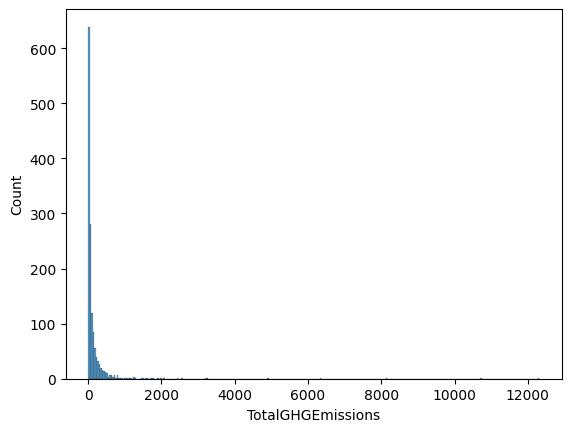

In [47]:
sns.histplot(DF_cleaned[TARGET],bins=300)
plt.show()

# APPLICATION DES MODELES

## VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE

### ETUDE DU VIF ( Variance Inflation Factor )

In [48]:


data =DF_cleaned_lineaire[col_num]
X = sm.add_constant(data)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n Analyse VIF (multicolinéarité)")
vif_data = calculate_vif(X.drop('const', axis=1))
print(vif_data)


 Analyse VIF (multicolinéarité)
                                             Variable           VIF
13                                         %_immeuble  5.408548e+07
12                                          %_parking  1.582927e+06
10                                        %_gas(kBtu)  5.369269e+04
9                                        %_elec(kBtu)  5.351432e+04
11                                      %_steam(kBtu)  6.634977e+03
6                                    PropertyGFATotal  3.087438e+00
5                                      NumberofFloors  2.637700e+00
15          PrimaryPropertyType_Immobilier Commercial  2.606873e+00
7                                   TotalGHGEmissions  2.344067e+00
16         PrimaryPropertyType_Logistique et Stockage  2.213534e+00
1                                 CouncilDistrictCode  2.150190e+00
14  PrimaryPropertyType_Education et Services Comm...  1.745933e+00
2                                            Latitude  1.625579e+00
4              

LES VIF N'INDIQUENT AUCUNE MULTICOLINEARITE IMPORTANTES

### SCATTER PLOTS

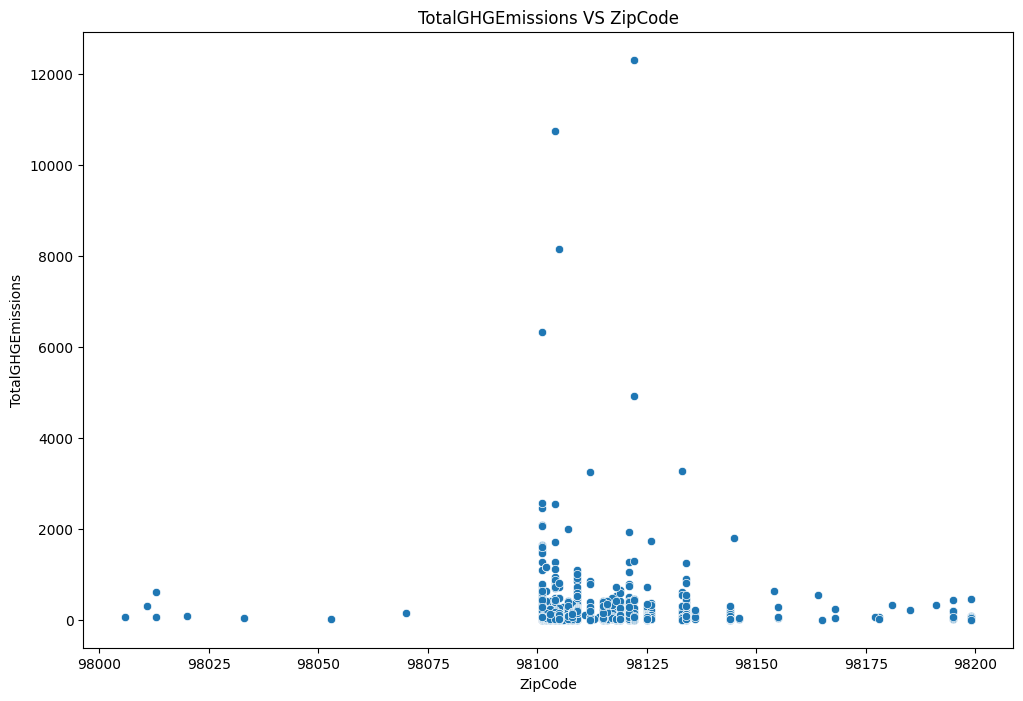

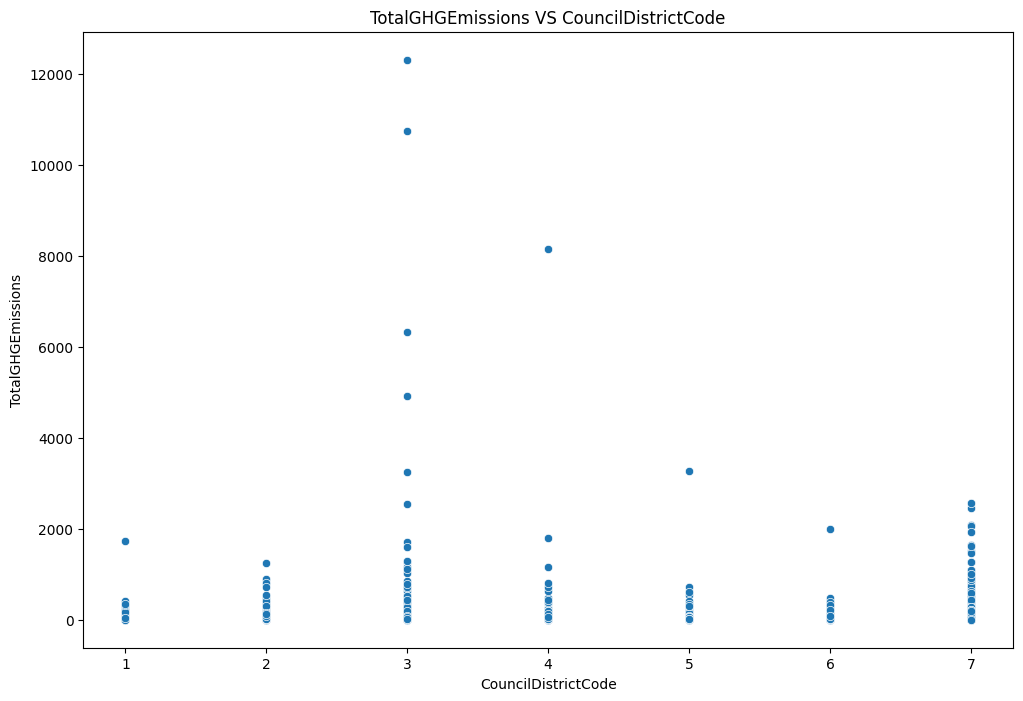

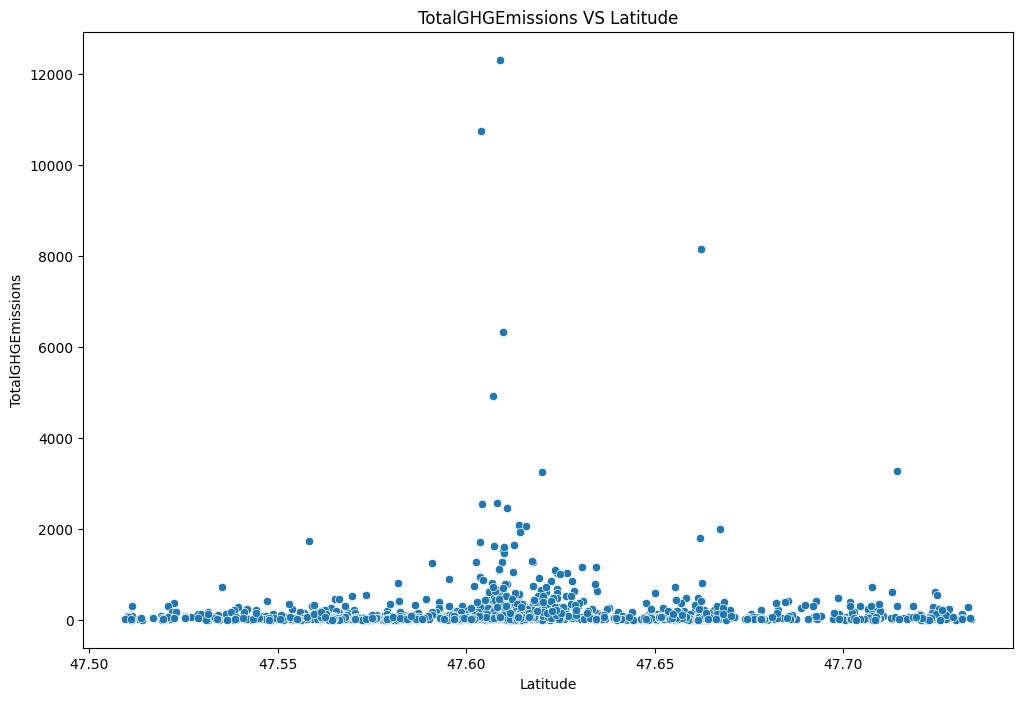

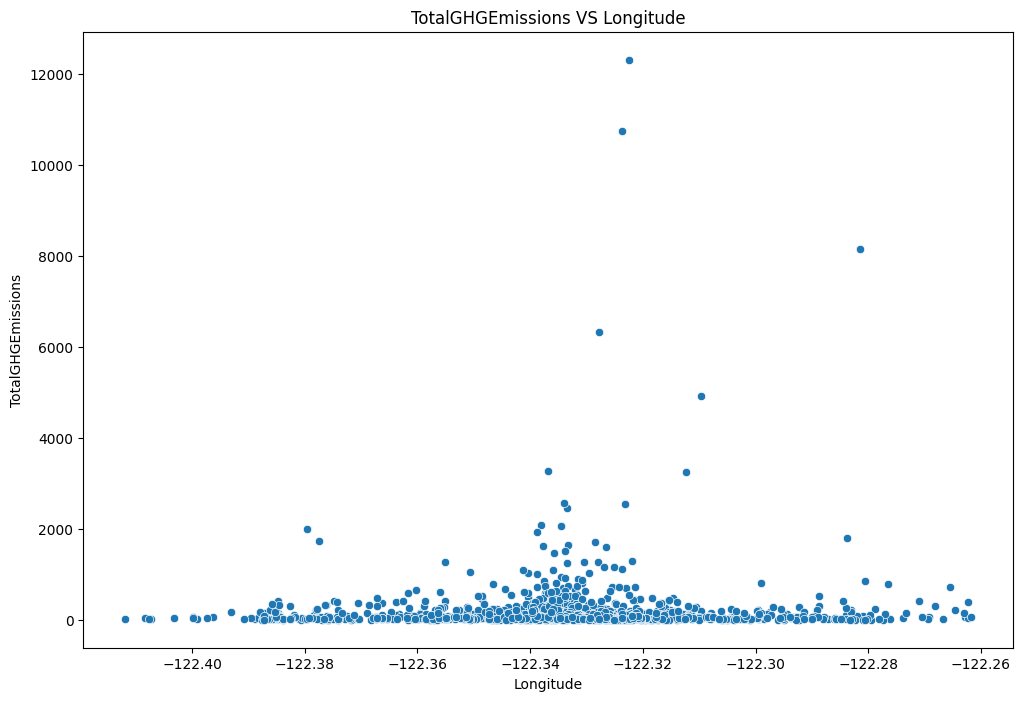

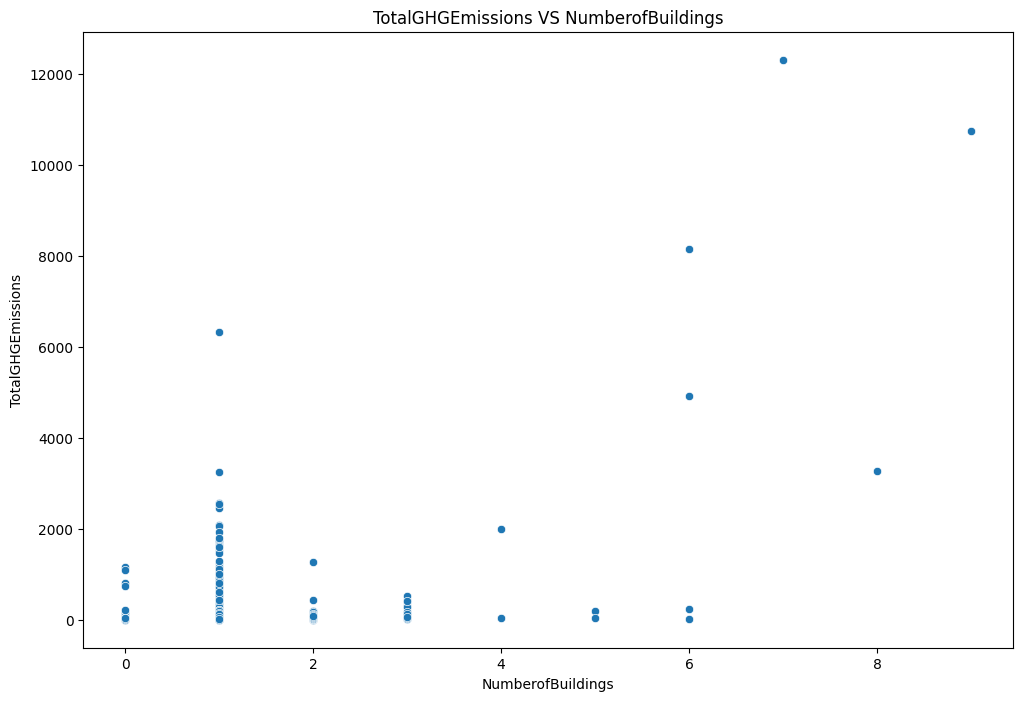

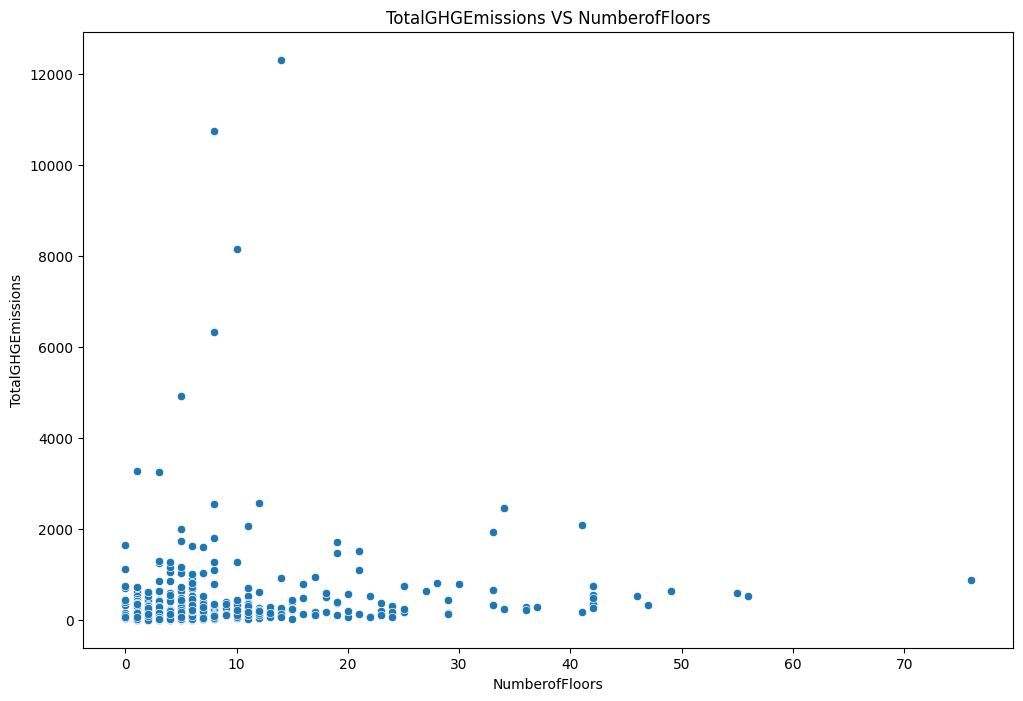

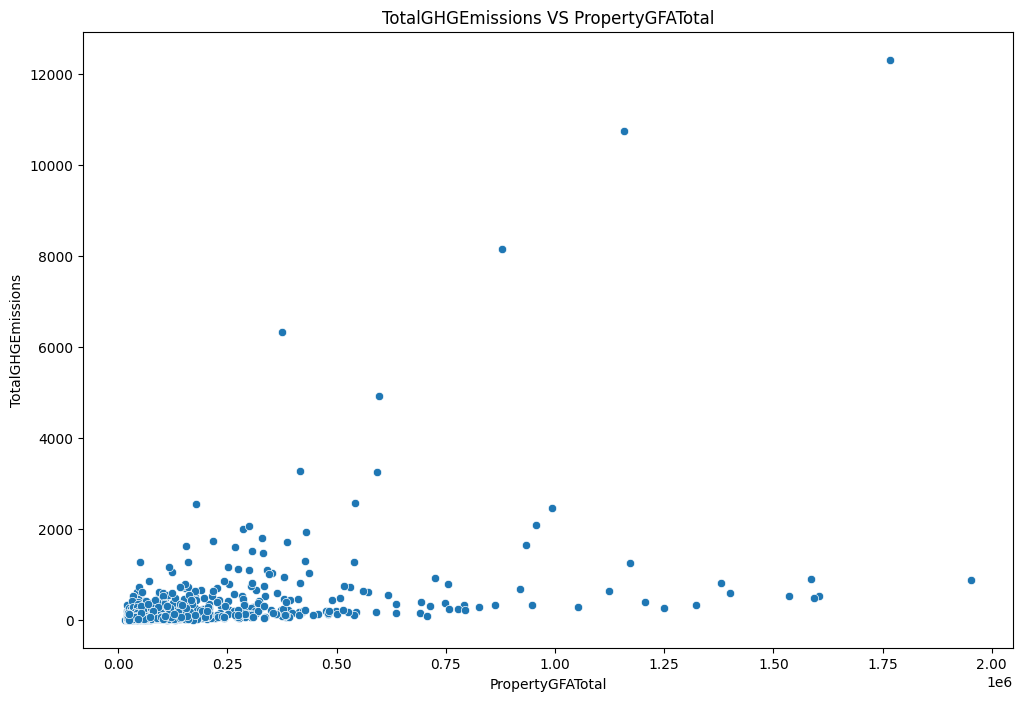

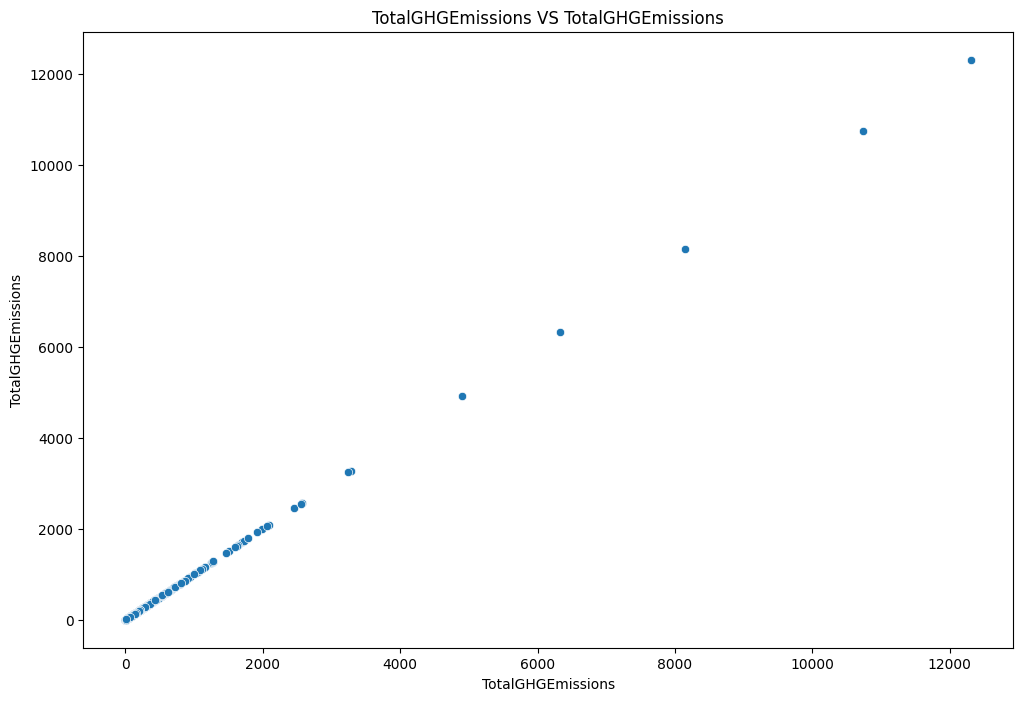

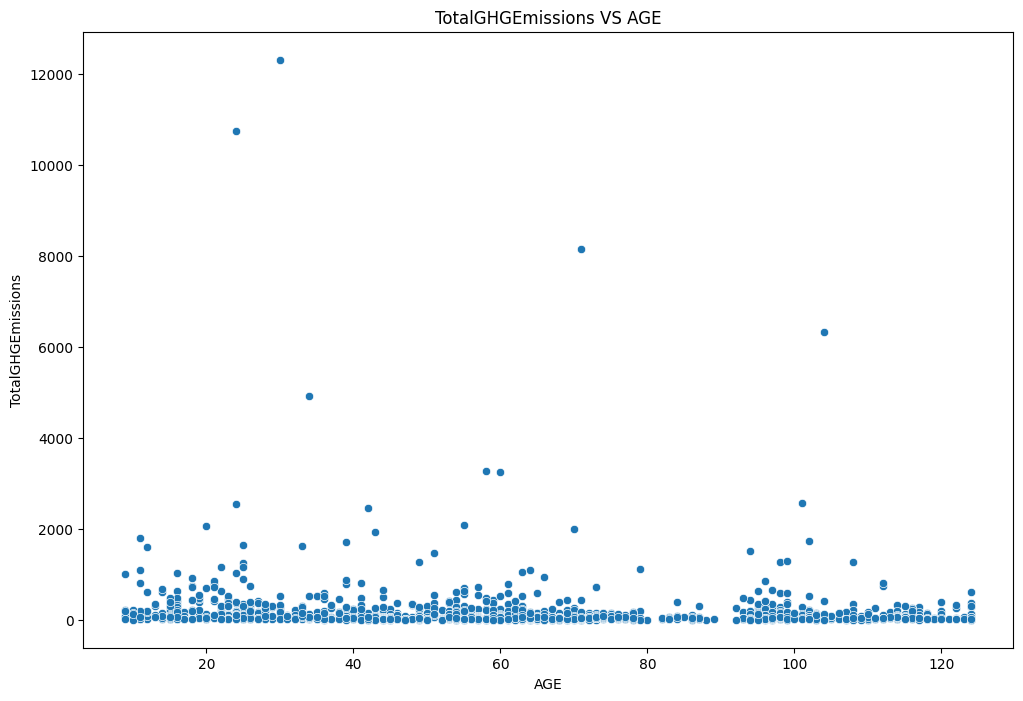

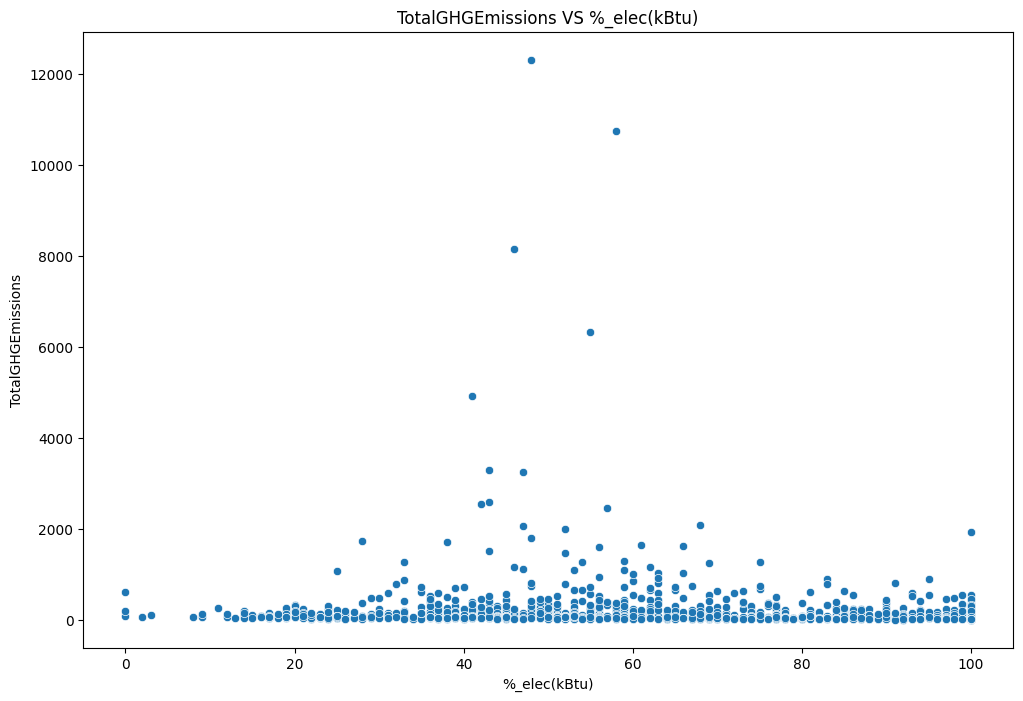

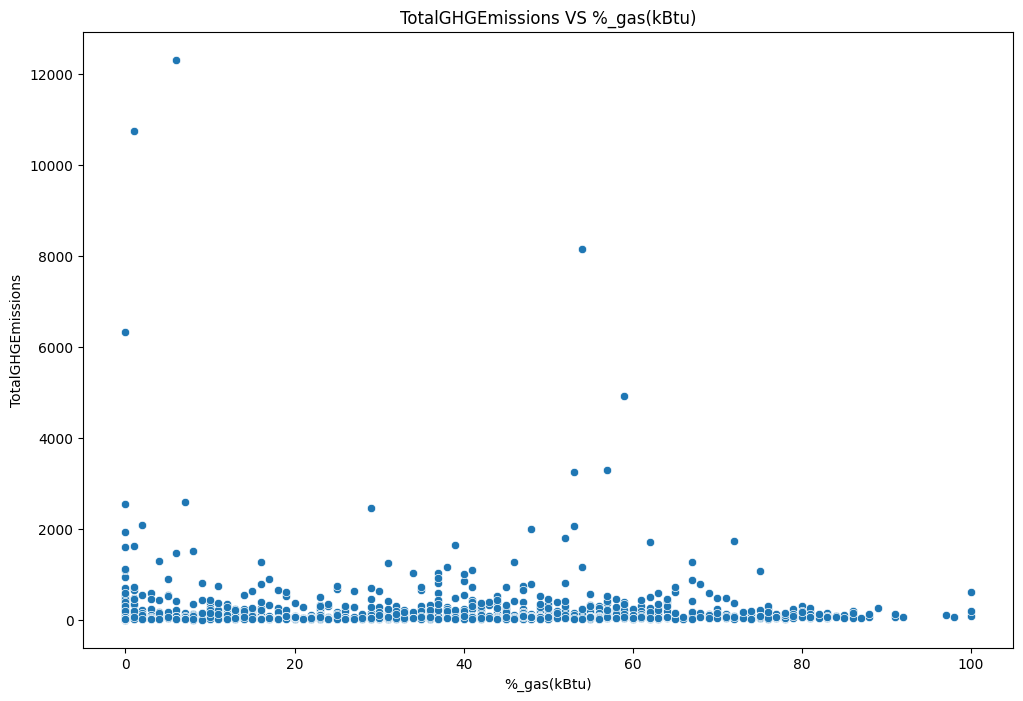

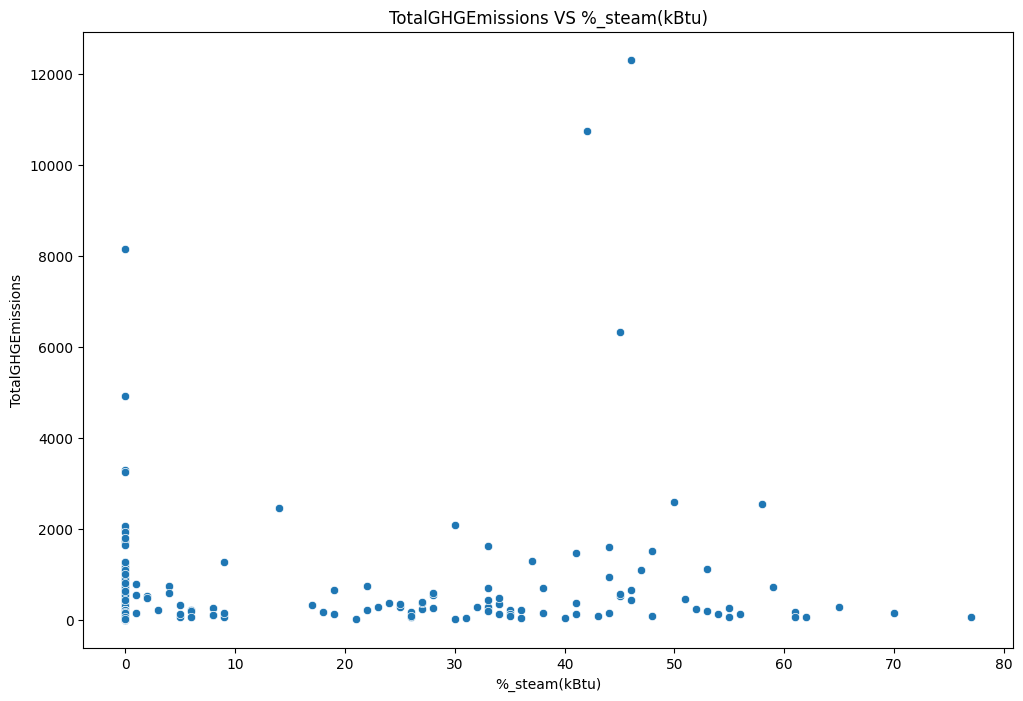

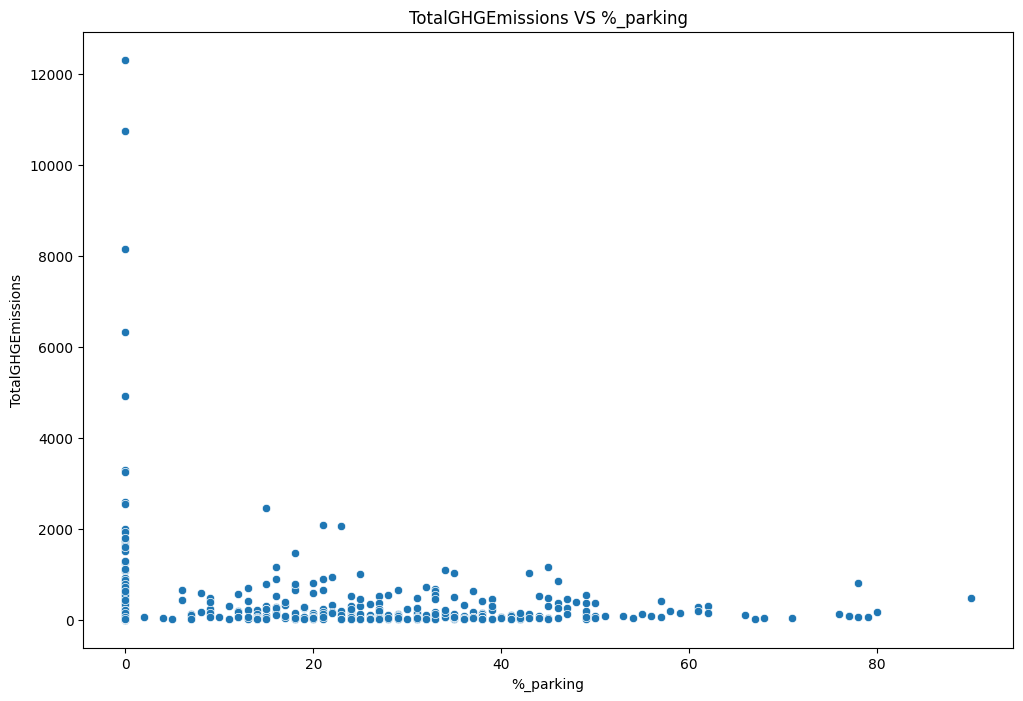

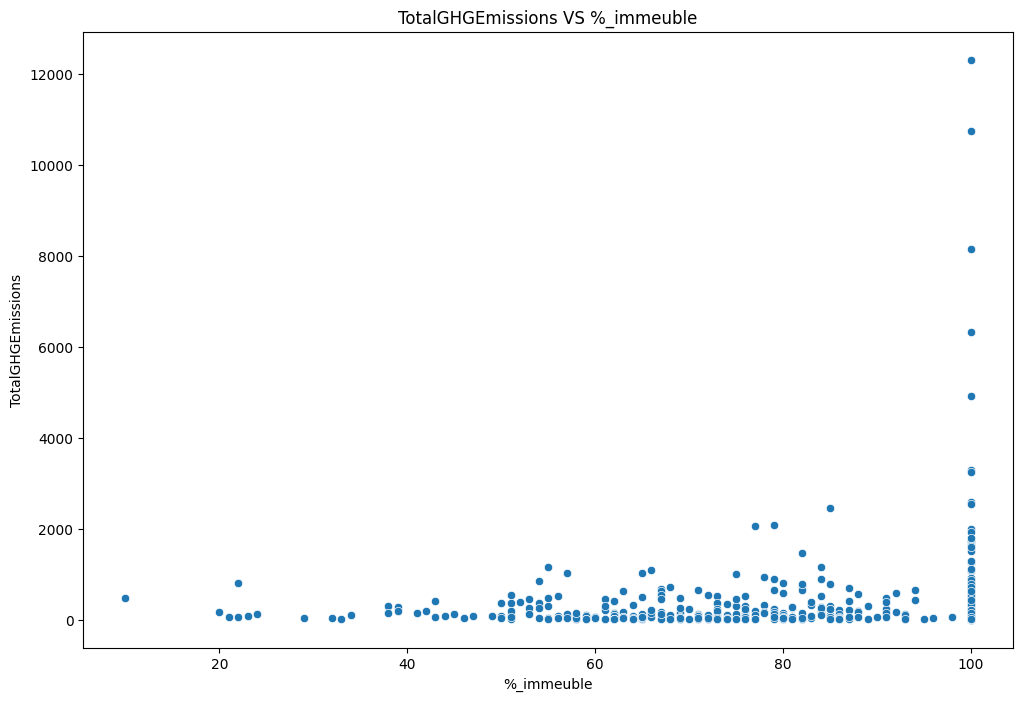

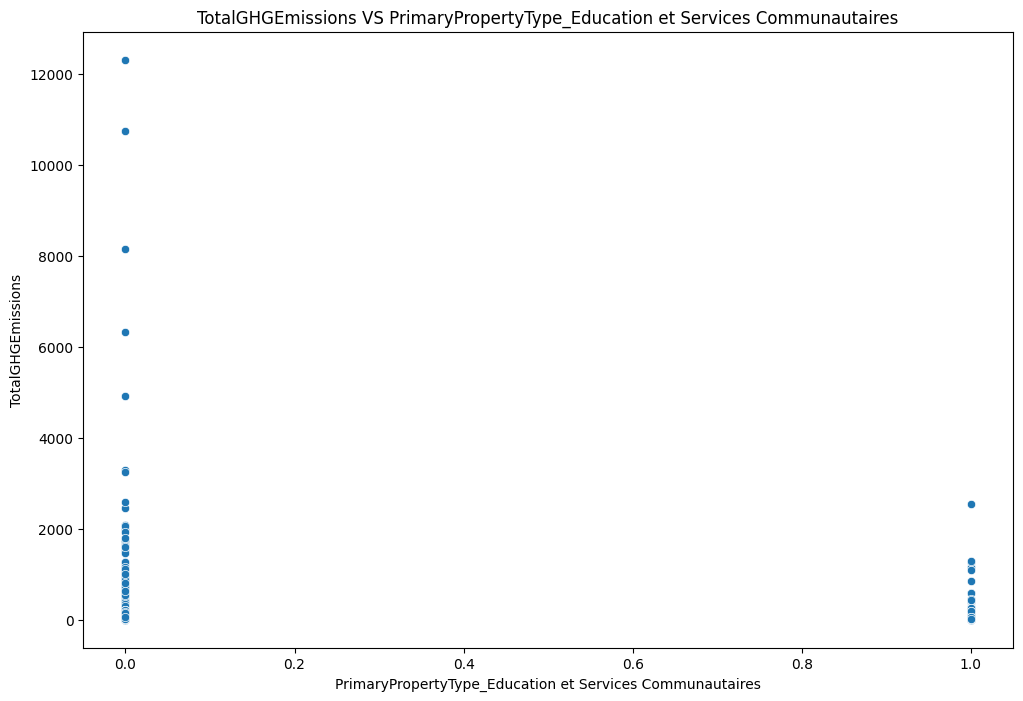

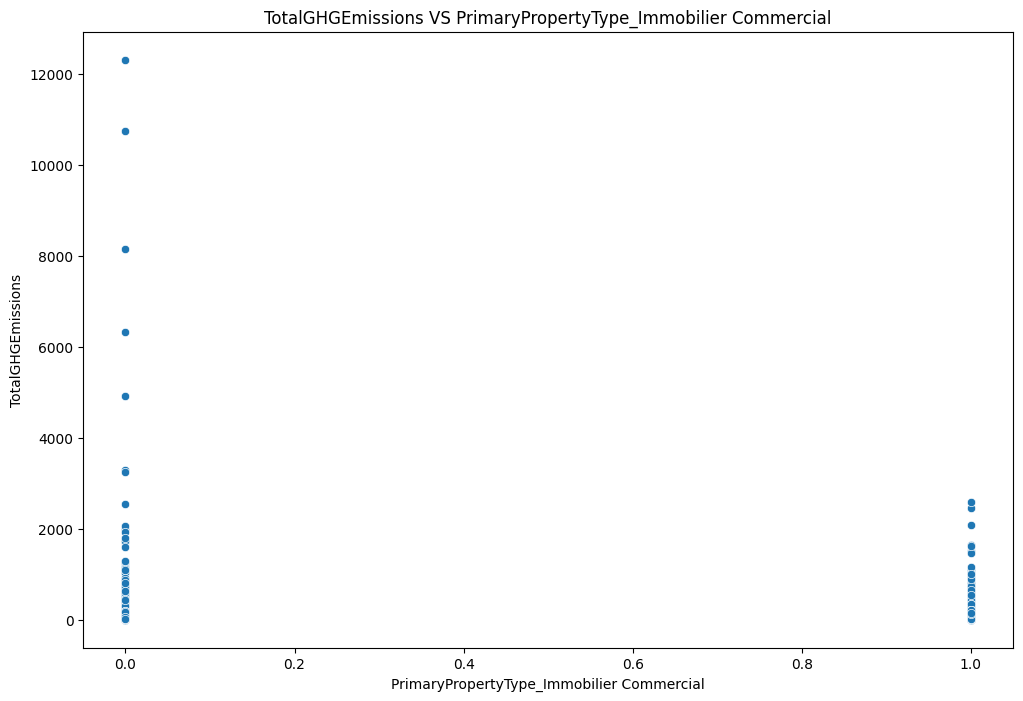

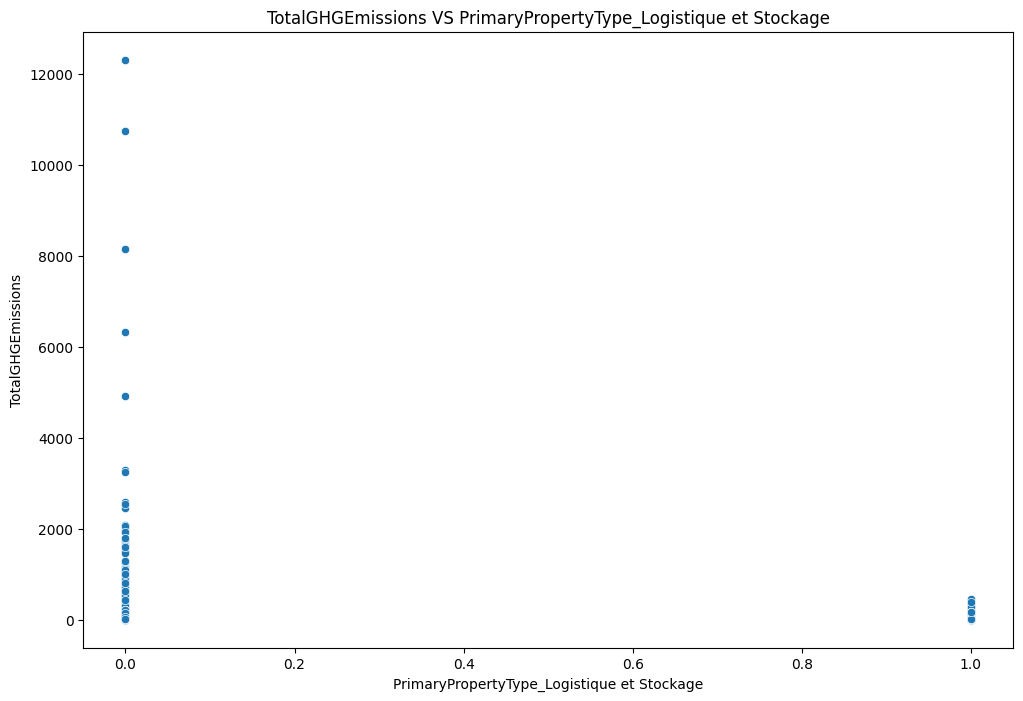

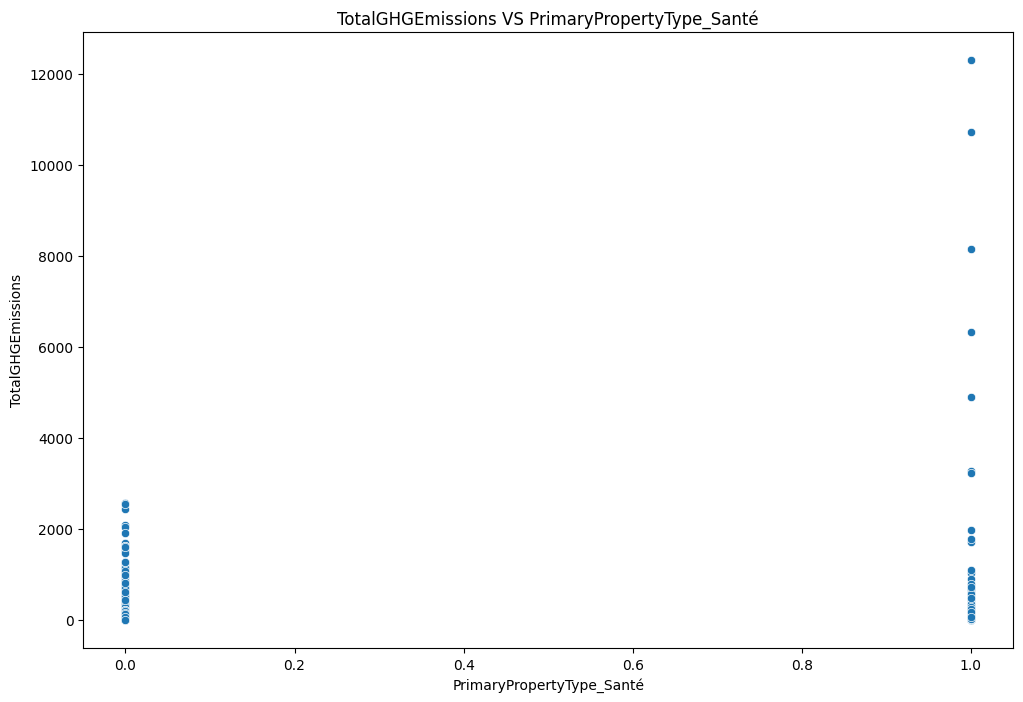

In [49]:
for col in col_num:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=DF_cleaned_lineaire[col],y=DF_cleaned_lineaire[TARGET])
    plt.title(f'{TARGET} VS {col}')
    plt.show()

ON CONSTATE UNE CERTAINE PSEUDO LINEARITE ENTRE LA TARGET ET LES VARIABLES NUMBER OF FLOORS ET PROPERTYGFATOTAL

### ANALYSE STATS MODELS

In [50]:
X=DF_cleaned_lineaire[col_num].drop([TARGET],axis=1)
y=DF_cleaned_lineaire[TARGET]


X=sm.add_constant(X)

In [51]:
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     118.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          3.57e-247
Time:                        10:56:52   Log-Likelihood:                -10533.
No. Observations:                1428   AIC:                         2.110e+04
Df Residuals:                    1411   BIC:                         2.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

### SELECTION VARIABLES

1. Analyse des corrélations

Corrélations avec SiteEnergyUse:
TotalGHGEmissions                                           1.000000
NumberofBuildings                                           0.569579
PropertyGFATotal                                            0.471924
PrimaryPropertyType_Santé                                   0.315120
%_steam(kBtu)                                               0.286214
NumberofFloors                                              0.207278
Longitude                                                   0.045229
%_gas(kBtu)                                                 0.036300
CouncilDistrictCode                                         0.033873
Latitude                                                    0.020868
%_parking                                                   0.018939
%_immeuble                                                 -0.018939
PrimaryPropertyType_Education et Services Communautaires   -0.021844
PrimaryPropertyType_Immobilier Commercial

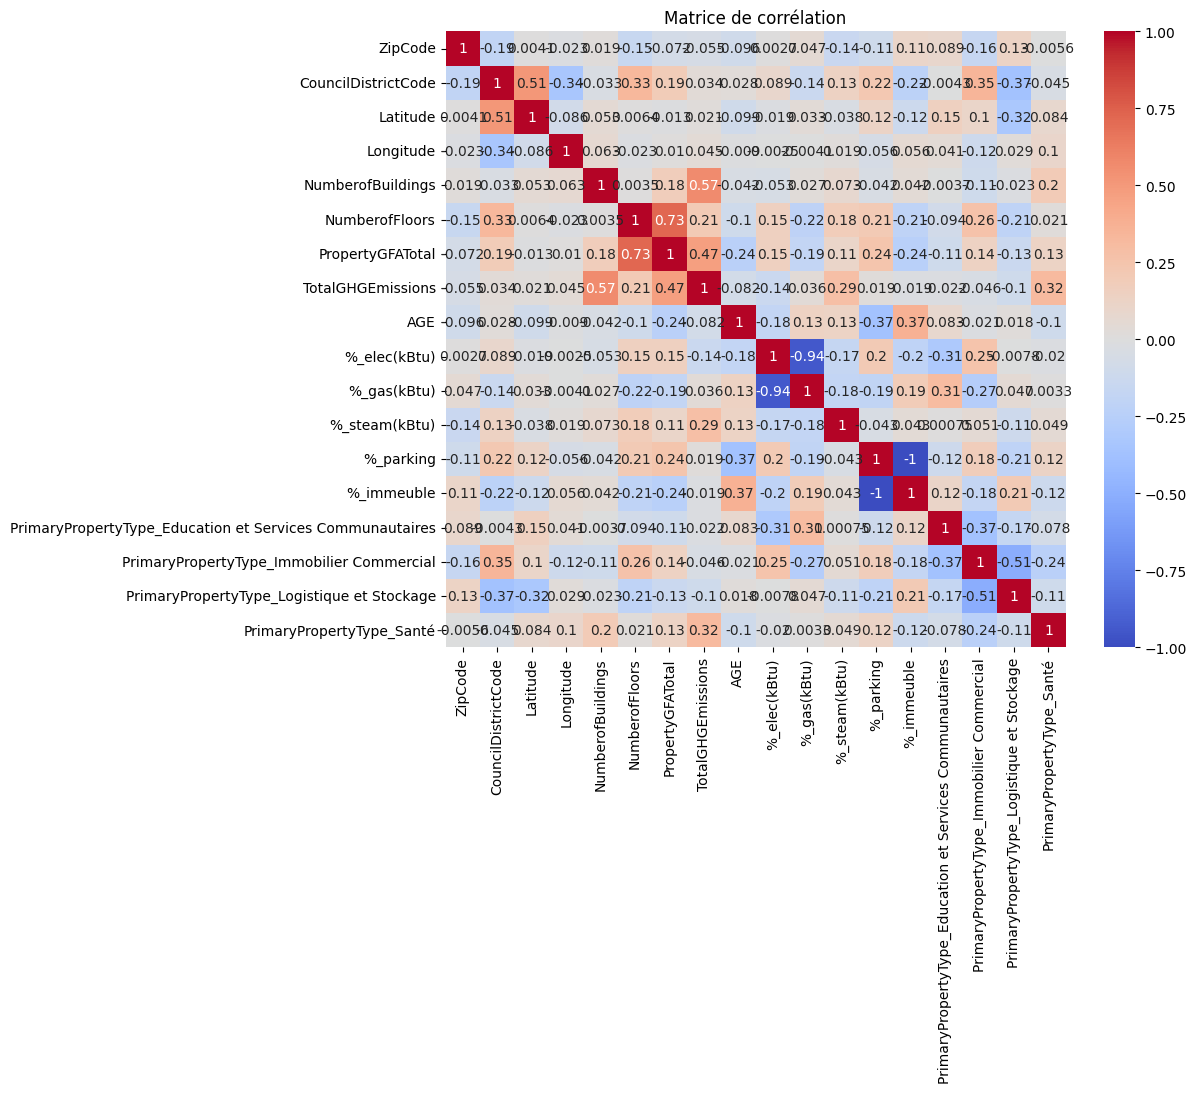

In [52]:

data=DF_cleaned_lineaire[col_num]


# 1. Analyse des corrélations
print("1. Analyse des corrélations")
correlations = data[col_num].corr()[TARGET].sort_values(ascending=False)
print("\nCorrélations avec SiteEnergyUse:")
print(correlations)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data[col_num].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()


In [53]:

# 2. Test de significativité individuelle
print("\n2. Tests de significativité individuelle")
X = sm.add_constant(data.drop([TARGET],axis=1))
model = sm.OLS(data[TARGET], X).fit()
print("\nRésumé des p-values:")
p_values = pd.DataFrame({
    'Variable': X.columns,
    'P-value': model.pvalues,
    'Significatif': model.pvalues < 0.05
}).sort_values('P-value')
print(p_values)



2. Tests de significativité individuelle

Résumé des p-values:
                                                                                             Variable  \
NumberofBuildings                                                                   NumberofBuildings   
PropertyGFATotal                                                                     PropertyGFATotal   
PrimaryPropertyType_Santé                                                   PrimaryPropertyType_Santé   
NumberofFloors                                                                         NumberofFloors   
ZipCode                                                                                       ZipCode   
PrimaryPropertyType_Immobilier Commercial                   PrimaryPropertyType_Immobilier Commercial   
%_steam(kBtu)                                                                           %_steam(kBtu)   
%_gas(kBtu)                                                                               %_gas(

L'ETUDE DE SIGNIFICATIVITE NOUS MONTRE QUE QUATRES FEATURES SEMBLENT SIGNIFICATIVES : 

- NumberofBuildings

- PropertyGFATotal

- PrimaryPropertyType_Santé

- NumberofFloors

In [54]:

# 4. Analyse des R² ajustés avec différentes combinaisons
def evaluate_feature_importance(data):
    results = []
    base_features = []
    remaining_features = list(data.drop(TARGET, axis=1).columns)
    
    while remaining_features:
        best_score = -np.inf
        best_feature = None
        
        for feature in remaining_features:
            current_features = base_features + [feature]
            X = sm.add_constant(data[current_features])
            model = sm.OLS(data[TARGET], X).fit()
            score = model.rsquared_adj
            
            results.append({
                'features': ', '.join(current_features),
                'feature_added': feature,
                'r2_adj': score
            })
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            base_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return pd.DataFrame(results)

print("\n4. Analyse progressive des caractéristiques")
feature_importance = evaluate_feature_importance(data=data)
print(feature_importance.sort_values('r2_adj', ascending=False).head())



4. Analyse progressive des caractéristiques
                                              features feature_added    r2_adj
122  NumberofBuildings, PropertyGFATotal, %_steam(k...    %_immeuble  0.569931
108  NumberofBuildings, PropertyGFATotal, %_steam(k...       ZipCode  0.569931
129  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
121  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
128  NumberofBuildings, PropertyGFATotal, %_steam(k...           AGE  0.569815


In [55]:

# 5. Sélection finale des variables
def select_significant_variables(data, threshold_p_value=0.05, threshold_vif=125):
    # Première étape : sélection basée sur p-value
    X = sm.add_constant(data.drop([TARGET],axis=1))
    model = sm.OLS(data[TARGET], X).fit()
    significant_vars = X.columns[model.pvalues < threshold_p_value].tolist()
    
    
    
    # Deuxième étape : vérification VIF
    selected_vars = []
    X_significant = data[significant_vars]
    vif_data = calculate_vif(X_significant)
    
    for var in significant_vars:
        if vif_data[vif_data['Variable'] == var]['VIF'].values[0] < threshold_vif:
            selected_vars.append(var)
    #selected_vars.remove('const')
    return selected_vars

print("\n5. Sélection finale des variables")
selected_vars = select_significant_variables(data)
print("\nVariables sélectionnées:")
print(selected_vars)



5. Sélection finale des variables

Variables sélectionnées:
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PrimaryPropertyType_Santé']


In [56]:

# Modèle final avec les variables sélectionnées
X_final = sm.add_constant(data[selected_vars])
final_model = sm.OLS(data[TARGET], X_final).fit()
print("\nRésumé du modèle final:")
print(final_model.summary())


Résumé du modèle final:
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     361.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          5.59e-215
Time:                        10:56:53   Log-Likelihood:                -10640.
No. Observations:                1428   AIC:                         2.129e+04
Df Residuals:                    1423   BIC:                         2.132e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [57]:
col_num_sel_lin=selected_vars
print(f'Voilà les variables sélectionnées :\n')
for col in col_num_sel_lin:
    print(col)

Voilà les variables sélectionnées :

NumberofBuildings
NumberofFloors
PropertyGFATotal
PrimaryPropertyType_Santé


VOILA LES VARIABLES SELECTIONNEES

#### VERIFICATION DES CORRELATIONS

In [58]:
print('Voilà les features qui semblent corrélées entre elles :')

check_correlations(DF_cleaned_lineaire[col_num_sel_lin])

Voilà les features qui semblent corrélées entre elles :


[]

AUCUNE VARIABLES SELECTIONNEES NE SEMBLENT CORRELEES ENTRE ELLES

CREATION DU DUMMY REGRESSOR AVEC STRATEGIE MEAN, C'EST A DIRE QUE LE DUMMY VA SE CONTENTER DE PREDIRE LA VALEUR MOYENNE DE LA TARGET

## DUMMY

In [59]:

X=DF_cleaned_lineaire[col_num_sel_lin]
y=DF_cleaned_lineaire[TARGET]

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Créer un Dummy Regressor qui prédit la moyenne
dummy_reg = DummyRegressor(strategy="mean")

# Entraîner le modèle
dummy_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_dummy = dummy_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred_dummy)

print(f"Mean Squared Error: {mse}")

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred_dummy)
print(f"R² Score: {r2}")


Mean Squared Error: 585610.3754699918
Root Mean Squared Error: 765.2518379396366
R² Score: -8.661423041234073e-06


## REGRESSION LINEAIRE

### REGRESSION LINEAIRE AVEC SEULEMENT LES VARIABLES IMPORTANTES

In [60]:

X_test,y_test,y_pred_linear,_,_,_,_,_,_,_=reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'RAS','None')

 R² Score test: -0.17
 MSE test: 6.88e+04
 MAE test: 1.39e+02
 MAPE test: 312.95 %
 R² Score train: 0.53
 MSE train: 2.00e+05
 MAE train: 1.78e+02
 MAPE train: 370.89 %
Linear Regression R² Score general: 0.50
Linear Regression MSE general: 1.74e+05
Linear Regression MAE general: 1.70e+02
Linear Regression MAPE general: 359.29 %


LES RESULTATS SONT TRES MAUVAIS CE QUI SEMBLE NORMAL POUR UN DUMMY

### REPRESENTATION

Représentation des prédictions linéaires et des prédictions dummy


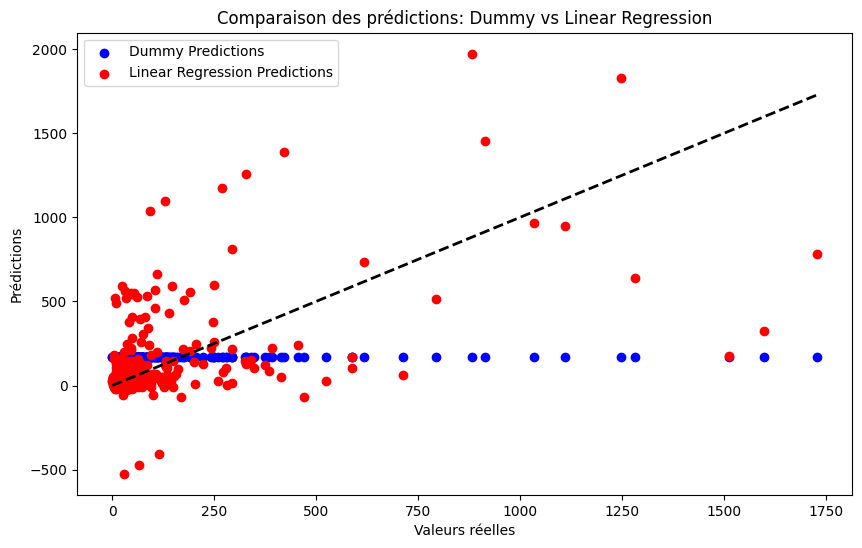

In [61]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

### ON CONTINUE LA VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE


0) Plot des résidus vs valeurs prédites


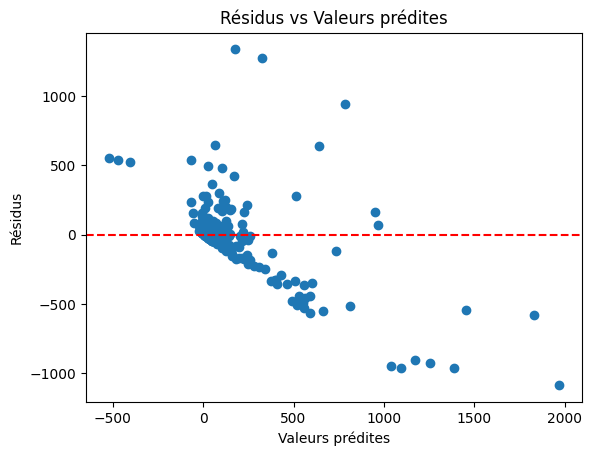


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.9320110291285284
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 107.7939
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


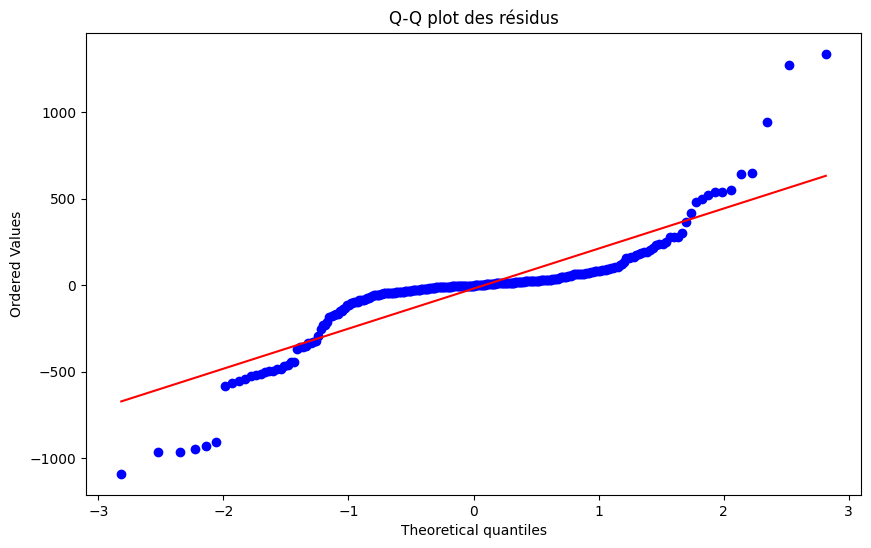

p-value du test Shapiro-Wilk : 1.9985994460880216e-19
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


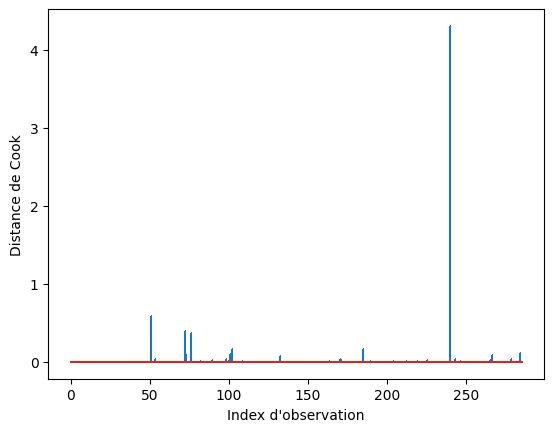

In [62]:
suite_hypothéses(X_test,y_test,y_pred_linear)

### ON VA MAINTENANT LOG LA VARIABLE CIBLE

In [63]:
X_test,y_test,y_pred_linear,_,_,_,_,_,_,_=\
    reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'log_target','None')

 R² Score test: -237.79
 MSE test: 1.40e+07
 MAE test: 3.09e+02
 MAPE test: 212.53 %
 R² Score train: -10.53
 MSE train: 4.87e+06
 MAE train: 2.34e+02
 MAPE train: 209.75 %
Linear Regression R² Score general: -18.14
Linear Regression MSE general: 6.70e+06
Linear Regression MAE general: 2.49e+02
Linear Regression MAPE general: 210.31 %


Représentation des prédictions linéaires et des prédictions dummy


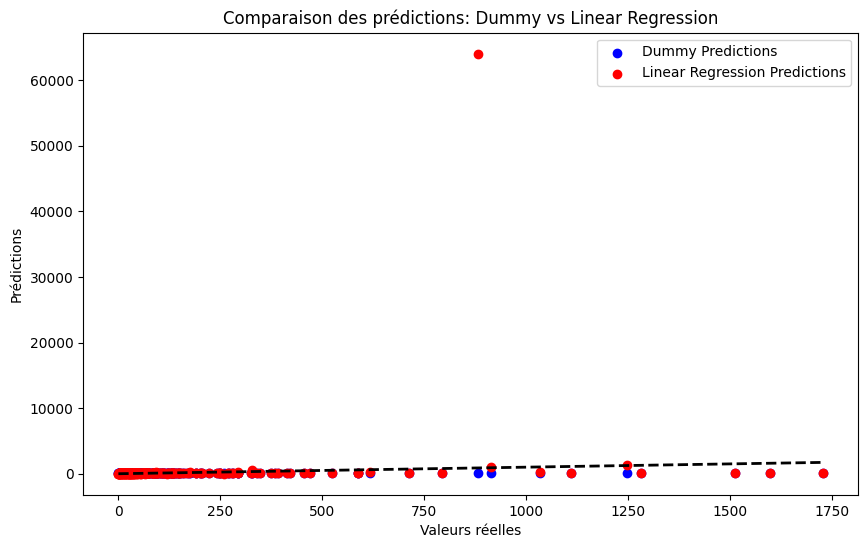

In [64]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

LES RESULTATS SONT TRES MAUVAIS AVEC CETTE APPROCHE

### ON VA MAINTENANT LOG LA VARIABLE PropertyGFATotal EN PLUS DE LA CIBLE


In [65]:
X_test,y_test,y_pred_linear,_,_,mse_log_target_feature,r2_log_target_feature,mape_log_target_feature,\
    mae_log_target_feature,_=reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,
                                     'log_target_feature','PropertyGFATotal')

 R² Score test: 0.30
 MSE test: 4.09e+04
 MAE test: 8.79e+01
 MAPE test: 158.90 %
 R² Score train: 0.67
 MSE train: 1.41e+05
 MAE train: 1.21e+02
 MAPE train: 168.38 %
Linear Regression R² Score general: 0.65
Linear Regression MSE general: 1.21e+05
Linear Regression MAE general: 1.15e+02
Linear Regression MAPE general: 166.48 %


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\3108669005.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_a_log]=np.log(X[col_a_log])


ON OBTIENT DES RESULTATS MEILLEURS QU'AU DEPART MEME SI CES DERNIERS NE SONT PAS EXCEPTIONNELS LOIN DE LA 


Représentation des prédictions linéaires et des prédictions dummy


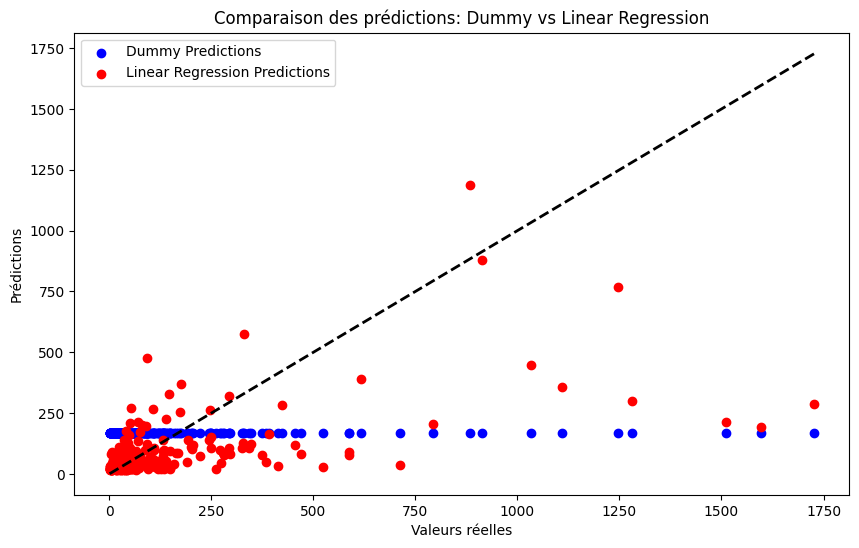

In [66]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

0) Plot des résidus vs valeurs prédites


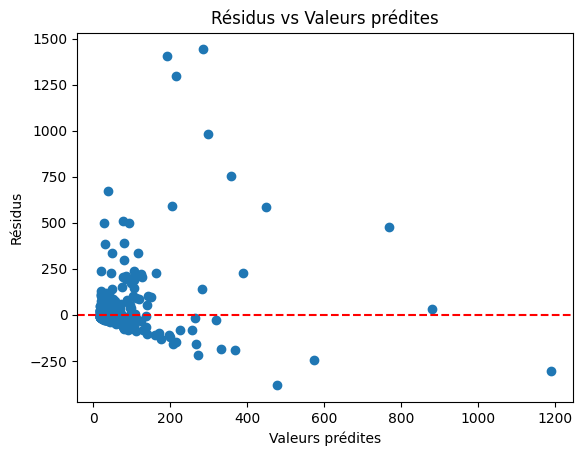


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.8171967991213092
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 29.7805
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


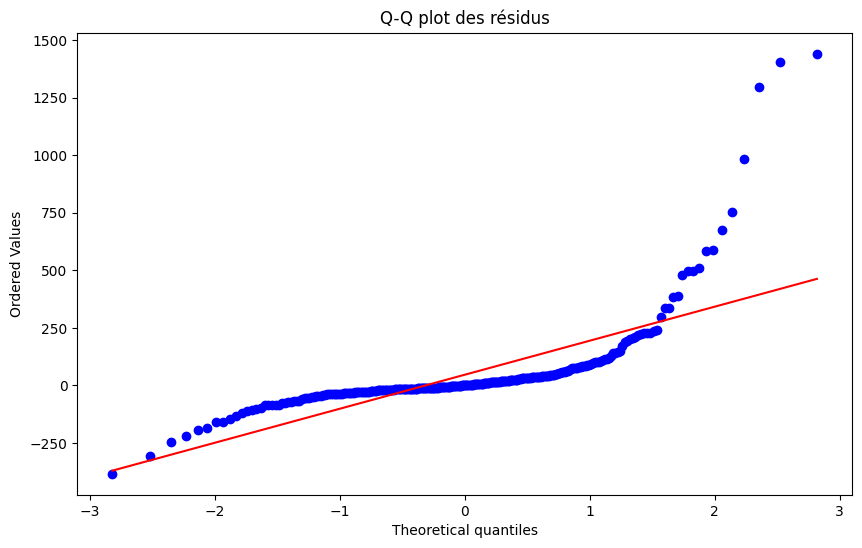

p-value du test Shapiro-Wilk : 3.685377705259462e-26
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


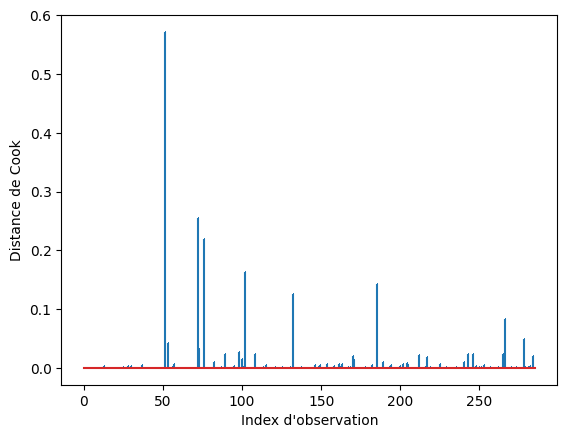

In [67]:
suite_hypothéses(X_test,y_test,y_pred_linear)

### DU A LA NON-VALIDATION DE CERTAINES HYPOTHESES, HETEROSCEDASTICITE OU ENCORE ABSCENCE DE RELATIONS LINEAIRE ENTRE LES FEATURES ET LA CIBLE PAR EXEMPLE, ON SE DOIT D'ABANDONNER CE MODELE POUR LA SUITE CAR LES RESULTATS OBTENUS NE POURRAIENT PAS ETRE CONSIDERES COMME FIABLES

## REGRESSION REGULARISEE

In [68]:
del(col_num[col_num.index(TARGET)])
print(col_num)

['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'AGE', '%_elec(kBtu)', '%_gas(kBtu)', '%_steam(kBtu)', '%_parking', '%_immeuble', 'PrimaryPropertyType_Education et Services Communautaires', 'PrimaryPropertyType_Immobilier Commercial', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Santé']


### REGRESSION AVEC TOUTES LES FEATURES

In [69]:
ridge,lasso,elastic,resultats,_,_,_,_=\
    reg_regul(DF_cleaned_lineaire,col_num,TARGET,type='RAS',log_feature=['None'])

ETUDE DES COEFFICIENTS DES FEATURES


Comparaison des coefficients:
                                                         Ridge         Lasso  \
PropertyGFATotal                                    259.037766  2.561617e+02   
NumberofBuildings                                   221.262446  2.208640e+02   
%_steam(kBtu)                                       131.569956  1.120675e+02   
PrimaryPropertyType_Santé                           107.928640  1.062280e+02   
NumberofFloors                                      -92.686755 -8.946858e+01   
%_elec(kBtu)                                        -23.845086 -7.636057e+01   
PrimaryPropertyType_Immobilier Commercial            36.564682  3.324689e+01   
%_gas(kBtu)                                          53.437772  0.000000e+00   
%_parking                                           -14.843916 -2.797568e+01   
PrimaryPropertyType_Logistique et Stockage           -6.097716 -6.292031e+00   
AGE                                                  -9.034183 -7.391267e+00   
ZipCode  

<Figure size 1200x600 with 0 Axes>

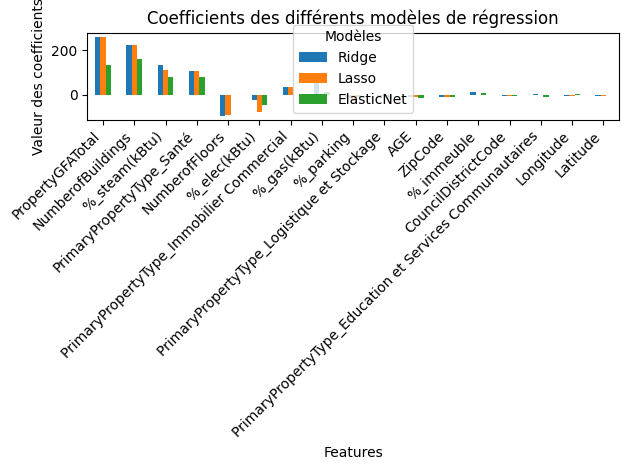


Variables sélectionnées par Lasso (coefficients non nuls):
                                       Feature   Coefficient
6                             PropertyGFATotal  2.561617e+02
4                            NumberofBuildings  2.208640e+02
10                               %_steam(kBtu)  1.120675e+02
16                   PrimaryPropertyType_Santé  1.062280e+02
5                               NumberofFloors -8.946858e+01
8                                 %_elec(kBtu) -7.636057e+01
14   PrimaryPropertyType_Immobilier Commercial  3.324689e+01
11                                   %_parking -2.797568e+01
0                                      ZipCode -9.583863e+00
7                                          AGE -7.391267e+00
15  PrimaryPropertyType_Logistique et Stockage -6.292031e+00
1                          CouncilDistrictCode -5.835443e+00
2                                     Latitude -4.093455e+00
3                                    Longitude -2.913325e+00
12                       

In [70]:
X=DF_cleaned_lineaire[col_num]

# Création d'un DataFrame pour comparer les coefficients des différents modèles
def compare_coefficients(models, model_names, feature_names):
    coefficients = pd.DataFrame()
    for model, name in zip(models, model_names):
        coefficients[name] = model.coef_
    coefficients.index = feature_names
    
    # Trier par valeur absolue des coefficients (moyenne des 3 modèles)
    coefficients['Moyenne_Abs'] = coefficients.abs().mean(axis=1)
    coefficients = coefficients.sort_values('Moyenne_Abs', ascending=False)
    
    print("\nComparaison des coefficients:")
    print(coefficients)
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    coefficients[model_names].plot(kind='bar')
    plt.title('Coefficients des différents modèles de régression')
    plt.xlabel('Features')
    plt.ylabel('Valeur des coefficients')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Modèles')
    plt.tight_layout()
    plt.show()
    
    return coefficients

# Utilisation de la fonction
models = [ridge, lasso, elastic]
model_names = ['Ridge', 'Lasso', 'ElasticNet']
coef_comparison = compare_coefficients(models, model_names, X.columns)

# Analyse spécifique pour Lasso (sélection de variables)
print("\nVariables sélectionnées par Lasso (coefficients non nuls):")
lasso_selected = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
lasso_selected = lasso_selected[lasso_selected['Coefficient'] != 0]
lasso_selected = lasso_selected.sort_values('Coefficient', key=abs, ascending=False)
print(lasso_selected)


Features importantes (importance > 0.01):
                                                       Ridge         Lasso  \
PropertyGFATotal                                    1.000000  1.000000e+00   
NumberofBuildings                                   0.854171  8.622057e-01   
%_steam(kBtu)                                       0.507918  4.374875e-01   
PrimaryPropertyType_Santé                           0.416652  4.146914e-01   
NumberofFloors                                      0.357812  3.492661e-01   
%_elec(kBtu)                                        0.092053  2.980952e-01   
%_gas(kBtu)                                         0.206293  0.000000e+00   
PrimaryPropertyType_Immobilier Commercial           0.141156  1.297887e-01   
%_parking                                           0.057304  1.092110e-01   
PrimaryPropertyType_Logistique et Stockage          0.023540  2.456274e-02   
AGE                                                 0.034876  2.885392e-02   
ZipCode              

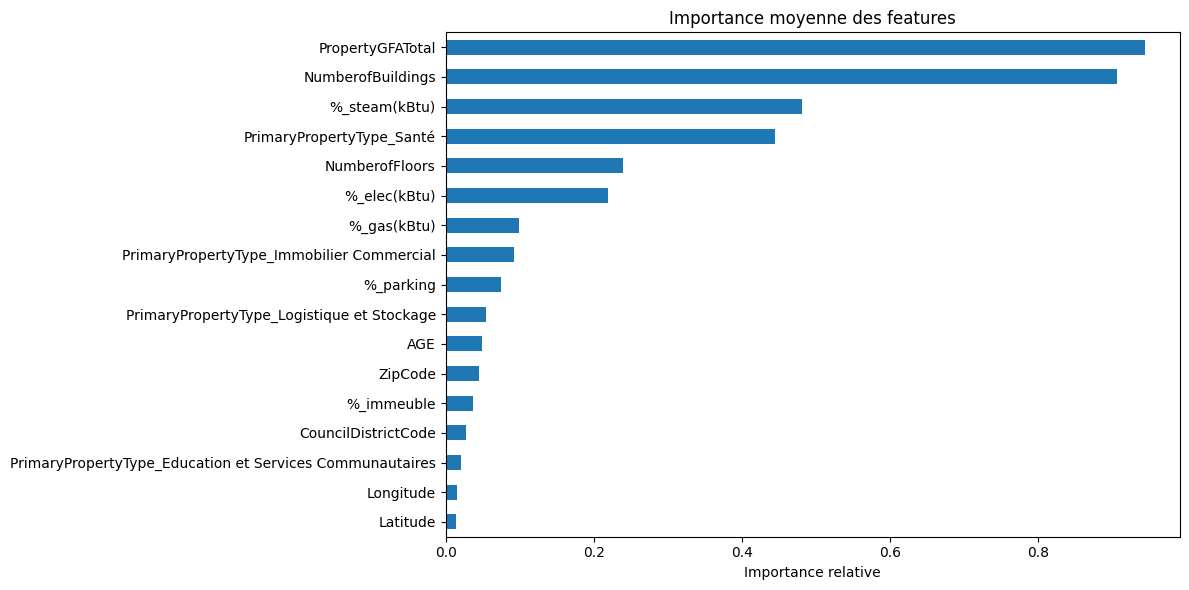

In [71]:
def analyze_feature_importance(models, model_names, feature_names, threshold=0.01):
    importance_summary = pd.DataFrame()
    
    for model, name in zip(models, model_names):
        # Normaliser les coefficients
        normalized_coef = np.abs(model.coef_) / np.abs(model.coef_).max()
        importance_summary[name] = normalized_coef
    
    importance_summary.index = feature_names
    
    # Calculer le score moyen d'importance
    importance_summary['Importance_moyenne'] = importance_summary.mean(axis=1)
    
    # Identifier les features importantes
    important_features = importance_summary[
        importance_summary['Importance_moyenne'] > threshold
    ].sort_values('Importance_moyenne', ascending=False)
    
    print("\nFeatures importantes (importance > {}):".format(threshold))
    print(important_features)
    col_num_sel=list(important_features.head(6).index) # On recupere les 6 meilleurs features
    # Visualisation
    plt.figure(figsize=(12, 6))
    importance_summary['Importance_moyenne'].sort_values().plot(kind='barh')
    plt.title('Importance moyenne des features')
    plt.xlabel('Importance relative')
    plt.tight_layout()
    plt.show()
    
    return importance_summary,list(col_num_sel)

# Utilisation de la fonction
importance_analysis,col_num_sel_regu = analyze_feature_importance(models, model_names, X.columns)

### REGRESSION REGULARISEE AVEC LES 6 MEILLEURES COLONNES

In [72]:
print(col_num_sel_regu)

['PropertyGFATotal', 'NumberofBuildings', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', '%_elec(kBtu)']


VOILA LES 6 MEILLEURES FEATURES SELECTIONNEES

In [73]:
print('Voilà les features qui semblent corrélées entre elles :')

check_correlations(DF_cleaned_lineaire[col_num_sel_regu])

Voilà les features qui semblent corrélées entre elles :


[]

### REGRESSION REGULARISEE AVEC LOG TARGET ET FEATURE

In [74]:
_,_,_,resultats,y_test,y_pred_elastic,_,X_test=\
    reg_regul(DF_cleaned_lineaire,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.4)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\2185741111.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


0) Plot des résidus vs valeurs prédites


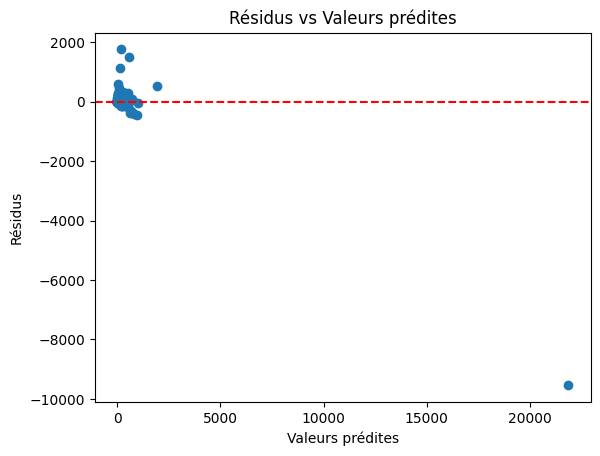


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.9709665381683956
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 213.0530
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


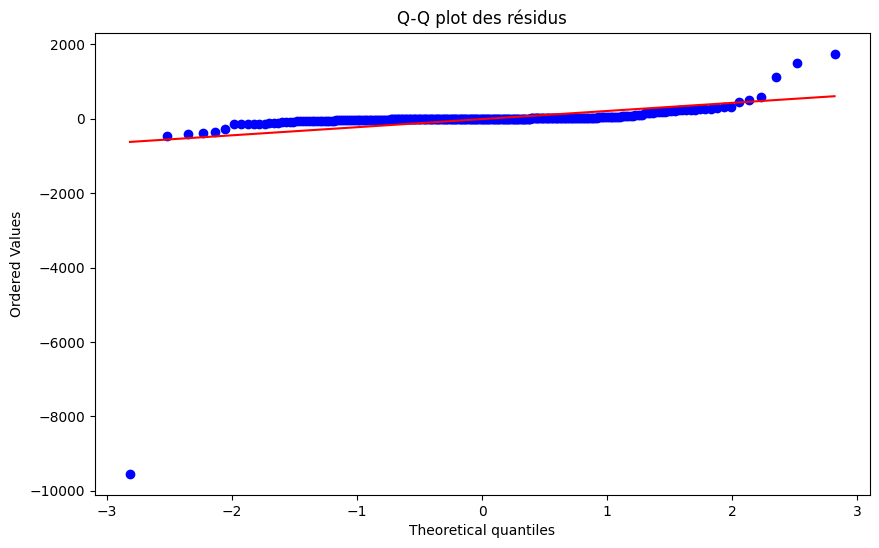

p-value du test Shapiro-Wilk : 5.758104275602883e-34
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


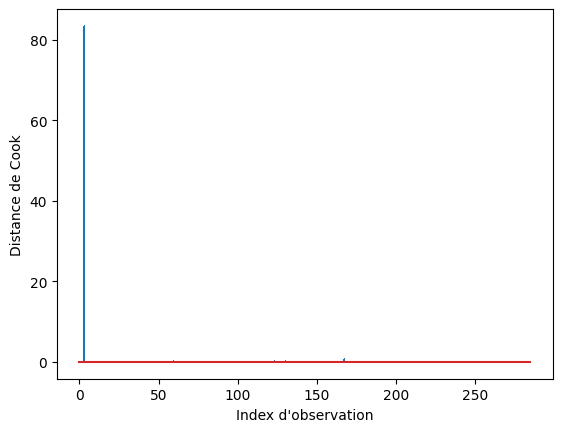

In [75]:
suite_hypothéses(X_test,y_test,y_pred_elastic)

### RESUME DES RESULTATS

In [76]:
resultats

train      test   general
mae_ElasticNet_log_target_feature   7.89e+01  1.01e+02  8.33e+01
mae_Lasso_log_target_feature        7.86e+01  9.38e+01  8.16e+01
mae_Ridge_log_target_feature        7.90e+01  1.07e+02  8.47e+01
mape_ElasticNet_log_target_feature     82.97     78.90     82.15
mape_Lasso_log_target_feature          83.13     79.01     82.30
mape_Ridge_log_target_feature          82.81     78.71     81.99
mse_ElasticNet_log_target_feature   5.55e+04  3.52e+05  1.15e+05
mse_Lasso_log_target_feature        5.71e+04  2.35e+05  9.26e+04
mse_Ridge_log_target_feature        5.55e+04  4.91e+05  1.43e+05
r2_ElasticNet_log_target_feature        0.81      0.40      0.67
r2_Lasso_log_target_feature             0.80      0.60      0.74
r2_Ridge_log_target_feature             0.81      0.16      0.59

### AFFICHAGE DES PREDICTIONS

Représentation des prédictions linéaires et des prédictions dummy


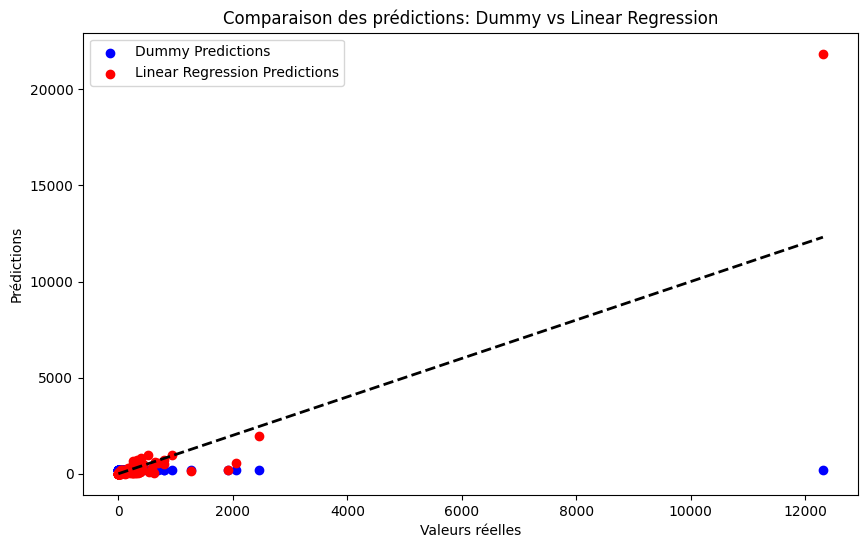

In [77]:
representation_predictions(y_test,y_pred_dummy,y_pred_elastic)

### DU A LA NON-VALIDATION DE CERTAINES HYPOTHESES, HETEROSCEDASTICITE OU ENCORE RESIDUS NON NORMAUX, ON SE DOIT D'ABANDONNER CE MODELE POUR LA SUITE CAR LES RESULTATS OBTENUS NE POURRAIENT PAS ETRE CONSIDERES COMME FIABLES

## DECISION TREE REGRESSOR

Score R² train : 0.57
Score R² test : 0.58
Score MAE train : 9.99e+01
Score MAE test : 1.04e+02
Score MAPE train : 164.60 %
Score MAPE test : 148.58 %
Score MSE train : 1.25e+05
Score MSE test : 2.45e+05


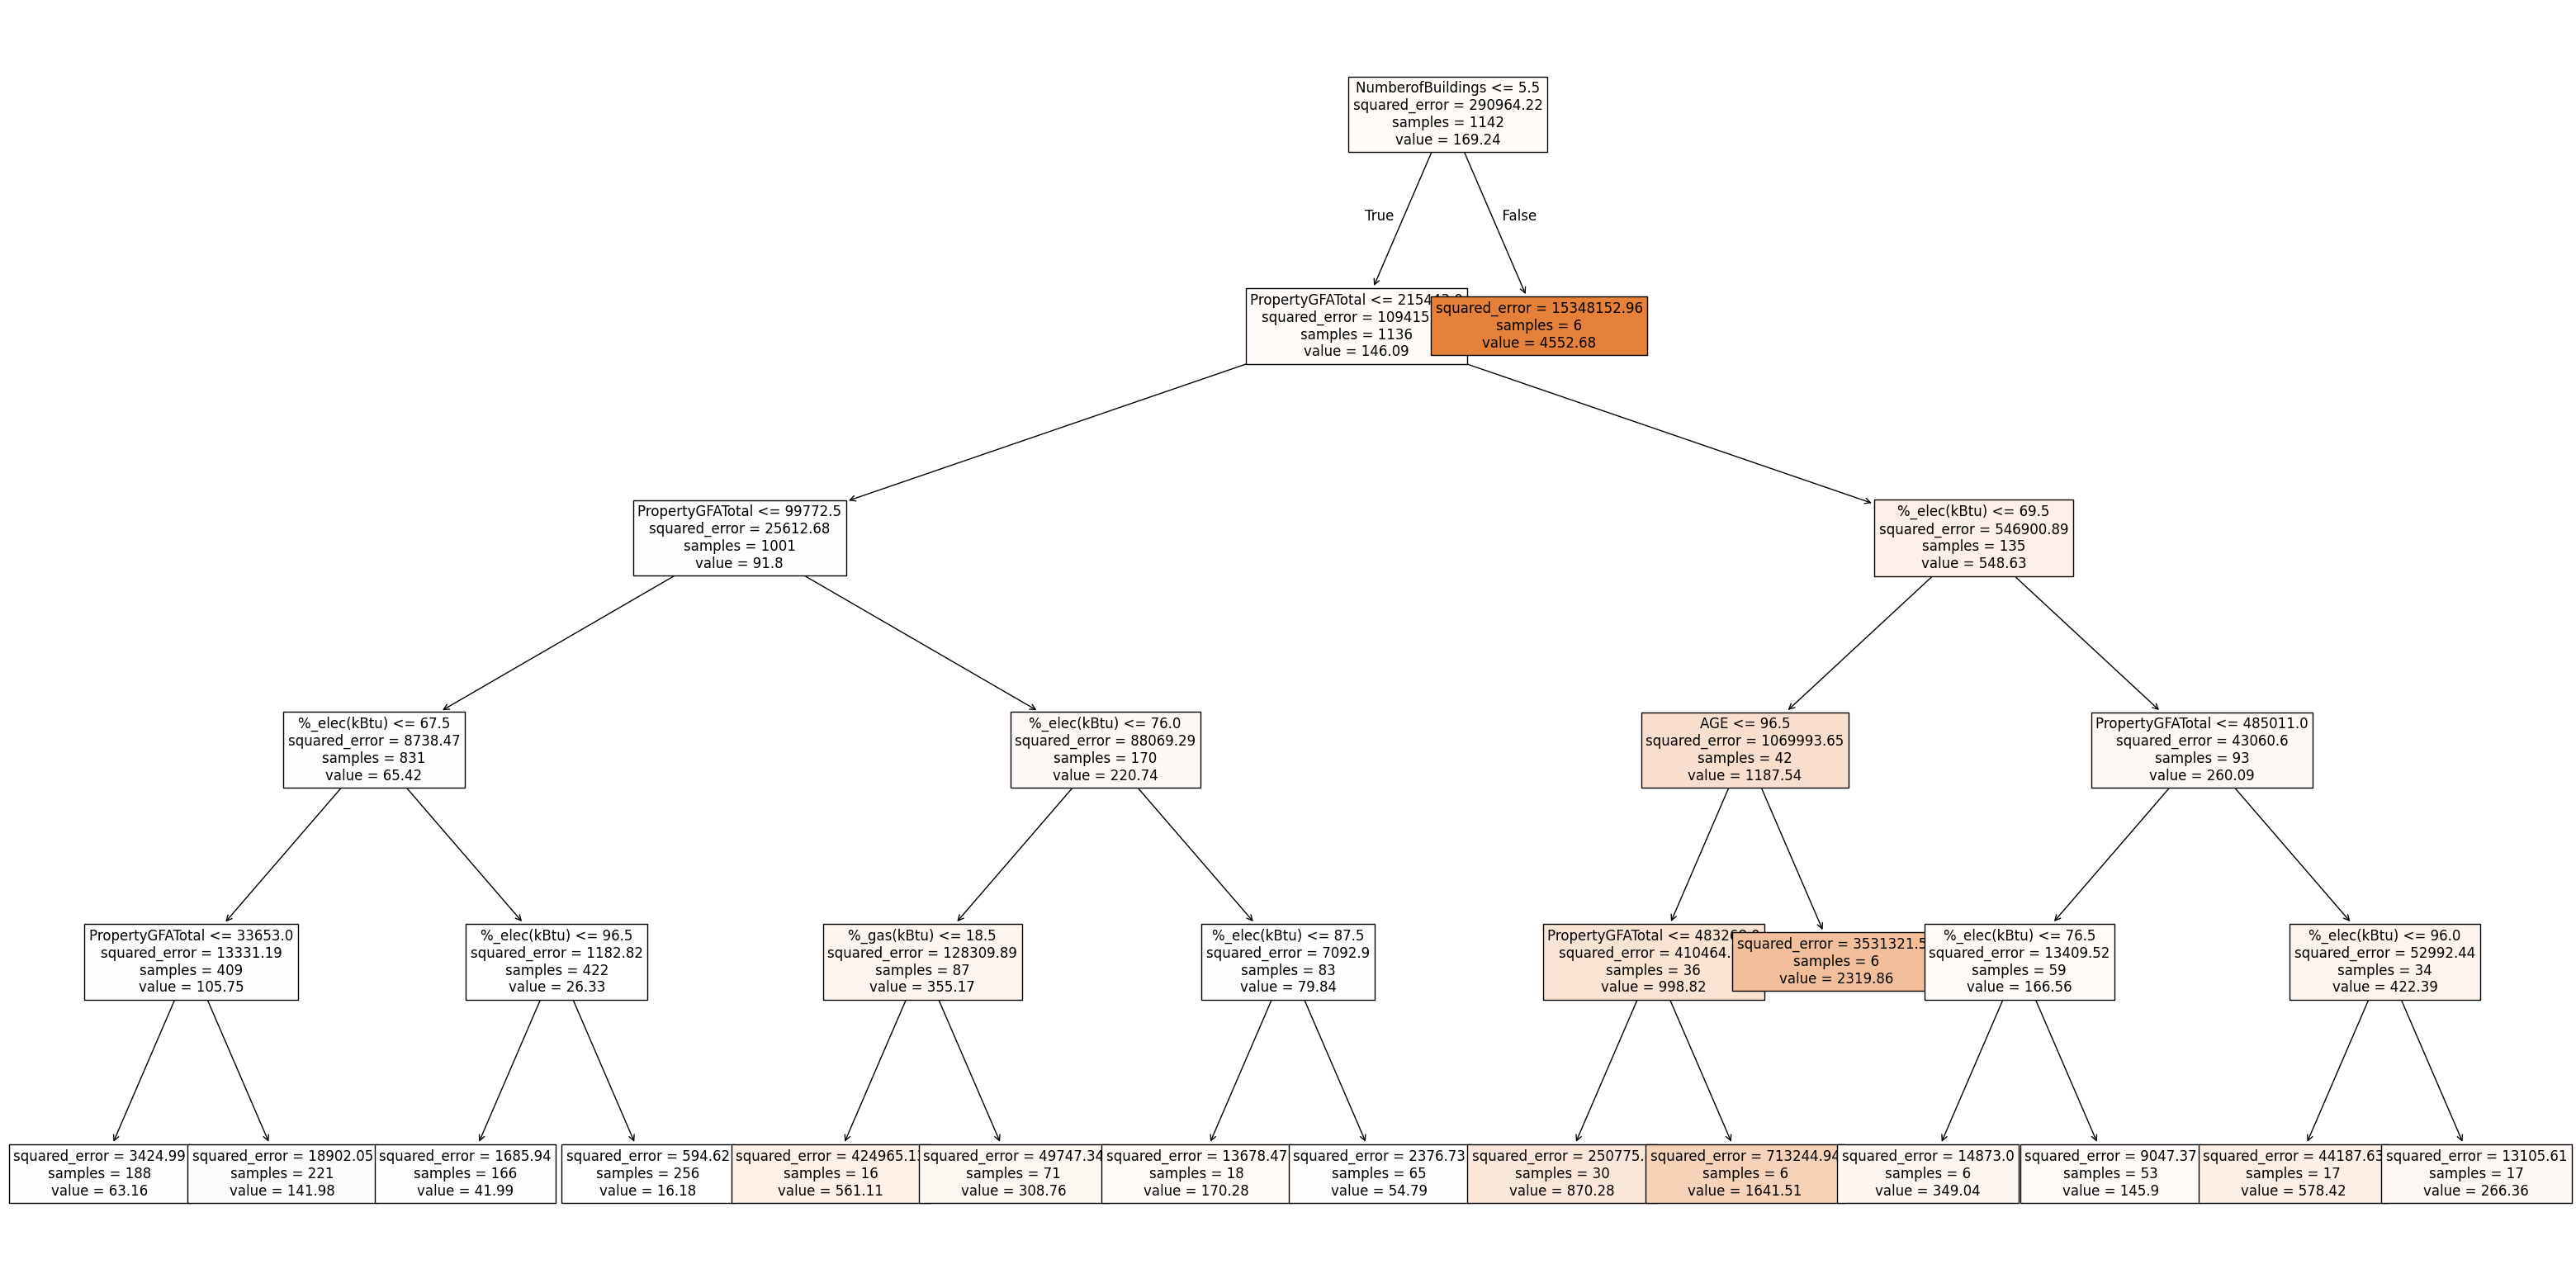

In [78]:
dt_reg,_,_,_,_=\
    decision_tree_regressor(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                            Tableau_score_mse,Tableau_score_r2)

UN R2 DE 0.58 ET UN TRES MAUVAIS MAPE DE 149 %, C'EST A DIRE QU'EN MOYENNE IL COMMET 149 % D'ECART AVEC LA VALEUR REELE

### FEATURE IMPORTANCE

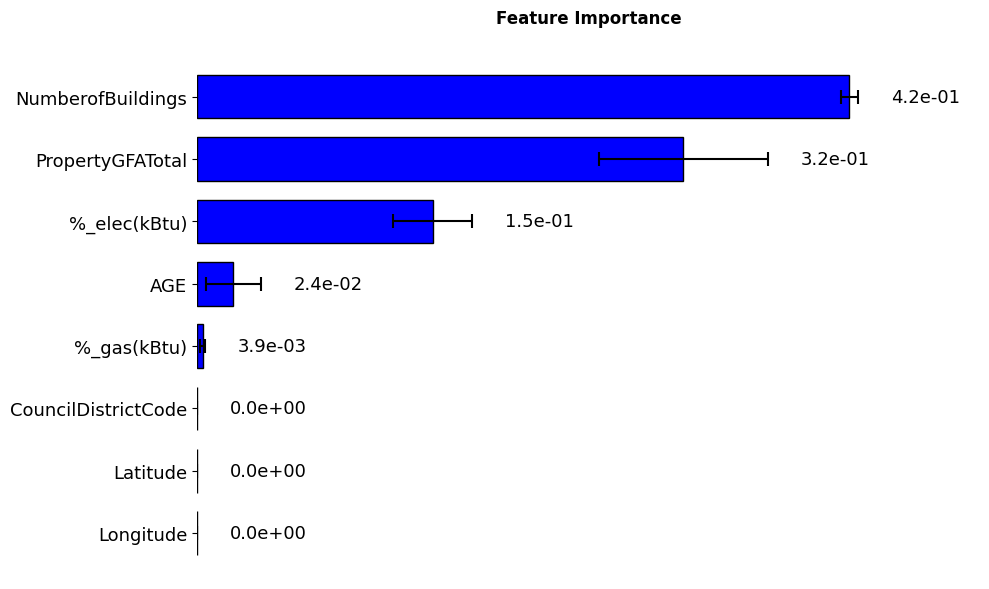


Résultats numériques détaillés :

NumberofBuildings: 0.4243 (±0.0056)
PropertyGFATotal: 0.3162 (±0.0549)
%_elec(kBtu): 0.1532 (±0.0256)
AGE: 0.0235 (±0.0178)
%_gas(kBtu): 0.0039 (±0.0016)
CouncilDistrictCode: 0.0000 (±0.0000)
Latitude: 0.0000 (±0.0000)
Longitude: 0.0000 (±0.0000)


In [79]:
col_num_sel_dt=feature_importance_permutation(DF_cleaned,col_num,TARGET,dt_reg)

ON VA CONSERVER TOUTES LES FEATURE AVEC UNE IMPORTANCE SUPERIEURE A 0 ET RETIRER L'AGE QUI N'EST PAS PERTINENT DANS NOTRE ETUDE

In [80]:
col_num_sel_dt=col_num_sel_dt[:5]
del(col_num_sel_dt[col_num_sel_dt.index('AGE')])


### VERIFICATION DES CORRELATIONS

In [81]:

print(f'Voilà les features qui semblent corrélées entre elles :\n')

check_correlations(DF_cleaned[col_num_sel_dt])

Voilà les features qui semblent corrélées entre elles :

Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615)]

ON VA RETIRER '%_gas(kBtu)' TROP CORRELEES AVEC %_elec(kBtu) ET D'IMPORTANCE MOINDRE

In [82]:
del(col_num_sel_dt[col_num_sel_dt.index('%_gas(kBtu)')])
print(f'Voilà les features conservées :\n')
for col in col_num_sel_dt:
    print(col)

Voilà les features conservées :

NumberofBuildings
PropertyGFATotal
%_elec(kBtu)


### ESSAI AVEC LES FEATURES CONSERVEES ET EN LOGANT LA CIBLE ET PROPERTYGFA

Score R² train : 0.50
Score R² test : 0.41
Score MAE train : 9.01e+01
Score MAE test : 1.07e+02
Score MAPE train : 74.74 %
Score MAPE test : 96.04 %
Score MSE train : 1.45e+05
Score MSE test : 3.44e+05


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\1109600405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


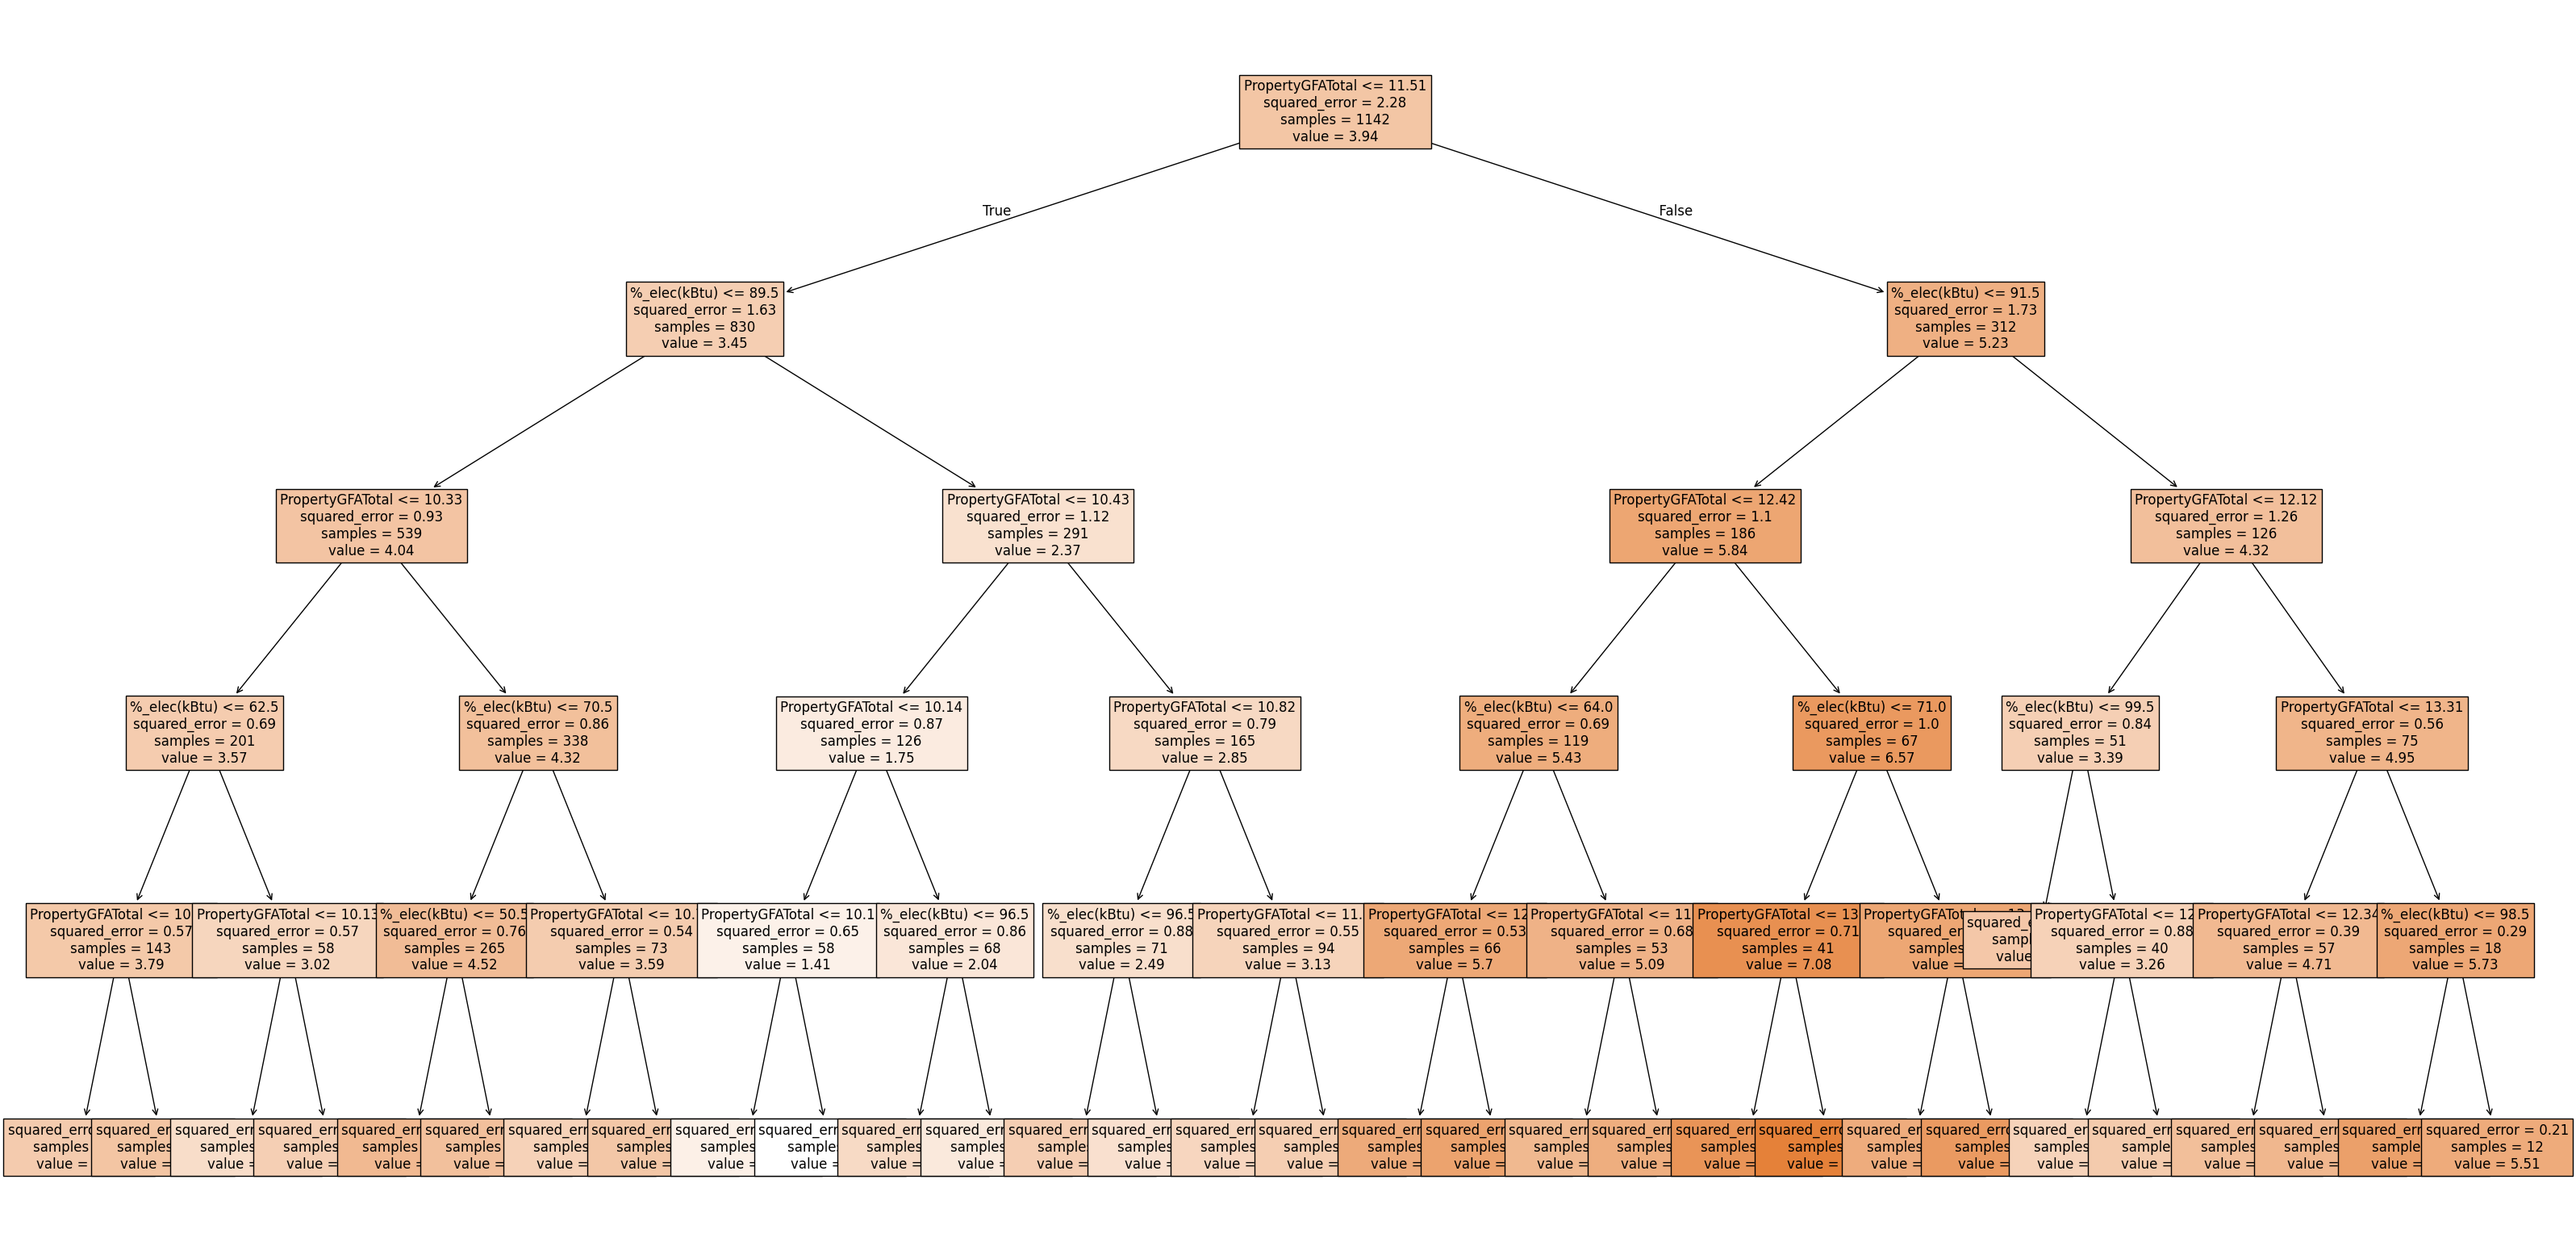

In [83]:
start = time.perf_counter()

dtr,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    decision_tree_regressor(DF_cleaned,col_num_sel_dt,TARGET,'log_target_feature',['PropertyGFATotal'],
                            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)



end = time.perf_counter()

EXEC=end-start

BAISSE DU R2 MAIS SURTOUT BIEN MEILLEUR MAPE

RECUPERATION DU NOMBRE DE FEATURE POUR LA FIN DE L'ETUDE

In [84]:
nouvelle_ligne=pd.Series([len(col_num_sel_dt)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Decision Tree']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [85]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['Decision Tree']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

1.5818317000521347


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\94203495.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])


## RANDOM FOREST

In [86]:
rf_reg,_,_,_,_=\
    random_forest(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                  Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.62
Score R² test : 0.51
Score MAE train : 7.53e+01
Score MAE test : 1.09e+02
Score MAPE train : 92.29 %
Score MAPE test : 113.90 %
Score MSE train : 1.11e+05
Score MSE test : 2.90e+05


LE RANDOM FOREST A DE PLUTOT BONS RESULTATS DE BASE

### PERMUTATION POUR FEATURE IMPORTANCE

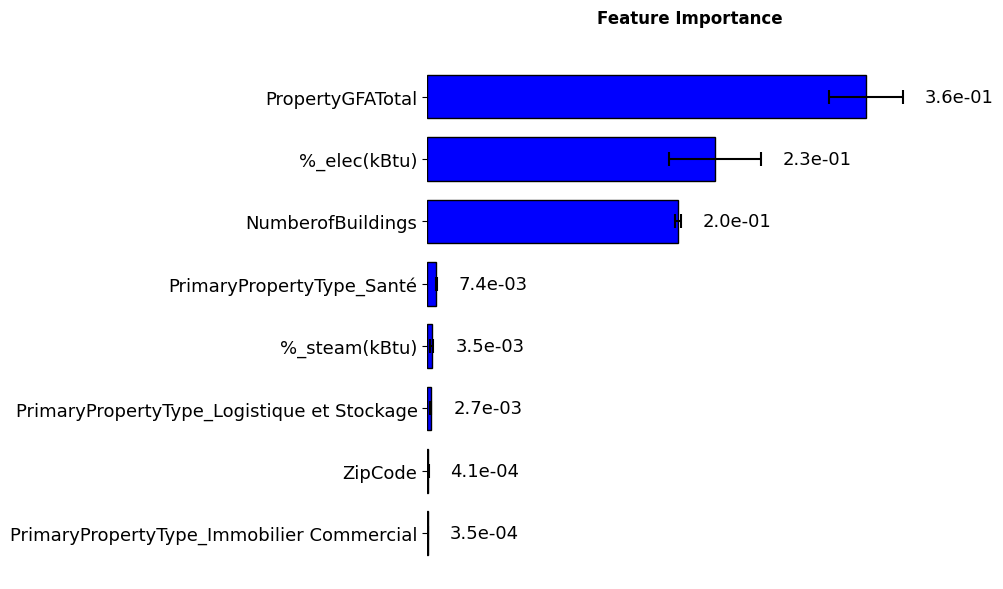


Résultats numériques détaillés :

PropertyGFATotal: 0.3562 (±0.0301)
%_elec(kBtu): 0.2338 (±0.0372)
NumberofBuildings: 0.2036 (±0.0026)
PrimaryPropertyType_Santé: 0.0074 (±0.0006)
%_steam(kBtu): 0.0035 (±0.0015)
PrimaryPropertyType_Logistique et Stockage: 0.0027 (±0.0007)
ZipCode: 0.0004 (±0.0007)
PrimaryPropertyType_Immobilier Commercial: 0.0004 (±0.0002)


In [87]:
col_num_sel_rf=feature_importance_permutation(DF_cleaned,col_num,TARGET,rf_reg)

ON VA CONSERVER LES 6 MEILLEURES FEATURES

In [88]:
col_num_sel_rf=col_num_sel_rf[:6]

### VERIFICATION DES CORRELATIONS

In [89]:
print(f'Voilà les features qui semblent corrélées entre elles :\n')

check_correlations(DF_cleaned[col_num_sel_rf])

Voilà les features qui semblent corrélées entre elles :



[]

In [90]:
print(f'Voilà les features conservées :\n')
for col in col_num_sel_rf:
    print(col)

Voilà les features conservées :

PropertyGFATotal
%_elec(kBtu)
NumberofBuildings
PrimaryPropertyType_Santé
%_steam(kBtu)
PrimaryPropertyType_Logistique et Stockage


### ESSAI AVEC LES FEATURES LES PLUS PERTINENTES + LOG

In [91]:
start = time.perf_counter()

_,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
random_forest(DF_cleaned,col_num_sel_rf,TARGET,'log_target_feature',['PropertyGFATotal'],Tableau_score_mae,
              Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)



end = time.perf_counter()

EXEC=end-start

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\1648780275.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


Score R² train : 0.59
Score R² test : 0.40
Score MAE train : 7.03e+01
Score MAE test : 1.00e+02
Score MAPE train : 49.29 %
Score MAPE test : 71.97 %
Score MSE train : 1.20e+05
Score MSE test : 3.54e+05


BAISSE DU R2 MAIS NETTE AMELIORATION DU MAPE

RECUPERATION DU NOMBRE DE FEATURE POUR LA SUITE

In [92]:
nouvelle_ligne=pd.Series([len(col_num_sel_rf)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Random Forest']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [93]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['Random Forest']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

0.35537340003065765


## GRADIENT BOOSTING 

In [94]:
gb_reg,_,_,_,_,_,_,_=\
    gradient_boosting(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                      Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.76
Score R² test : 0.64
Score MAE train : 8.96e+01
Score MAE test : 1.15e+02
Score MAPE train : 162.66 %
Score MAPE test : 153.58 %
Score MSE train : 7.07e+04
Score MSE test : 2.13e+05


RESULTATS TRES MAUVAIS NOTAMMENT SUR LE MAPE

### PERMUTATION POUR FEATURE IMPORTANCE

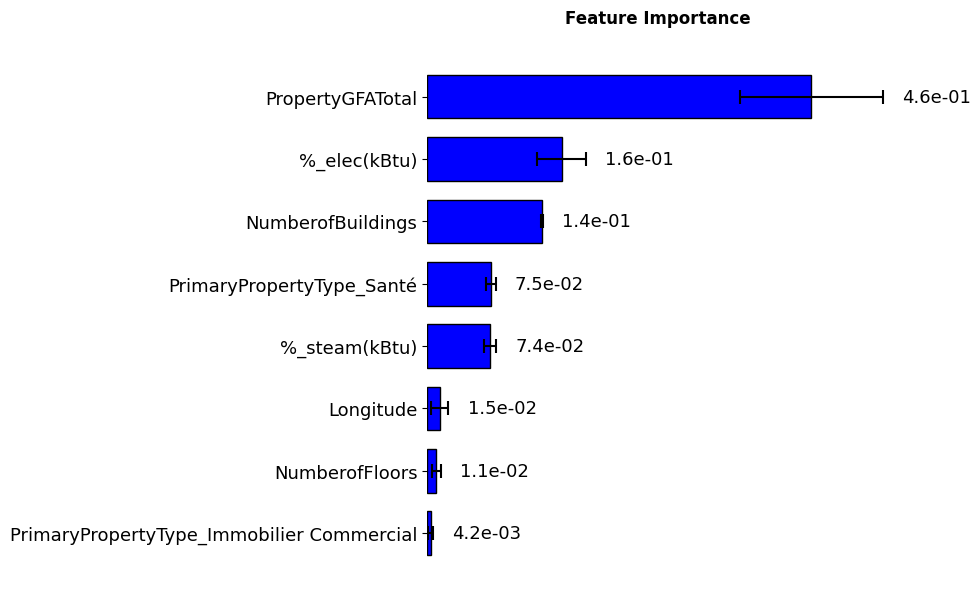


Résultats numériques détaillés :

PropertyGFATotal: 0.4556 (±0.0847)
%_elec(kBtu): 0.1596 (±0.0291)
NumberofBuildings: 0.1365 (±0.0012)
PrimaryPropertyType_Santé: 0.0753 (±0.0057)
%_steam(kBtu): 0.0745 (±0.0070)
Longitude: 0.0147 (±0.0104)
NumberofFloors: 0.0107 (±0.0056)
PrimaryPropertyType_Immobilier Commercial: 0.0042 (±0.0030)


In [95]:
col_num_sel_gb=feature_importance_permutation(DF_cleaned,col_num,TARGET,gb_reg)

### VERIFICATION DES CORRELATIONS

In [96]:
print(f'Voilà les features qui semblent corrélées entre elles :\n')

check_correlations(DF_cleaned[col_num_sel_gb])

Voilà les features qui semblent corrélées entre elles :



[]

In [97]:
print(f'Voilà les features conservées :\n')
for col in col_num_sel_gb:
    print(col)

Voilà les features conservées :

PropertyGFATotal
%_elec(kBtu)
NumberofBuildings
PrimaryPropertyType_Santé
%_steam(kBtu)
Longitude
NumberofFloors
PrimaryPropertyType_Immobilier Commercial


CI DESSUS LES VARIABLES QUI DEPASSENT UNE IMPORTANCE DE 0.01

### ESSAI AVEC SEULEMENT LES FEATURES SELECTIONNEES + LOG DE LA TARGET ET DE 'PropertyGFATotal'

In [98]:
start = time.perf_counter()

_,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,_,_,_=\
    gradient_boosting(DF_cleaned,col_num_sel_gb,TARGET,'log_target_feature',['PropertyGFATotal']
                  ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)



end = time.perf_counter()

EXEC=end-start

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\988260610.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


Score R² train : 0.74
Score R² test : 0.68
Score MAE train : 7.21e+01
Score MAE test : 8.87e+01
Score MAPE train : 59.69 %
Score MAPE test : 76.93 %
Score MSE train : 7.43e+04
Score MSE test : 1.87e+05


ON CONSTATE UNE AMELIORATION SUR TOUTES LES METRIQUES

ON RECUPERE LE NOMBRE DE FEATURE POUR LA SUITE


In [99]:
nouvelle_ligne=pd.Series([len(col_num_sel_gb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Gradient Boosting']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [100]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['Gradient Boosting']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

0.27794649999123067


## XGBoost

In [101]:
xgb_reg,_,_,_,_=\
    xgboost_reg(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.80
Score R² test : 0.70
Score MAE train : 8.64e+01
Score MAE test : 1.11e+02
Score MAPE train : 143.81 %
Score MAPE test : 136.65 %
Score MSE train : 5.72e+04
Score MSE test : 1.78e+05


LE R2 EST PLUTOT BON MAIS LE MAPE EST MAUVAIS

### ESSAI DE PERMUTATION DES FEATURES

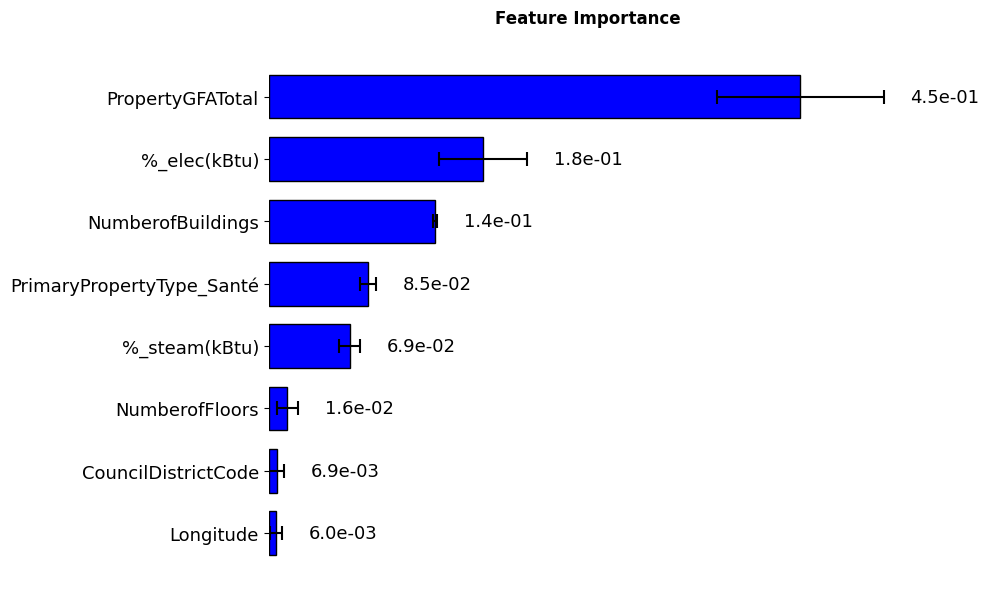


Résultats numériques détaillés :

PropertyGFATotal: 0.4534 (±0.0710)
%_elec(kBtu): 0.1827 (±0.0379)
NumberofBuildings: 0.1417 (±0.0019)
PrimaryPropertyType_Santé: 0.0845 (±0.0070)
%_steam(kBtu): 0.0690 (±0.0088)
NumberofFloors: 0.0159 (±0.0092)
CouncilDistrictCode: 0.0069 (±0.0065)
Longitude: 0.0060 (±0.0051)


In [102]:
col_num_sel_xgb=feature_importance_permutation(DF_cleaned,col_num,TARGET,xgb_reg)

### VERIFICATION DES CORRELATIONS

In [103]:
print(f'Voilà les features qui semblent corrélées entre elles :\n')

check_correlations(DF_cleaned[col_num_sel_xgb])

Voilà les features qui semblent corrélées entre elles :



[]

In [104]:
print(f'Voilà les features conservées : \n')
for col in col_num_sel_xgb:
    print(col)

Voilà les features conservées : 

PropertyGFATotal
%_elec(kBtu)
NumberofBuildings
PrimaryPropertyType_Santé
%_steam(kBtu)
NumberofFloors
CouncilDistrictCode
Longitude


CI DESSUS LES 8 MEILLEURES FEATURES

### ESSAI AVEC JUSTE LES FEATURE UTILES

In [105]:
start = time.perf_counter()

xgbreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    xgboost_reg(DF_cleaned,col_num_sel_xgb,TARGET,'log_target_feature',['PropertyGFATotal'],
            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

end = time.perf_counter()

EXEC=end-start

Score R² train : 0.73
Score R² test : 0.65
Score MAE train : 7.44e+01
Score MAE test : 8.91e+01
Score MAPE train : 64.34 %
Score MAPE test : 76.14 %
Score MSE train : 7.97e+04
Score MSE test : 2.04e+05


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\3897979533.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


LEGERE BAISSE DU R2 MAIS NETTE AMELIORATION DU MAPE

ON RECUPERE LE NOMBRE DE FEATURES POUR LA SUITE

In [106]:
nouvelle_ligne=pd.Series([len(col_num_sel_xgb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['XGBoost']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [107]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['XGBoost']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

0.12007820000872016


## SVR

In [108]:
svr,_,_,_,_,scaler,scaler_y,_,_,_=\
        svr_reg(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.36
Score R² test : 0.11
Score MAE train : 8.70e+01
Score MAE test : 1.20e+02
Score MAPE train : 172.21 %
Score MAPE test : 207.02 %
Score MSE train : 1.86e+05
Score MSE test : 5.21e+05


### PERMUTATIONS POUR FEATURE IMPORTANCE

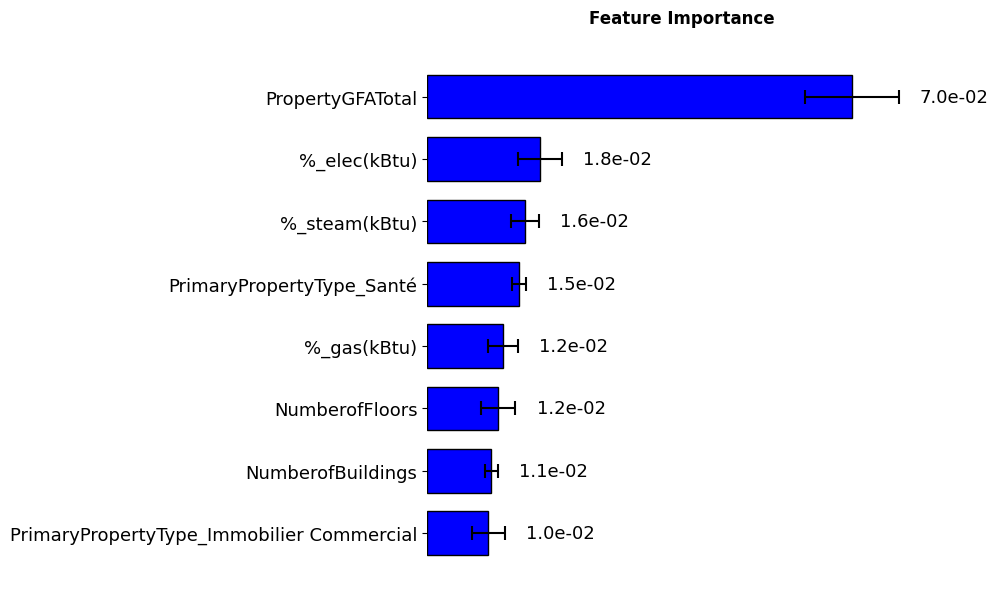


Résultats numériques détaillés :

PropertyGFATotal: 0.0695 (±0.0077)
%_elec(kBtu): 0.0184 (±0.0036)
%_steam(kBtu): 0.0160 (±0.0023)
PrimaryPropertyType_Santé: 0.0150 (±0.0011)
%_gas(kBtu): 0.0124 (±0.0025)
NumberofFloors: 0.0116 (±0.0028)
NumberofBuildings: 0.0105 (±0.0010)
PrimaryPropertyType_Immobilier Commercial: 0.0100 (±0.0027)


In [109]:
col_num_sel_svr=feature_importance_permutation(DF_cleaned,col_num,TARGET,svr,8,10,0.3,36,scaler,scaler_y)

ON A RECUPERE  LES 8 FEATURES LES PLUS IMPORTANTES

### VERIFICATION DES CORRELATIONS

In [110]:
print(f'Voilà les features qui semblent corrélées entre elles :\n')

check_correlations(DF_cleaned[col_num_sel_svr])

Voilà les features qui semblent corrélées entre elles :

Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615)]

ON VA RETIRER %_GAS CAR TROP CORRELEE AVEC %_ELEC ET D'IMPORTANCE MOINDRE

In [111]:
del(col_num_sel_svr[col_num_sel_svr.index('%_gas(kBtu)')])
print(f'Voilà les features sélectionnées : \n')
for col in col_num_sel_svr:
    print(col)

Voilà les features sélectionnées : 

PropertyGFATotal
%_elec(kBtu)
%_steam(kBtu)
PrimaryPropertyType_Santé
NumberofFloors
NumberofBuildings
PrimaryPropertyType_Immobilier Commercial


### ESSAI AVEC REDUCTION DE FEATURE + LOG

In [112]:
start = time.perf_counter()

svr_log,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,sclX,sclY,_,_,_=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)


end = time.perf_counter()

EXEC=end-start

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\3619719039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


Score R² train : 0.52
Score R² test : 0.08
Score MAE train : 7.38e+01
Score MAE test : 1.06e+02
Score MAPE train : 63.38 %
Score MAPE test : 70.35 %
Score MSE train : 1.39e+05
Score MSE test : 5.37e+05


ON RECUPERE LE NOMBRE DE FEATURES POUR LA SUITE

In [113]:
nouvelle_ligne=pd.Series([len(col_num_sel_svr)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['SVR']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [114]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['SVR']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

0.4880614000139758


## NN


In [115]:
nn_reg_mod,_,_,_,_,scal,scaly=\
    nn_reg_fonc(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.92
Score R² test : 0.91
Score MAE train : 7.97e+01
Score MAE test : 9.38e+01
Score MAPE train : 227.57 %
Score MAPE test : 213.31 %
Score MSE train : 2.34e+04
Score MSE test : 5.26e+04


LES RESULTATS SONT TRES MAUVAIS AVEC UN TRES FORT OVERFITTING


### PERMUTATIONS

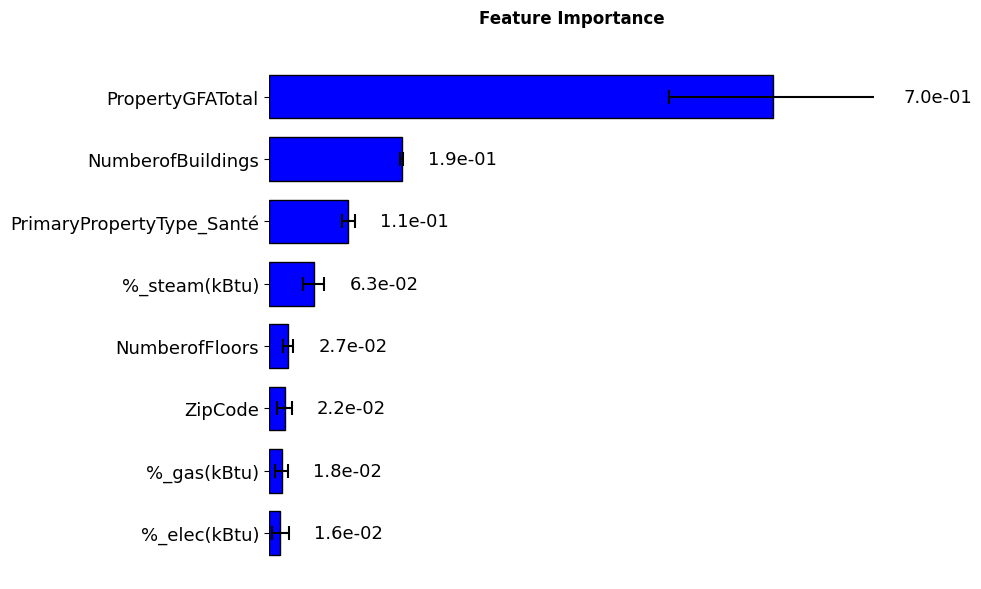


Résultats numériques détaillés :

PropertyGFATotal: 0.7040 (±0.1459)
NumberofBuildings: 0.1854 (±0.0021)
PrimaryPropertyType_Santé: 0.1111 (±0.0086)
%_steam(kBtu): 0.0626 (±0.0151)
NumberofFloors: 0.0270 (±0.0069)
ZipCode: 0.0221 (±0.0101)
%_gas(kBtu): 0.0179 (±0.0092)
%_elec(kBtu): 0.0163 (±0.0113)


In [116]:
col_num_sel_nn=feature_importance_permutation(DF_cleaned,col_num,TARGET,nn_reg_mod,8,10,0.3,36,scal,scaly)

### VERIFICATION DES CORRELATIONS

In [117]:

print(f'Voilà les features qui semblent corrélées entre elles :\n')
check_correlations(DF_cleaned[col_num_sel_nn])

Voilà les features qui semblent corrélées entre elles :

Attention : Fortes corrélations détectées
%_gas(kBtu) - %_elec(kBtu): 0.938


[('%_gas(kBtu)', '%_elec(kBtu)', 0.9381004566526614)]

ON VA RETIRER %_elec(kBtu) CAR TROP CORRELEE AVEC %_gas(kBtu) ET D'IMPORTANCE MOINDRE

In [118]:
del(col_num_sel_nn[col_num_sel_nn.index('%_elec(kBtu)')])
print(f'Voilà les features conservées :\n')
for col in col_num_sel_nn:
    print(col)

Voilà les features conservées :

PropertyGFATotal
NumberofBuildings
PrimaryPropertyType_Santé
%_steam(kBtu)
NumberofFloors
ZipCode
%_gas(kBtu)


### ESSAI AVEC SEULEMENT LES FEATURE IMPORTANTES + LOG

In [119]:
start = time.perf_counter()

nnreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,scalerX,scalerY=\
    nn_reg_fonc(DF_cleaned,col_num_sel_nn,TARGET,'log_target_feature',['PropertyGFATotal']
            ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)


end = time.perf_counter()

EXEC=end-start

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9844\1127678099.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=np.log(X[col])


Score R² train : 0.63
Score R² test : 0.69
Score MAE train : 8.25e+01
Score MAE test : 9.12e+01
Score MAPE train : 73.06 %
Score MAPE test : 76.88 %
Score MSE train : 1.09e+05
Score MSE test : 1.83e+05


LE RESULTAT DU MAPE EST BIEN MEILLEUR

ON RECUPERE LE NOMBRE DE FEATURE POUR LA SUITE

In [120]:
nouvelle_ligne=pd.Series([len(col_num_sel_nn)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['NN']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

ON STOCKE LE TEMPS D'EXECUTION POUR LA SUITE

In [121]:
print(EXEC)
nouvelle_ligne=pd.Series([EXEC],index=["Temps d'exécution"]).to_frame().T
nouvelle_ligne.index=['Neural Network']

Tableau_score_temps=pd.concat([Tableau_score_temps,nouvelle_ligne])

0.433073699939996


# AFFICHAGE DES SCORES

In [122]:
Tableau_score_mae

train      test   general
Decision Tree      9.01e+01  1.07e+02  9.35e+01
Random Forest      7.03e+01  1.00e+02  7.63e+01
Gradient Boosting  7.21e+01  8.87e+01  7.54e+01
XGBoost            7.44e+01  8.91e+01  7.73e+01
SVR                7.38e+01  1.06e+02  8.03e+01
NN                 8.25e+01  9.12e+01  8.42e+01

In [123]:
Tableau_score_mape

train   test general
Decision Tree      74.74  96.04   79.00
Random Forest      49.29  71.97   53.83
Gradient Boosting  59.69  76.93   63.15
XGBoost            64.34  76.14   66.70
SVR                63.38  70.35   64.78
NN                 73.06  76.88   73.83

In [124]:
Tableau_score_mse

train      test   general
Decision Tree      1.45e+05  3.44e+05  1.85e+05
Random Forest      1.20e+05  3.54e+05  1.67e+05
Gradient Boosting  7.43e+04  1.87e+05  9.69e+04
XGBoost            7.97e+04  2.04e+05  1.05e+05
SVR                1.39e+05  5.37e+05  2.18e+05
NN                 1.09e+05  1.83e+05  1.24e+05

In [125]:
Tableau_score_r2

train  test general
Decision Tree      0.50  0.41    0.47
Random Forest      0.59  0.40    0.52
Gradient Boosting  0.74  0.68    0.72
XGBoost            0.73  0.65    0.70
SVR                0.52  0.08    0.38
NN                 0.63  0.69    0.65

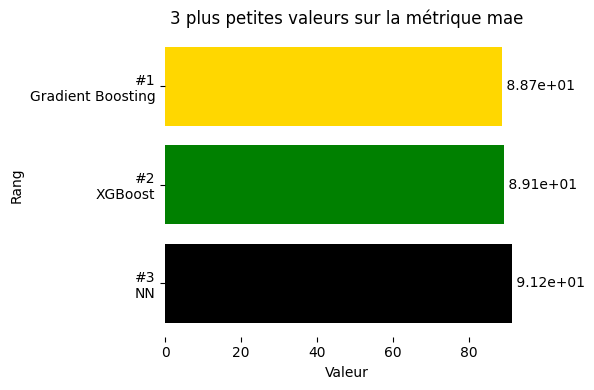


Bottom 3 des valeurs:
#3: Modéle NN, Valeur: 9.12e+01
#2: Modéle XGBoost, Valeur: 8.91e+01
#1: Modéle Gradient Boosting, Valeur: 8.87e+01


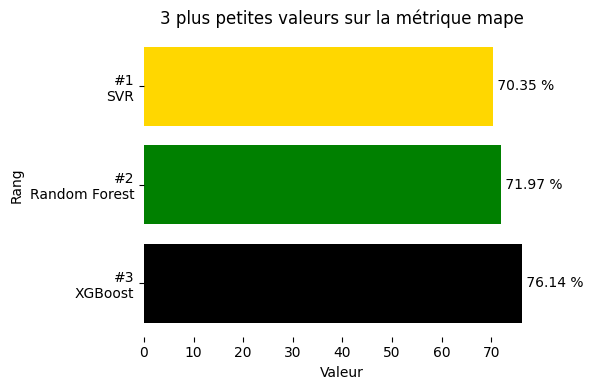


Bottom 3 des valeurs:
#3: Modéle XGBoost, Valeur: 76.14 %
#2: Modéle Random Forest, Valeur: 71.97 %
#1: Modéle SVR, Valeur: 70.35 %


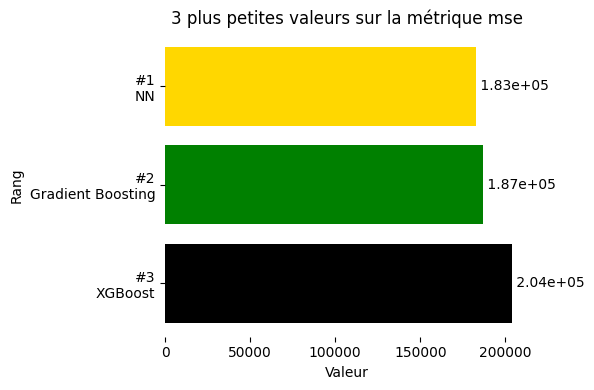


Bottom 3 des valeurs:
#3: Modéle XGBoost, Valeur: 2.04e+05
#2: Modéle Gradient Boosting, Valeur: 1.87e+05
#1: Modéle NN, Valeur: 1.83e+05


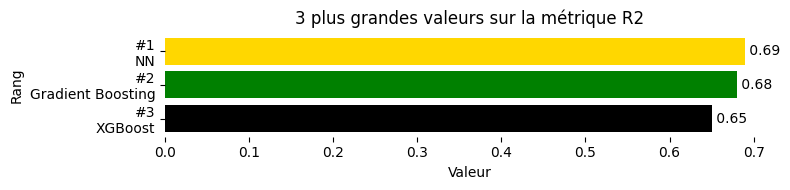


Top 3 des valeurs:
#3: Index XGBoost, Valeur: 0.65
#2: Index Gradient Boosting, Valeur: 0.68
#1: Index NN, Valeur: 0.69


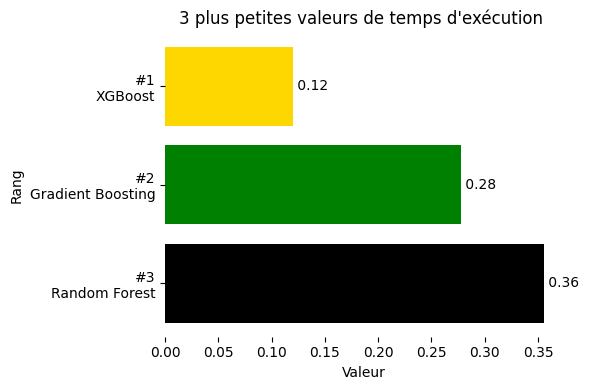


Bottom 3 des valeurs:
#3: Modéle Random Forest, Valeur: 0.36 
#2: Modéle Gradient Boosting, Valeur: 0.28 
#1: Modéle XGBoost, Valeur: 0.12 


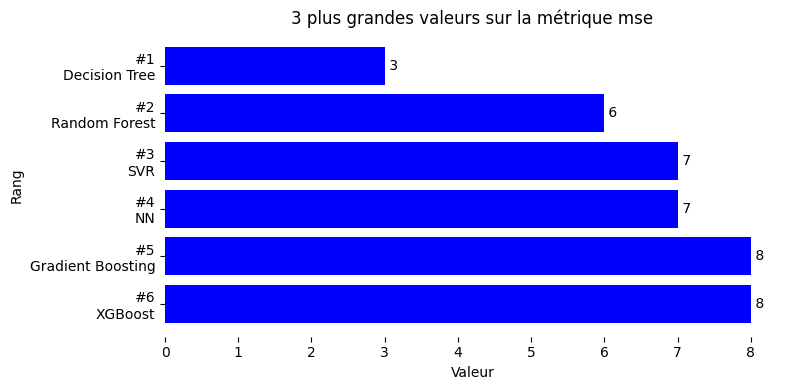

In [126]:
recap(Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,Tableau_score_feature,Tableau_score_temps)

# GRID SEARCH

In [127]:
import warnings
warnings.filterwarnings('ignore')

# Grilles d'hyperparamètres simples pour le premier test
param_grids = {
    
    'svr': {
        'kernel':['linear','rbf'],
        'C': [ 1.0, 10.0, 25, 100],
        'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1,1]
    },
    'nn': {
        'hidden_layer_sizes': [
            
            (64, 32),
            (64, 48, 32),
            (64, 48, 32, 16)
        ],
        'activation': ['relu'],                   
        'alpha': [ 0.05, 0.01, 0.1],                  
        'batch_size': [8, 16, 32, 64],                  
        'learning_rate':['adaptive','constant'],
        'learning_rate_init': [0.003,0.005, 0.01],     
        'max_iter': [1000,1500]                       
    }
}




In [128]:
# Initialisation des DataFrames pour les métriques
MAE = pd.DataFrame(columns=['train', 'test', 'general'])
MAPE = pd.DataFrame(columns=['train', 'test', 'general'])
MSE = pd.DataFrame(columns=['train', 'test', 'general'])
R2 = pd.DataFrame(columns=['train', 'test', 'general'])

# Exécution des grid searches



results = {
    'svr': grid_search_svr_cv(
            DF=DF_cleaned,
            col_num=col_num_sel_svr,
            target='TotalGHGEmissions',
            type='log_target_feature',
            log_feature=['PropertyGFATotal'],
            MAE=MAE.copy(),
            MAPE=MAPE.copy(),
            MSE=MSE.copy(),
            R2=R2.copy(),
            param_grids=param_grids
),
    'nn': grid_search_nn_cv(
        DF=DF_cleaned,
        col_num=col_num_sel_nn,
        target=TARGET,
        type='log_target_feature',
        log_feature=['PropertyGFATotal'],
        param_grids=param_grids
    )
}



# Affichage des meilleurs résultats
print("\n=== Résultats Finaux ===")
print("\nSVR :")
best_svr_r2 = results['svr'].sort_values('r2_mean', ascending=False).head(1)
print("\nMeilleurs R² :")
for _, row in best_svr_r2.iterrows():
    print(f"R² : {row['r2_mean']:.4f} (±{row['r2_std']:.4f})")
    print(f"Paramètres : kernel={row['kernel']}, C={row['C']}, "
          f"epsilon={row['epsilon']}, gamma={row['gamma']}")
    print(f"MAPE : {row['mape_mean']:.4f} (±{row['mape_std']:.4f})")
    print("---")



print("\nNeural Network :")
print("\nMeilleurs R² :")
best_nn_r2 = results['nn'][results['nn']['converged']].sort_values('r2_mean', ascending=False).head(1)
for _, row in best_nn_r2.iterrows():
    print(f"R² : {row['r2_mean']:.4f} (±{row['r2_std']:.4f})")
    print(f"Paramètres : architecture={row['hidden_layer_sizes']}, activation={row['activation']}, "
          f"alpha={row['alpha']}, batch_size={row['batch_size']}, "
          f"learning_rate={row['learning_rate_init']}, max_iter={row['max_iter']}")
    print(f"MAPE : {row['mape_mean']:.4f} (±{row['mape_std']:.4f})")
    print("---")





Vérifications préliminaires:
Valeurs infinies dans X: 0
NaN dans X: 0
Valeurs infinies dans y: 0
NaN dans y: 0

Statistiques des données:
X min/max: 0.00e+00 / 1.95e+06
y min/max: 4.00e-01 / 1.23e+04


SVR:   0%|          | 1/200 [00:00<02:49,  1.17it/s]


SVR - Nouveau meilleur R² : 0.6540 (±0.1532) avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale

SVR - Nouveau meilleur MAPE : 71.6640 (±8.0469) avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale


SVR:   3%|▎         | 6/200 [00:05<02:57,  1.09it/s]


SVR - Nouveau meilleur R² : 0.6800 (±0.1495) avec kernel=linear, C=1.0, epsilon=0.05, gamma=scale

SVR - Nouveau meilleur MAPE : 71.5640 (±8.1673) avec kernel=linear, C=1.0, epsilon=0.05, gamma=scale


SVR:   6%|▌         | 11/200 [00:09<02:36,  1.21it/s]


SVR - Nouveau meilleur MAPE : 71.4620 (±8.0659) avec kernel=linear, C=1.0, epsilon=0.1, gamma=scale


SVR:   8%|▊         | 16/200 [00:13<02:05,  1.47it/s]


SVR - Nouveau meilleur R² : 0.7160 (±0.1415) avec kernel=linear, C=1.0, epsilon=0.5, gamma=scale


SVR:  52%|█████▏    | 103/200 [07:15<03:17,  2.04s/it]


SVR - Nouveau meilleur MAPE : 69.7940 (±9.0647) avec kernel=rbf, C=1.0, epsilon=0.01, gamma=0.01


SVR:  64%|██████▍   | 128/200 [07:47<01:44,  1.45s/it]


SVR - Nouveau meilleur R² : 0.7340 (±0.1369) avec kernel=rbf, C=10.0, epsilon=0.01, gamma=0.01

SVR - Nouveau meilleur MAPE : 66.4540 (±6.6974) avec kernel=rbf, C=10.0, epsilon=0.01, gamma=0.01


SVR:  76%|███████▋  | 153/200 [08:22<01:14,  1.58s/it]


SVR - Nouveau meilleur R² : 0.7520 (±0.1522) avec kernel=rbf, C=25, epsilon=0.01, gamma=0.01

SVR - Nouveau meilleur MAPE : 66.1680 (±5.9856) avec kernel=rbf, C=25, epsilon=0.01, gamma=0.01


Neural Network CV: 100%|██████████| 432/432 [1:28:24<00:00, 12.28s/it]


=== Résultats Finaux ===

SVR :

Meilleurs R² :
R² : 0.7520 (±0.1522)
Paramètres : kernel=rbf, C=25.0, epsilon=0.01, gamma=0.01
MAPE : 66.1680 (±5.9856)
---

Neural Network :

Meilleurs R² :
R² : 0.7021 (±0.1693)
Paramètres : architecture=(64, 48, 32), activation=relu, alpha=0.01, batch_size=8, learning_rate=0.01, max_iter=1500
MAPE : 85.7808 (±11.1882)
---


ON VA STOCKER LES MEILLEURS PARAMETRES DU SVR DANS best_params_svr

In [129]:
best_params_svr = {
    'kernel': best_svr_r2['kernel'].values[0],
    'C': best_svr_r2['C'].values[0],
    'epsilon': best_svr_r2['epsilon'].values[0],
    'gamma': best_svr_r2['gamma'].values[0]
    
}
print(f'Voilà les meilleurs paramétres aprés la grid search :\n')
for params in best_params_svr.keys():
    print(params,best_params_svr[params])


Voilà les meilleurs paramétres aprés la grid search :

kernel rbf
C 25.0
epsilon 0.01
gamma 0.01


ON VA STOCKER LES MEILLEURS PARAMETRES DU NN DANS best_params_nn

In [130]:
best_params_nn = {
    'hidden_layer_sizes': best_nn_r2['hidden_layer_sizes'].values[0],
    'activation': best_nn_r2['activation'].values[0],
    'alpha': best_nn_r2['alpha'].values[0],
    'batch_size': best_nn_r2['batch_size'].values[0],
    'learning_rate' : best_nn_r2['learning_rate'].values[0],
    'learning_rate_init': best_nn_r2['learning_rate_init'].values[0],
    'max_iter': best_nn_r2['max_iter'].values[0],
}
print(f'Voilà les meilleurs paramétres aprés la grid search :\n')
for params in best_params_nn.keys():
    print(params,best_params_nn[params])


Voilà les meilleurs paramétres aprés la grid search :

hidden_layer_sizes (64, 48, 32)
activation relu
alpha 0.01
batch_size 8
learning_rate constant
learning_rate_init 0.01
max_iter 1500


# ETUDE DES PERFORMANCES SUR LES CINQ DERNIERES ANNEES

ON VA SIMULER LES PERFORMANCES DE NOTRE MODELE COMME S'IL AVAIT ETE ENTRAINE IL Y A CINQ ANS ET AVAIT TOURNE EN PRODUCTION DURANT CES CINQ ANNEES

In [131]:
DF_cleaned['AGE'].min()

9

In [132]:
DF_cleaned_age=DF_cleaned.loc[DF_cleaned['AGE']>=14]
DF_cleaned_age.shape

(1388, 36)

In [133]:
DF_cleaned_age_pred=DF_cleaned.loc[DF_cleaned['AGE']<14]

## NN

In [134]:
nnreg,_,_,_,_,scalerX,scalerY=\
    nn_reg_fonc(DF_cleaned_age,col_num_sel_nn,TARGET,'log_target_feature',['PropertyGFATotal']
            ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_nn)

Score R² train : 0.75
Score R² test : 0.54
Score MAE train : 8.97e+01
Score MAE test : 6.69e+01
Score MAPE train : 67.51 %
Score MAPE test : 64.39 %
Score MSE train : 1.04e+05
Score MSE test : 5.49e+04


LES PERFORMANCES SUR CETTE SOUS POPULATION LORS DE L'ENTRAINEMENT NE SONT PAS TRES BONNES

TESTONS SES PERFORMANCES

In [135]:
X_age=DF_cleaned_age_pred[col_num_sel_nn]
y=DF_cleaned_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=scalerX.transform(X_age)


y_pred=nnreg.predict(X_age_scaled)
y_pred = scalerY.inverse_transform(y_pred.reshape(-1, 1)).ravel()

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.25
 MAPE : 57.38 %


ON OBTIENT UN R2 ET UN MAPE PLUTOT CORRECT

## SVR

In [136]:
svr_log_age,_,_,_,_,sclX_age,sclY_age,_,_,_=\
        svr_reg(DF_cleaned_age,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_svr,True)

Score R² train : 0.91
Score R² test : 0.71
Score MAE train : 5.84e+01
Score MAE test : 6.08e+01
Score MAPE train : 64.67 %
Score MAPE test : 63.50 %
Score MSE train : 3.67e+04
Score MSE test : 3.51e+04


LES RESULTATS SEMBLENT BIEN MEILLEURS QUE POUR LE RESEAU DE NEURONES

In [137]:
X_age=DF_cleaned_age_pred[col_num_sel_svr]
y=DF_cleaned_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=sclX_age.transform(X_age)

y_pred=svr_log_age.predict(X_age_scaled)
y_pred = sclY_age.inverse_transform(y_pred.reshape(-1,1)).ravel()

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.69
 MAPE : 57.82 %


LES PERFORMANCES DU SVR SONT BIEN MEILLEURES SUR LES DEUX METRIQUES

In [138]:
svr_log,_,_,_,_,sclX,sclY,y_true,y_pred_svr,X=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_svr)

Score R² train : 0.86
Score R² test : 0.85
Score MAE train : 6.00e+01
Score MAE test : 7.53e+01
Score MAPE train : 62.95 %
Score MAPE test : 68.05 %
Score MSE train : 4.00e+04
Score MSE test : 8.91e+04


VOILA LES RESULTATS OBTENUS SUR LE DATAFRAME ORIGINAL EN UTILISANT LES HYPER PARAMETRES DU GRID SEARCH CV

# ETUDE DES ERREURS DU SVR

In [139]:
y_true = np.array(y_true)
y_pred = np.array(y_pred_svr)

# Calcul des erreurs
errors = y_true - y_pred
abs_errors = np.abs(errors)
percent_errors = (errors / y_true) * 100


## HISTOGRAMME DES PIRES PREDICTIONS

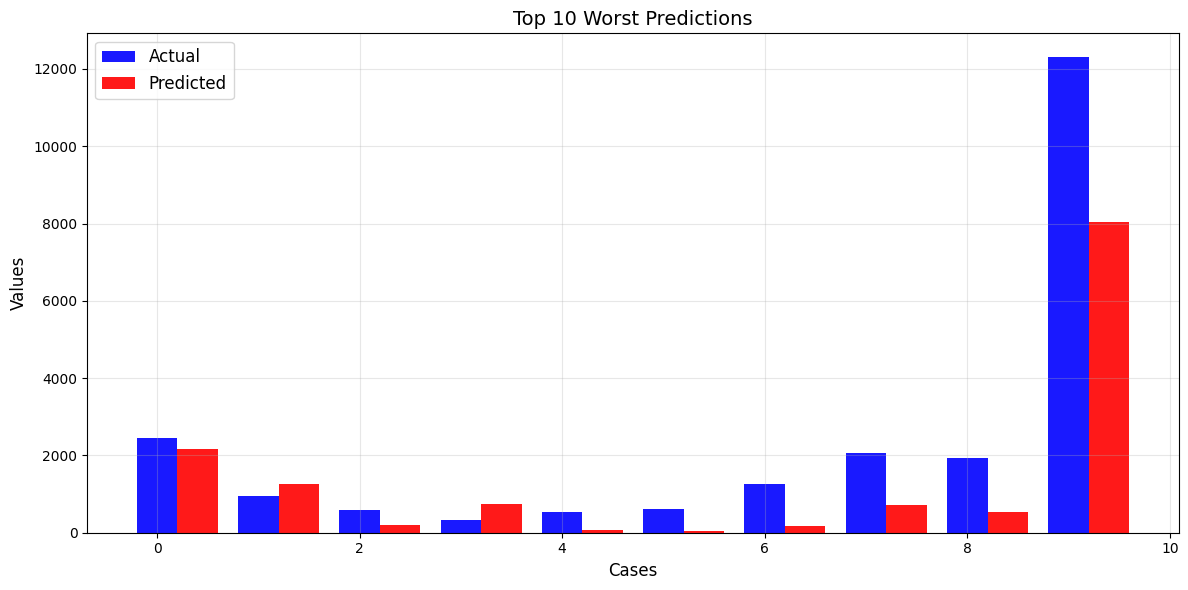


Features for worst predictions:

Feature values for worst cases:


PropertyGFATotal  %_elec(kBtu)  %_steam(kBtu)  \
39           13.809706          57.0           14.0   
144          12.844037          56.0           44.0   
1145         11.717326          37.0            0.0   
220          13.666665          83.0           17.0   
226          12.272955         100.0            0.0   
1376         10.888838          73.0            0.0   
592          10.804644          33.0            0.0   
82           12.608433          47.0            0.0   
463          12.970156         100.0            0.0   
520          14.384211          48.0           46.0   

      PrimaryPropertyType_Santé  NumberofFloors  NumberofBuildings  \
39                          0.0              34                1.0   
144                         0.0              17                1.0   
1145                        0.0               2                1.0   
220                         0.0               8                1.0   
226                         0.0               6                1.0   
1376                        0.0               2                1.0   
592                         0.0               4                2.0   
82                          0.0              11                1.0   
463                         0.0              33                1.0   
520                         1.0              14                7.0   

      PrimaryPropertyType_Immobilier Commercial  
39                                          1.0  
144                                         1.0  
1145                                        0.0  
220                                         1.0  
226                                         1.0  
1376                                        0.0  
592                                         0.0  
82                                          0.0  
463                                         0.0  
520                                         0.0


Errors for worst cases:
Case 1:
Actual: 2451.58
Predicted: 2158.82
Error: 292.76
------------------------------
Case 2:
Actual: 940.47
Predicted: 1262.85
Error: 322.38
------------------------------
Case 3:
Actual: 588.25
Predicted: 205.90
Error: 382.35
------------------------------
Case 4:
Actual: 328.83
Predicted: 752.19
Error: 423.36
------------------------------
Case 5:
Actual: 530.59
Predicted: 63.11
Error: 467.48
------------------------------
Case 6:
Actual: 619.90
Predicted: 32.95
Error: 586.95
------------------------------
Case 7:
Actual: 1266.06
Predicted: 166.52
Error: 1099.54
------------------------------
Case 8:
Actual: 2055.82
Predicted: 714.84
Error: 1340.98
------------------------------
Case 9:
Actual: 1921.82
Predicted: 529.29
Error: 1392.53
------------------------------
Case 10:
Actual: 12307.16
Predicted: 8042.12
Error: 4265.04
------------------------------


In [140]:

worst_cases_plot(y_true, y_pred,X)


## BOXPLOT DES ERREURS

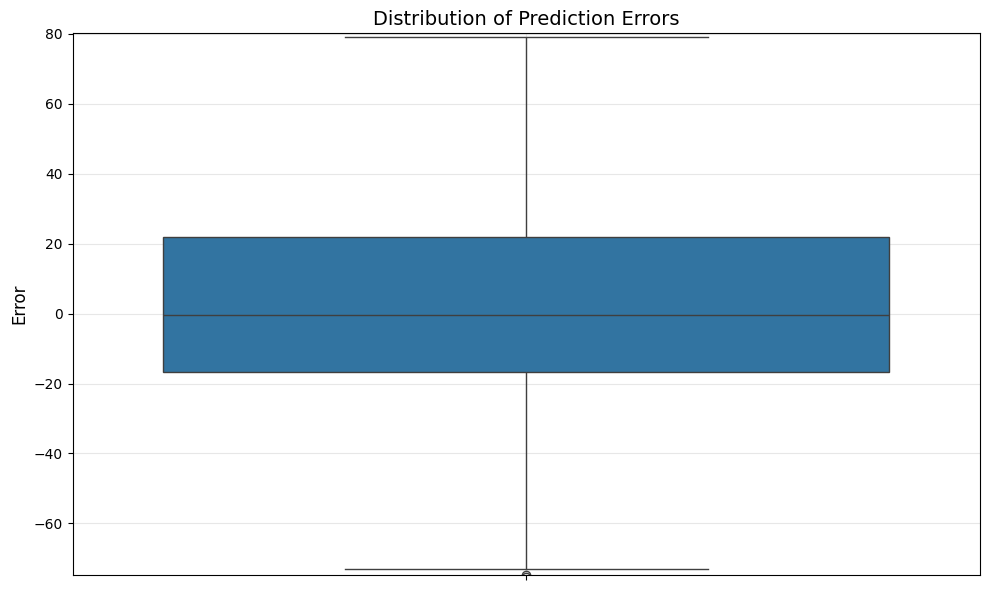

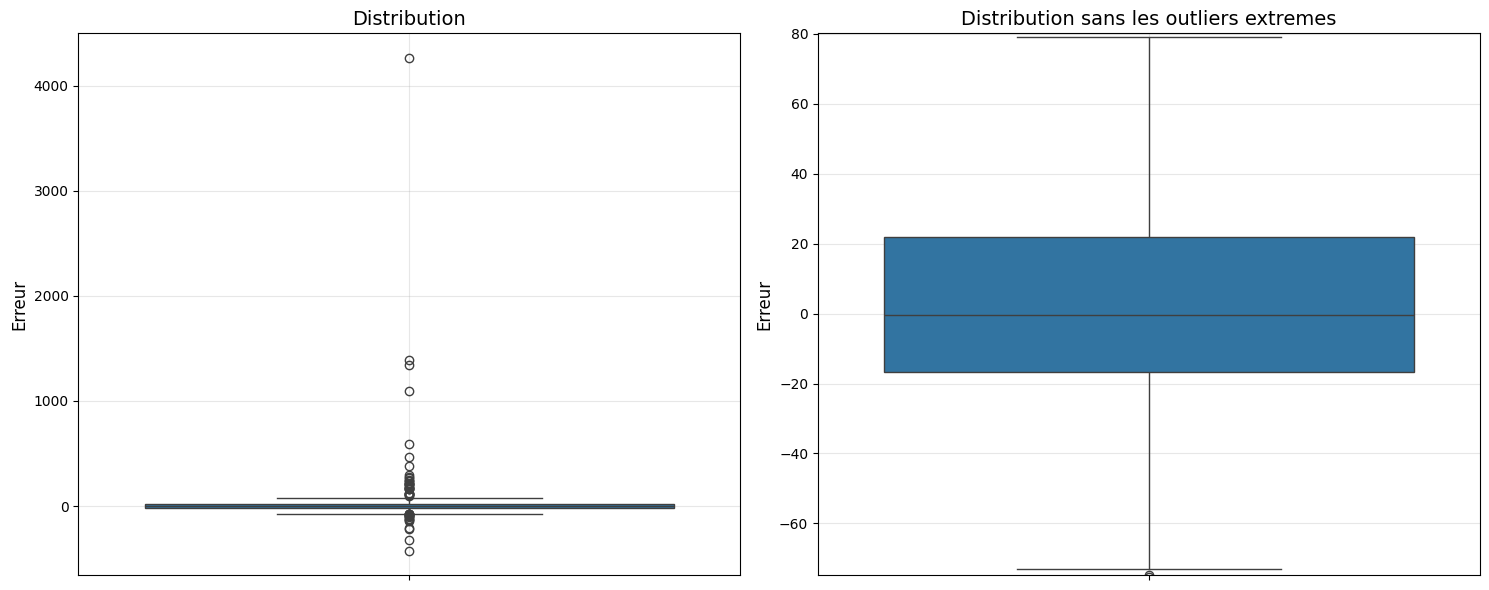


Outlier Statistics:
Nombre d'outliers: 49
Pourcentage d'outliers: 17.13%
Min outlier: -423.36
Max outlier: 4265.04


In [141]:
error_boxplot(errors)


## HISOTGRAMME DE DISTRIBUTION DE L'ERREUR

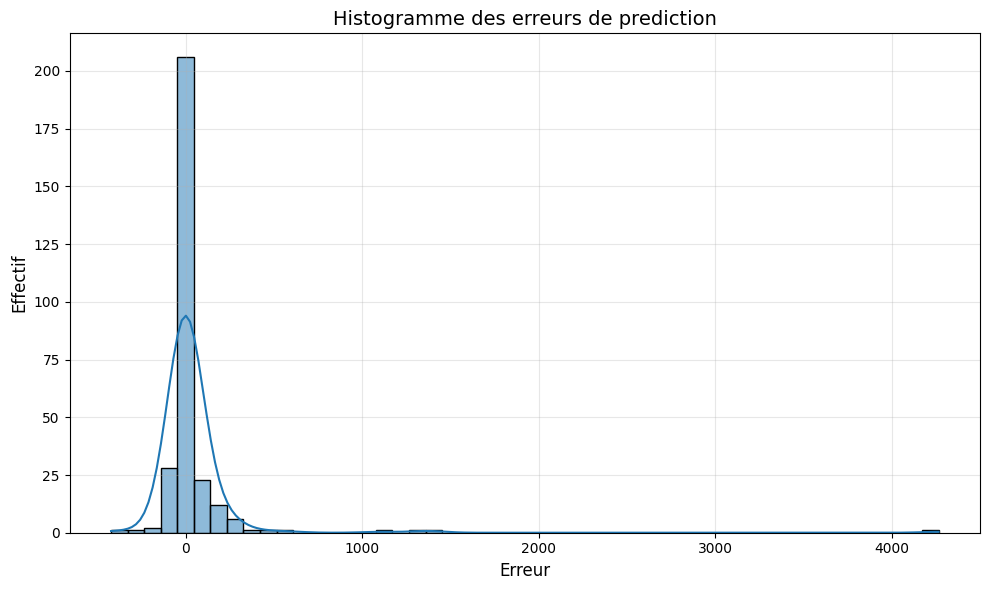

In [142]:
error_histogram(errors)


## NUAGE DE POINTS DES PREDICTIONS

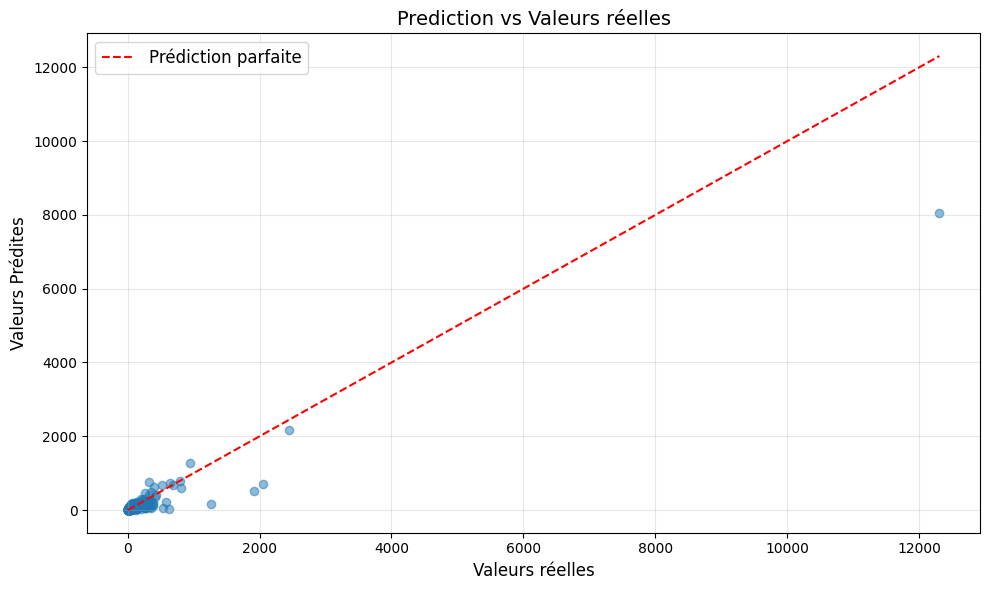

In [143]:
predicted_vs_actual_plot(y_true, y_pred)


## NUAGE DE POINTS DES PREDICTIONS COLORE

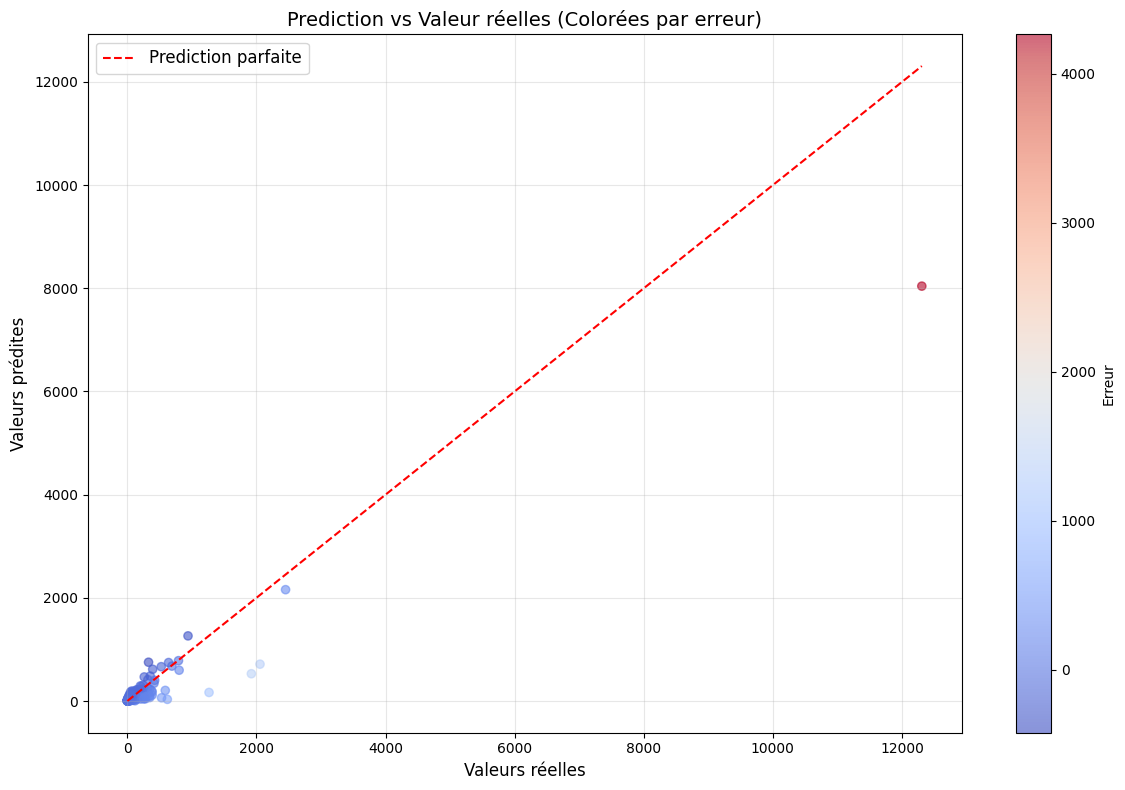

In [144]:
predicted_vs_actual_colored(y_true, y_pred, errors)


## NUAGE DE POINTS + ZOOM

In [145]:
seuil = 3000

# Identification des indices où y_true est sous le seuil
indices_sous_seuil = np.where(y_true < seuil)[0]

# Sélection des valeurs correspondantes
y_true_filtré = y_true[indices_sous_seuil]
y_pred_filtré = y_pred[indices_sous_seuil]
errors_filtré = y_true_filtré - y_pred_filtré

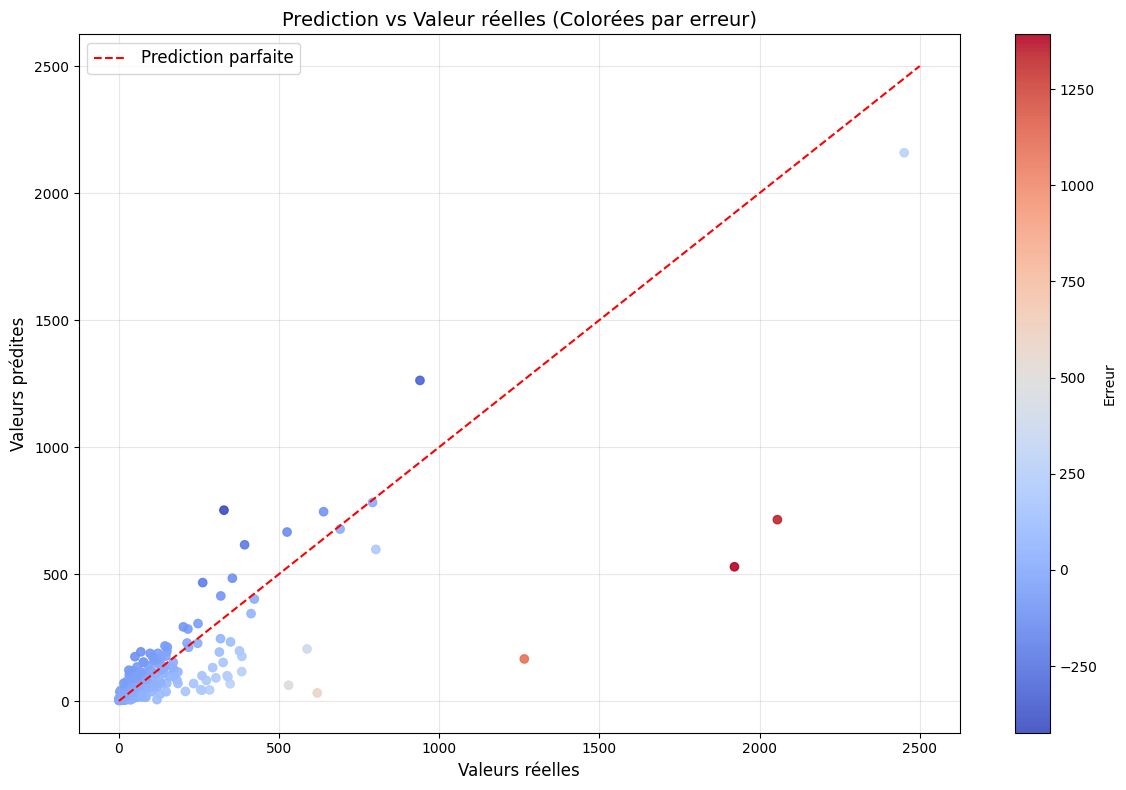

In [146]:
predicted_vs_actual_colored_zoom(y_true_filtré, y_pred_filtré, errors_filtré)

## DISTRIBUTION DU POURCENTAGE D'ERREUR

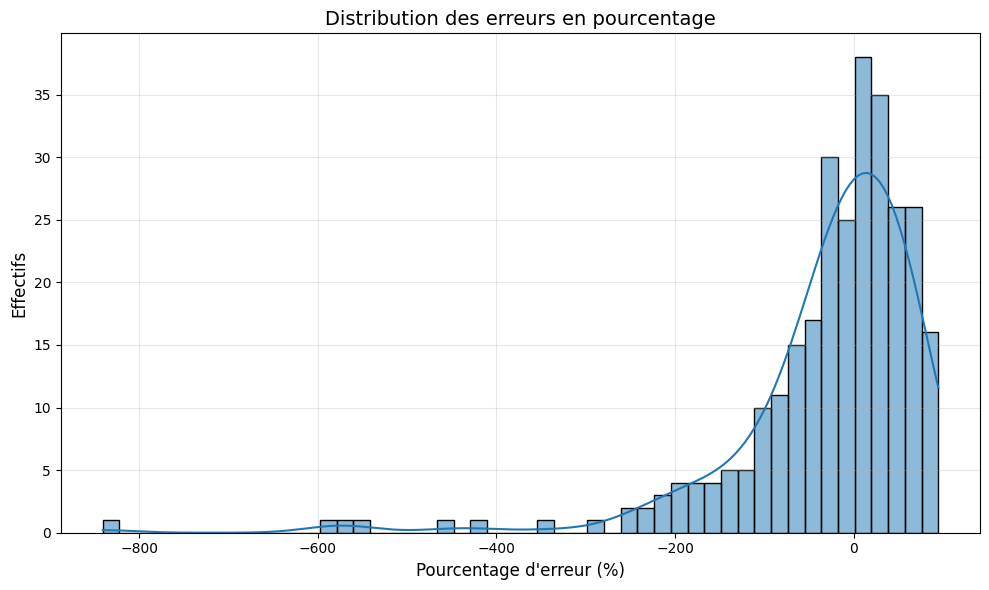

In [147]:
percent_error_distribution(percent_errors)


## CORRELATION ENTRE ERREUR ET FEATURE

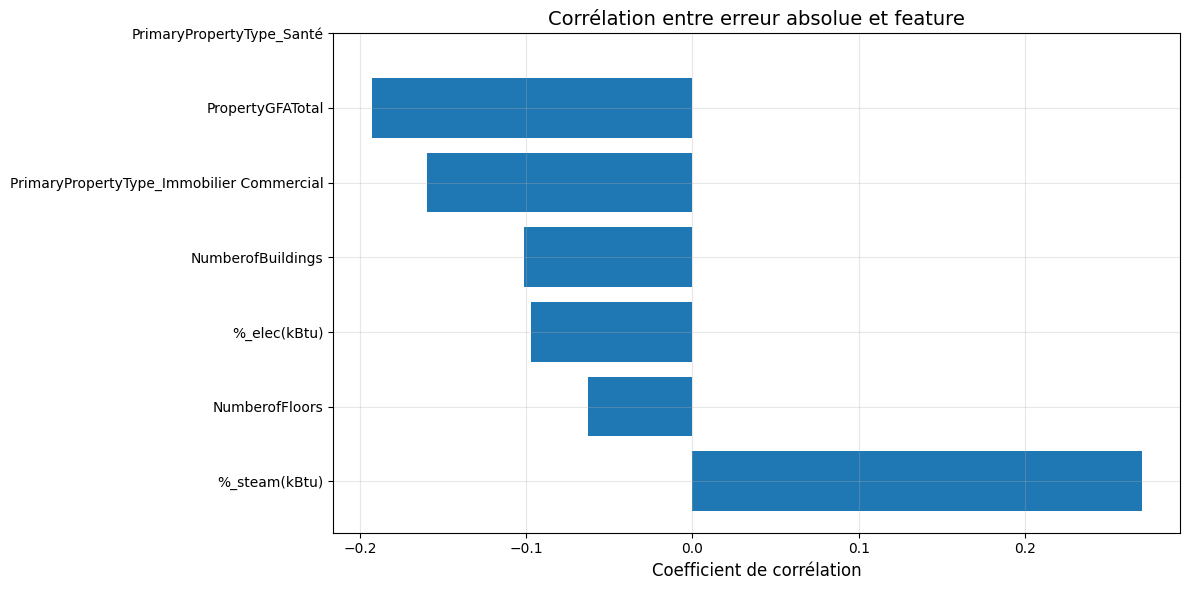

In [148]:
feature_error_correlation(X, abs_errors)


## HEATMAP DES CORRELATIONS ENTRE FEATURES

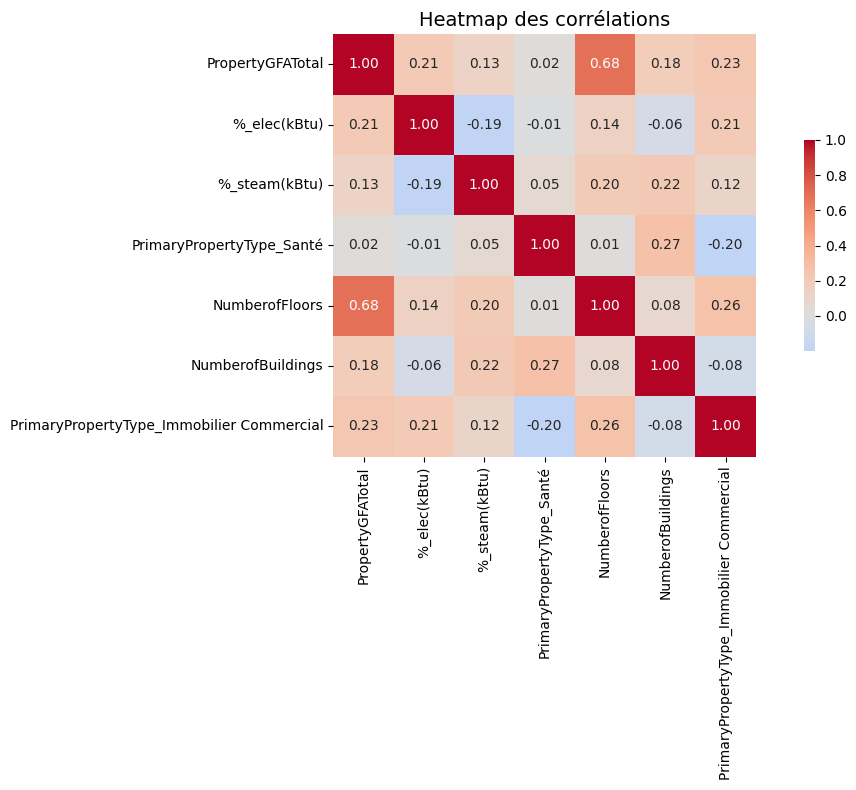

In [149]:
feature_correlation_heatmap(X)


## STATISTIQUES DES ERREURS

In [150]:

print_error_statistics(y_true, y_pred)


Error Statistics:
--------------------------------------------------
Mean Absolute Error: 75.32
Median Absolute Error: 19.54
Standard Deviation of Error: 295.76
Mean Percentage Error: -27.94%
Median Percentage Error: -0.92%

Percentiles of Absolute Error:
5éme percentile: 1.09
10éme percentile: 1.69
15éme percentile: 2.65
25éme percentile: 6.03
50éme percentile: 19.54
75éme percentile: 53.29
90éme percentile: 149.91
95éme percentile: 234.13
99éme percentile: 1135.76


## HEATMAP DES CORRELATIONS ENTRE FEATURES ET ERREUR

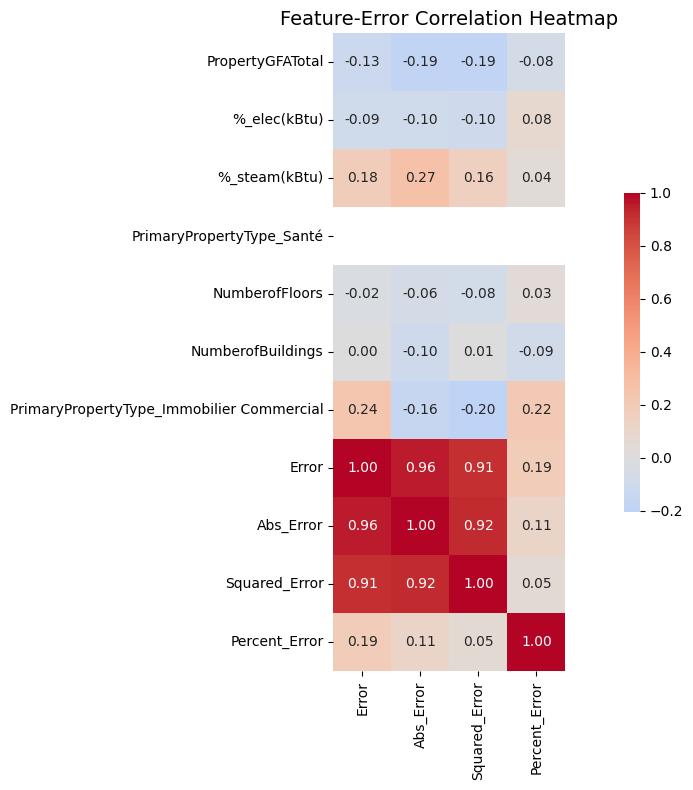


Top correlations with absolute error:
%_steam(kBtu)                                0.270073
NumberofFloors                              -0.062705
%_elec(kBtu)                                -0.096977
NumberofBuildings                           -0.101107
PrimaryPropertyType_Immobilier Commercial   -0.159795
PropertyGFATotal                            -0.192740
PrimaryPropertyType_Santé                         NaN
Name: Abs_Error, dtype: float64


In [151]:
# Calcul des erreurs
errors = y_true - y_pred

# Création de la heatmap
error_feature_heatmap(X, errors, y_true)

# FEATURE IMPORTANCE LOCALE POUR LA MEILLEURE ET LA PIRE PREDICTION


=== Analysis of Best Predictions ===


100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


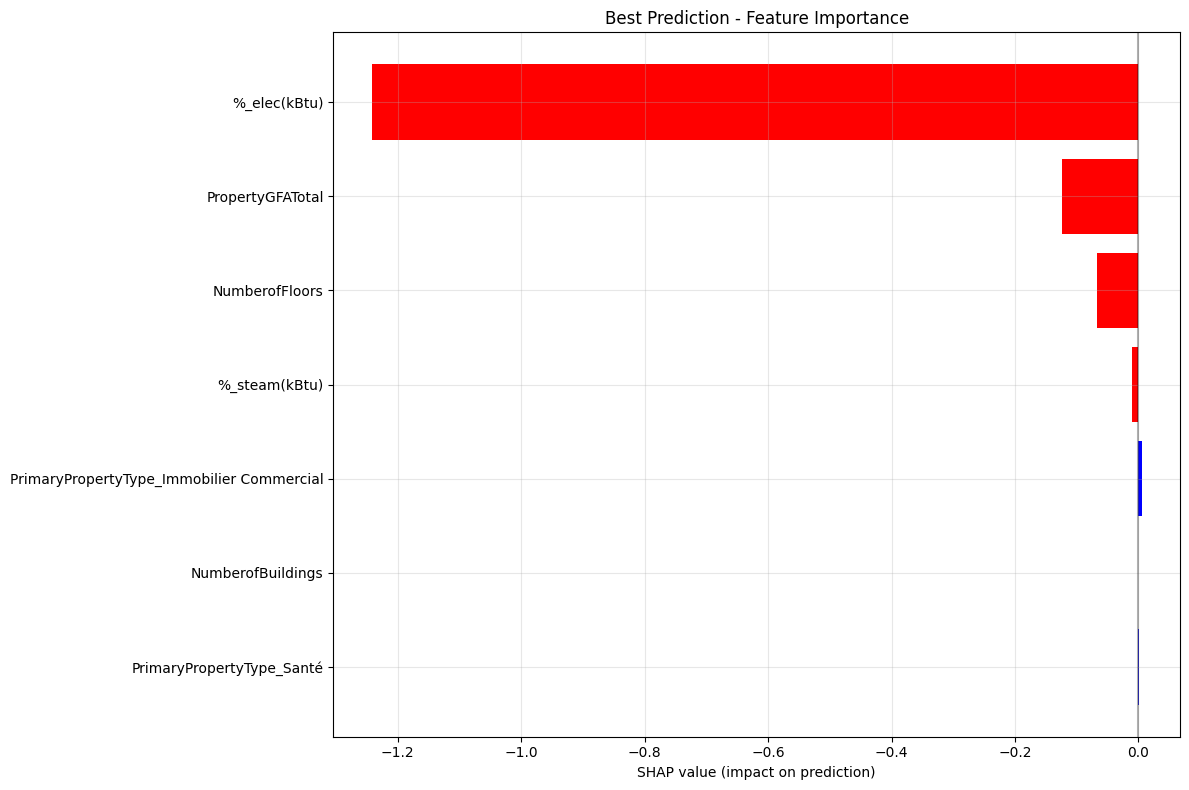


Best Prediction Case Details:
Actual value: 43.84
Predicted value: 43.88
Absolute error: 0.04

Feature values for this case:
PropertyGFATotal: 9.95
%_elec(kBtu): 15.00
%_steam(kBtu): 0.00
PrimaryPropertyType_Santé: 0.00
NumberofFloors: 2.00
NumberofBuildings: 1.00
PrimaryPropertyType_Immobilier Commercial: 0.00

Feature contributions (SHAP values):
%_elec(kBtu): -1.2418
PropertyGFATotal: -0.1232
NumberofFloors: -0.0671
%_steam(kBtu): -0.0101
PrimaryPropertyType_Immobilier Commercial: 0.0050
NumberofBuildings: -0.0007
PrimaryPropertyType_Santé: 0.0006

=== Analysis of Worst Predictions ===


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


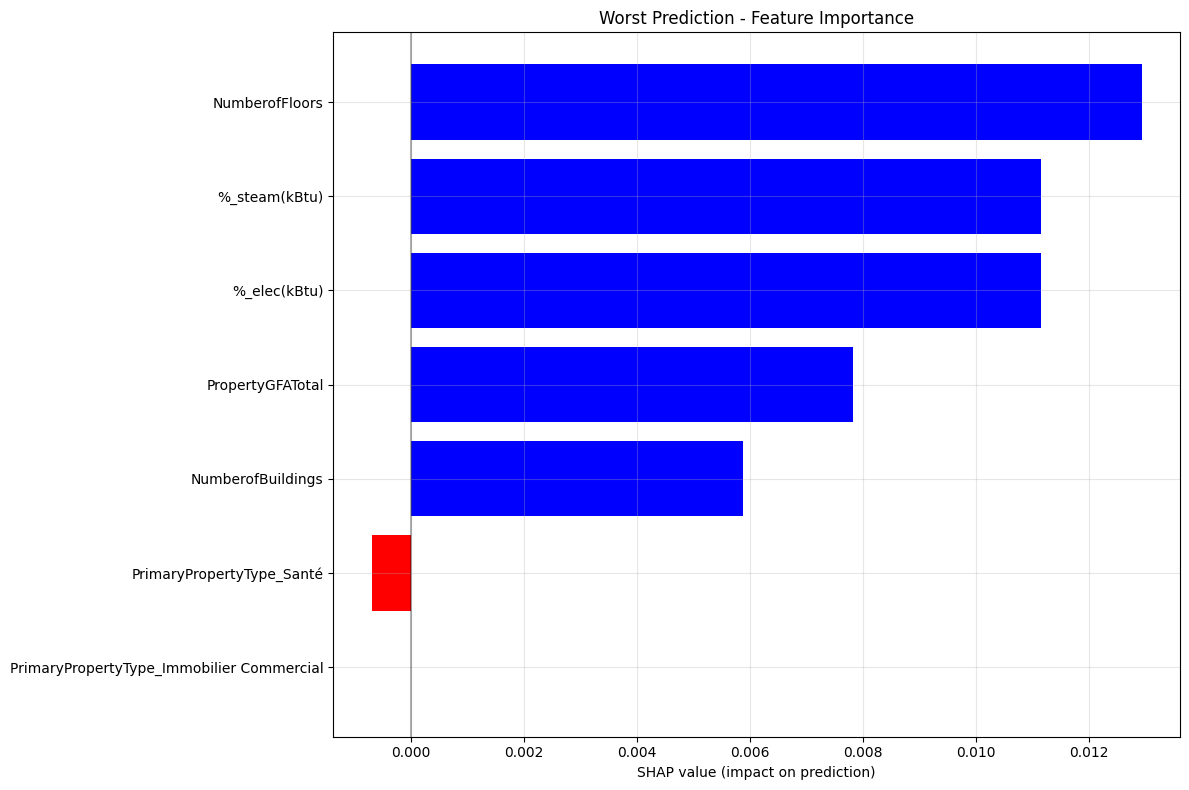


Worst Prediction Case Details:
Actual value: 12307.16
Predicted value: 8042.12
Absolute error: 4265.04

Feature values for this case:
PropertyGFATotal: 14.38
%_elec(kBtu): 48.00
%_steam(kBtu): 46.00
PrimaryPropertyType_Santé: 1.00
NumberofFloors: 14.00
NumberofBuildings: 7.00
PrimaryPropertyType_Immobilier Commercial: 0.00

Feature contributions (SHAP values):
NumberofFloors: 0.0129
%_steam(kBtu): 0.0112
%_elec(kBtu): 0.0112
PropertyGFATotal: 0.0078
NumberofBuildings: 0.0059
PrimaryPropertyType_Santé: -0.0007
PrimaryPropertyType_Immobilier Commercial: -0.0000


In [152]:
local_feature_importance(svr_log, X, y_true, y_pred)

# ETUDE DES PERFORMANCES AVEC ET SANS ENERGY STAR SCORE


In [153]:
col_num_sel_svr_energy=col_num_sel_svr+['ENERGYSTARScore']


In [154]:
DF_cleaned_Energy=DF_cleaned.loc[~DF_cleaned['ENERGYSTARScore'].isna()]
DF_cleaned_Energy.shape

(978, 36)

## SVR 

In [155]:
svr_log_age,_,_,_,_,sclX_age,sclY_age,_,_,_=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_svr,True)

Score R² train : 0.97
Score R² test : 0.64
Score MAE train : 4.49e+01
Score MAE test : 8.83e+01
Score MAPE train : 49.76 %
Score MAPE test : 49.01 %
Score MSE train : 1.37e+04
Score MSE test : 2.14e+05


In [156]:
svr_log_energy,_,_,_,_,sclX_energy,sclY_energy,_,_,_=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr_energy,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_svr,True)

Score R² train : 0.98
Score R² test : 0.63
Score MAE train : 3.57e+01
Score MAE test : 8.33e+01
Score MAPE train : 35.15 %
Score MAPE test : 33.55 %
Score MSE train : 1.06e+04
Score MSE test : 2.23e+05


ON OBTIENT D'EXCELLENT RESULTATS NOTAMMENT SUR LA MAPE

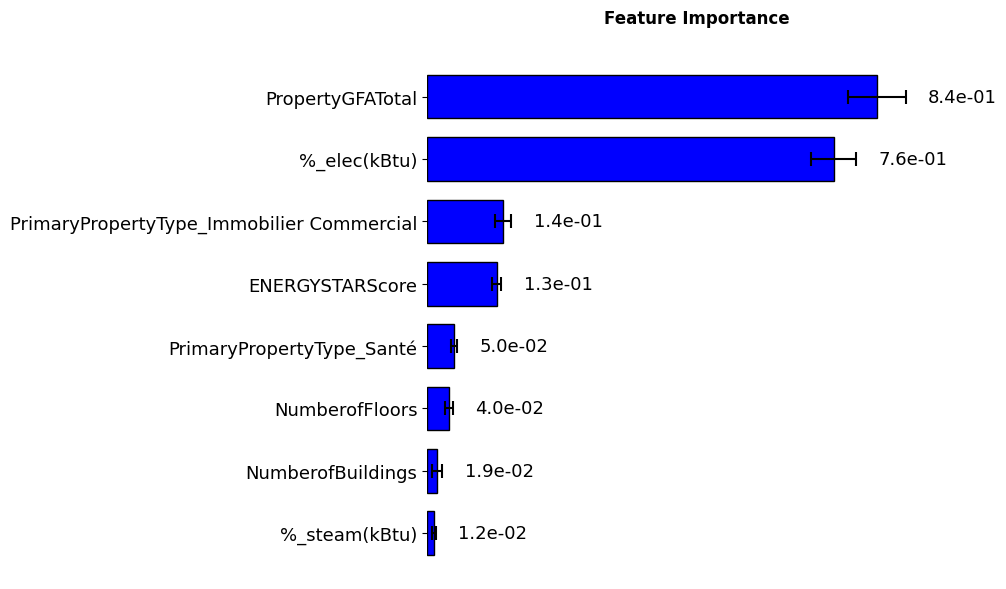


Résultats numériques détaillés :

PropertyGFATotal: 0.8398 (±0.0538)
%_elec(kBtu): 0.7592 (±0.0423)
PrimaryPropertyType_Immobilier Commercial: 0.1419 (±0.0151)
ENERGYSTARScore: 0.1296 (±0.0090)
PrimaryPropertyType_Santé: 0.0498 (±0.0054)
NumberofFloors: 0.0404 (±0.0069)
NumberofBuildings: 0.0191 (±0.0093)
%_steam(kBtu): 0.0119 (±0.0036)


In [157]:
COL=feature_importance_permutation(DF_cleaned_Energy,col_num_sel_svr_energy,TARGET,svr_log_energy,
                               8,10,0.3,36,sclX_energy,sclY_energy,'log')

ICI ENRGYSTARScore SE HISSE A LA QUATRIEME PLACE

ON VA VOIR SI L'ON PEUT REDUIRE LE NOMBRE DE FEATURE NECESSAIRES SI L'ON UTILISE ENERGYSTARScore

In [158]:
col_num_sel_svr_energy_2=COL[:4]

In [159]:
svr_log_age,_,_,_,_,sclX_age,sclY_age,_,_,_=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr_energy_2,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,best_params_svr,True)

Score R² train : 0.76
Score R² test : 0.63
Score MAE train : 6.72e+01
Score MAE test : 8.23e+01
Score MAPE train : 41.78 %
Score MAPE test : 37.27 %
Score MSE train : 1.07e+05
Score MSE test : 2.21e+05


# CONCLUSION

JE RECOMMANDE D'UTILISER LE MODELE SVR CAR IL OBTIENT UN R2 AUSSI BON QUE LE NEURAL NETWORK MAIS AVEC UN MAPE BIEN MEILLEUR.

JE CONSEILLE LES HYPERPARAMETRES SUIVANTS :

- kernel : rbf

- C : 25

- epsilon : 0.01

- gamma : 0.01

JE RECOMMANDE D'UTILISER LA FEATURE ENERGYSTARScore POUR DES RESULTATS OPTIMAUX CONCERNANT LA METRIQUE MAPE, ET UNE QUANTITE DE FEATURES NECESSAIRES REDUITE

VOICI LES FEATURES QU'IL FAUDRAIT RECUPERER :

- PropertyGFATotal

- %_elec(kBtu)

- PrimaryPropertyType_Immobilier Commercial

- ENERGYSTARScore

CEPENDANT SI LA METRIQUE RETENUES ET LE R2, ALORS JE CONSEILLE UN MODELE AVEC LES MEMES HYPER PARAMETRES MAIS AVEC LES 7 FEATURES SUIVANTES :

- PropertyGFATotal

- %_elec(kBtu)

- %_steam(kBtu)

- PrimaryPropertyType_Santé

- NumberofFloors

- NumberofBuildings

- PrimaryPropertyType_Immobilier Commercial

DE PLUS, IL SERA NECESSAIRE D'APPLIQUER LA TRANSFORMATION DE LA TARGET AINSI QUE LA TRANSFORMATION DE LA FEATURE PropertyGFATotal AVEC LA FONCTION LOG AINSI QU'UNE STANDARDISATION DES FEATURES ET DE LA TARGET